In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm 
import pandas as pd

%matplotlib inline

from pymc.Matplot import plot
import numpy as np
import daft
from IPython.core.pylabtools import figsize
figsize(12.5, 10)

import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np

Couldn't import dot_parser, loading of dot files will not be possible.


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
import pydot

In [3]:
with pm.Model() as model:


#    diff_of_means = pm.Deterministic('difference of means', group1_mean - group2_mean)
 #   diff_of_stds = pm.Deterministic('difference of stds', group1_std - group2_std)
#effect_size = pm.Deterministic('effect size', diff_of_means / pm.sqrt((group1_std**2 + group2_std**2) / 2))


    alpha = pm.Normal("alpha", 0, 0.1)

    beta = pm.Normal("beta", 0, 0.1) # less uncertainty than before
#thickness_layer2 = pm.Normal("thickness_layer2", 100, 0.01)


    
    
        
    #gamma = pm.Deterministic("gamma", beta-thickness_layer2)


    step = pm.Metropolis() # instantiate sampler
    trace = pm.sample(2000, step, njobs=1) # draw 500 posterior samplers
#    step = pm.NUTS()
#    trace = pm.sample(50, step)

 [-----------------100%-----------------] 2000 of 2000 complete in 2.2 sec

In [16]:
trace

<MultiTrace: 1 chains, 200 iterations, 2 variables>

## Hamiltonian

In [4]:
with pm.Model() as model:


#    diff_of_means = pm.Deterministic('difference of means', group1_mean - group2_mean)
 #   diff_of_stds = pm.Deterministic('difference of stds', group1_std - group2_std)
#effect_size = pm.Deterministic('effect size', diff_of_means / pm.sqrt((group1_std**2 + group2_std**2) / 2))


    alpha = pm.Normal("alpha", 0, 0.1)

    beta = pm.Normal("beta", 0, 0.1) # less uncertainty than before
#thickness_layer2 = pm.Normal("thickness_layer2", 100, 0.01)


    
    
        
    #gamma = pm.Deterministic("gamma", beta-thickness_layer2)


    step = pm.HamiltonianMC() # instantiate sampler
    trace = pm.sample(20000, step, njobs=1) # draw 500 posterior samplers
#    step = pm.NUTS()
#    trace = pm.sample(50, step)

1 #define _CUDA_NDARRAY_C
2 
3 #include <Python.h>
4 #include <structmember.h>
5 
6 #include <numpy/arrayobject.h>
7 #include <iostream>
8 
9 #include "cuda_ndarray.cuh"
10 
11 //If true, when there is a gpu malloc or free error, we print the size of allocated memory on the device.
12 #define COMPUTE_GPU_MEM_USED 0
13 
14 //If true, we fill with NAN allocated device memory.
15 #define ALLOC_MEMSET 0
16 
17 //If true, we print out when we free a device pointer, uninitialize a
18 //CudaNdarray, or allocate a device pointer
19 #define PRINT_FREE_MALLOC 0
20 
21 //If true, we do error checking at the start of functions, to make sure there
22 //is not a pre-existing error when the function is called.
23 //You probably need to set the environment variable
24 //CUDA_LAUNCH_BLOCKING=1, and/or modify the CNDA_THREAD_SYNC
25 //preprocessor macro in cuda_ndarray.cuh
26 //if you want this to work.
27 #define PRECHECK_ERROR 0
28 
29 //If true, we release the GIL around blocking GPU calls, to allow 


['nvcc', '-shared', '-O3', '-Xlinker', '/DEBUG', '-D HAVE_ROUND', '-m64', '-Xcompiler', '-DCUDA_NDARRAY_CUH=11b90075e2397c684f9dc0f7276eab8f,-D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION,/Zi,/MD', '-IC:\\Users\\Miguel\\Anaconda\\lib\\site-packages\\theano\\sandbox\\cuda', '-IC:\\Users\\Miguel\\Anaconda\\lib\\site-packages\\numpy\\core\\include', '-IC:\\Users\\Miguel\\Anaconda\\include', '-o', 'C:\\Users\\Miguel\\AppData\\Local\\Theano\\compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.9-64\\cuda_ndarray\\cuda_ndarray.pyd', 'mod.cu', '-LC:\\Users\\Miguel\\Anaconda\\libs', '-LC:\\Users\\Miguel\\Anaconda', '-lpython27', '-lcublas', '-lcudart']
 [-----------------100%-----------------] 20000 of 20000 complete in 20.9 sec

C:\Users\Miguel\Anaconda\lib\site-packages\theano\scan_module\scan_perform_ext.py:133: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


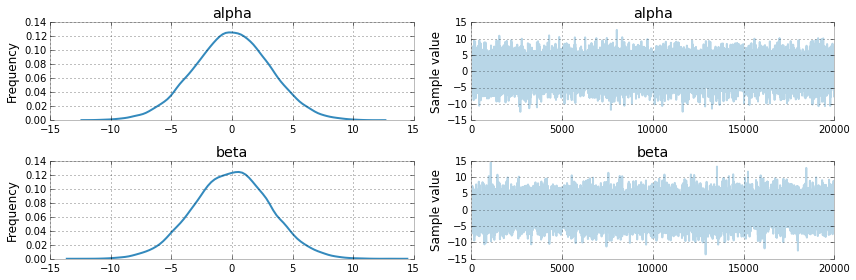

In [5]:
%matplotlib inline


pm.traceplot(trace);


###Points distribution

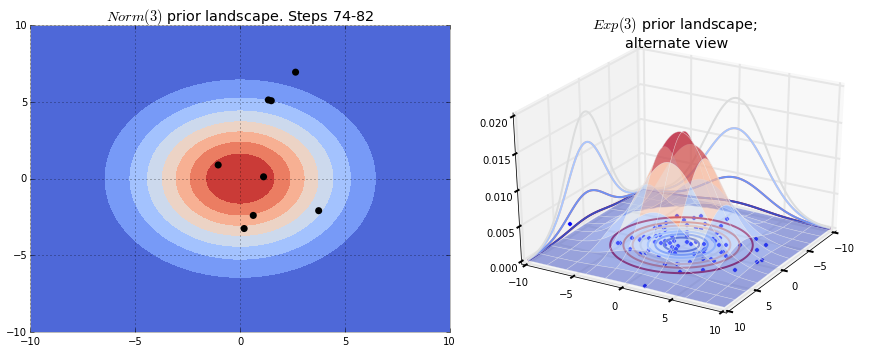

In [7]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)
ax = fig.add_subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)

#print exp_x[:, None]

exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])

ax.contourf(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
   

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("$Norm(3)$ prior landscape. Steps 74-82")

#plt.subplot(222)
#plt.plot(exp_x)
plt.tight_layout()

for i in range(74,82):
    plt.scatter(trace["alpha"][i], trace["beta"][i], c="k", s=50, edgecolor="none")

    
    
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, M,  cmap=cm.coolwarm, alpha=0.5)
ax2.view_init(azim=390)
ax2.set_xlim([-10, 10])
ax2.set_ylim([-10, 10])
ax2.set_zlim([0, 0.02])

for i in range(80):
    ax2.scatter(trace["alpha"][i], trace["beta"][i])
plt.title("$Exp(3)$ prior landscape; \nalternate view")


cset = ax2.contour(X, Y, M, zdir='z', offset=0, cmap=cm.coolwarm_r)
cset = ax2.contour(X, Y, M, zdir='x', offset=-10, cmap=cm.coolwarm_r)
cset = ax2.contour(X, Y, M, zdir='y', offset=-10, cmap=cm.coolwarm_r)

### Searching algorithm


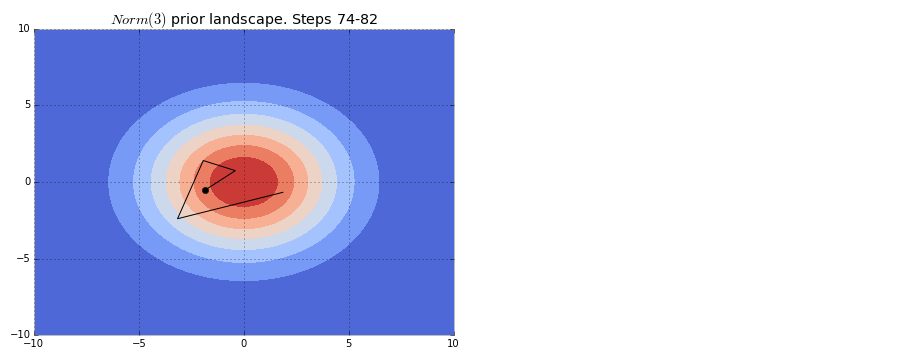
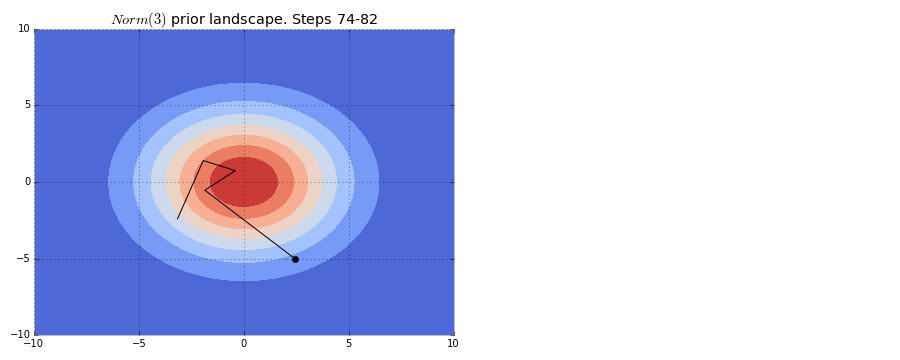
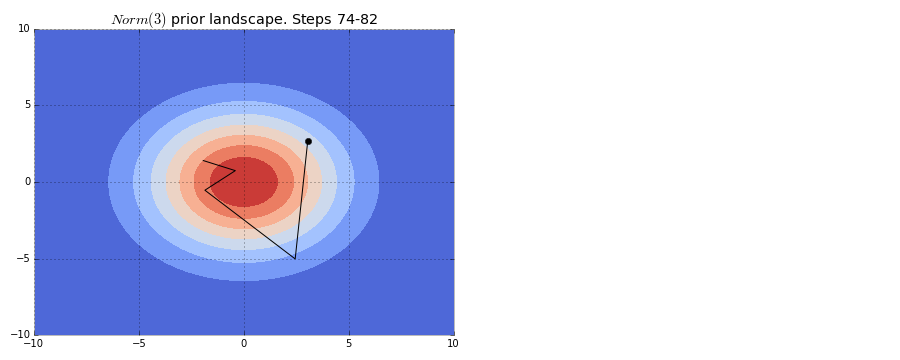
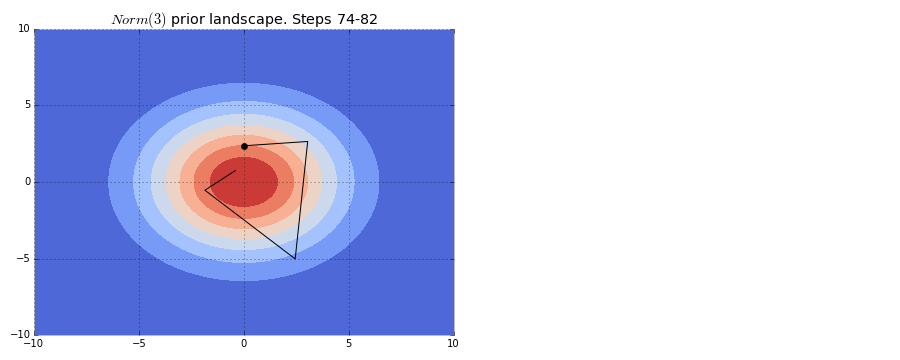
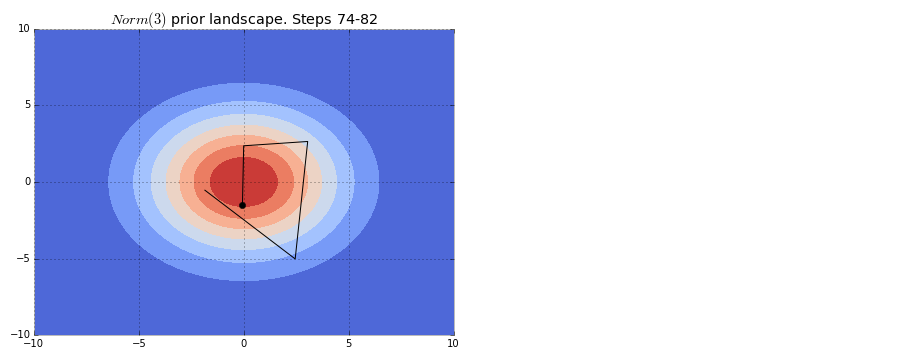
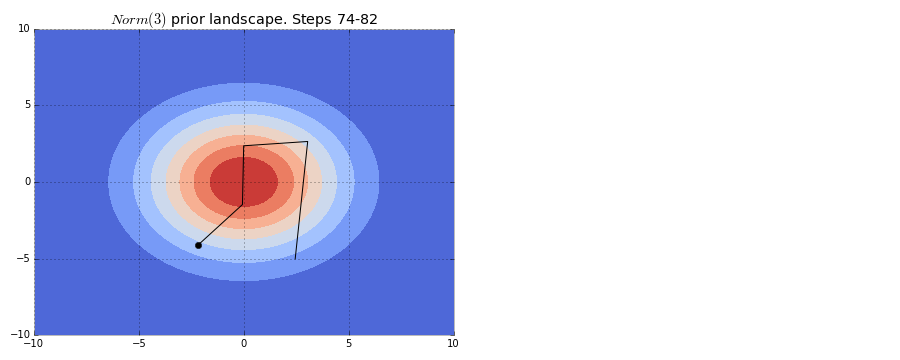
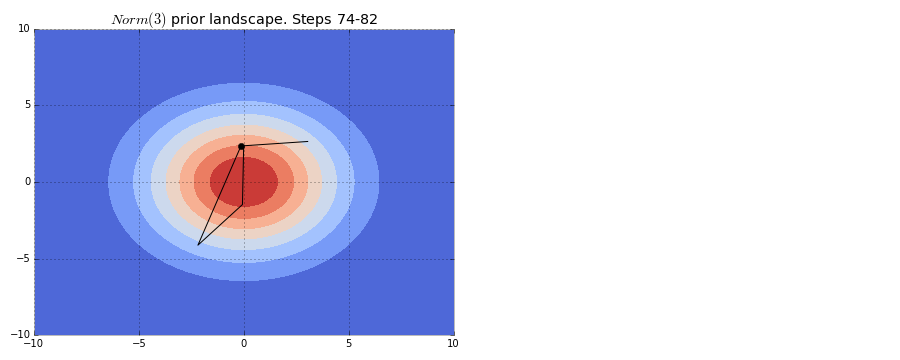
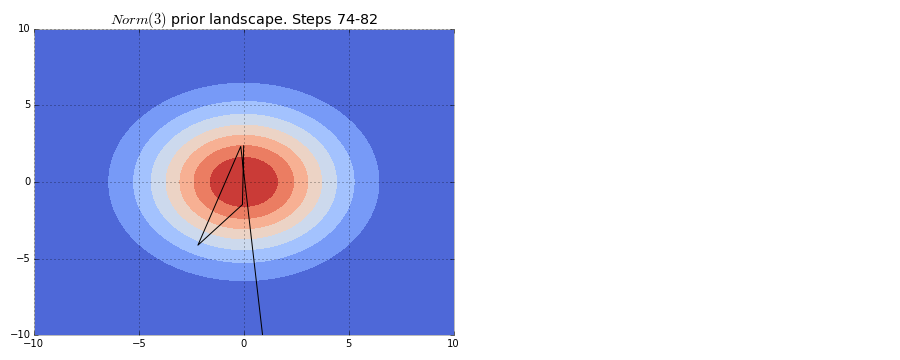
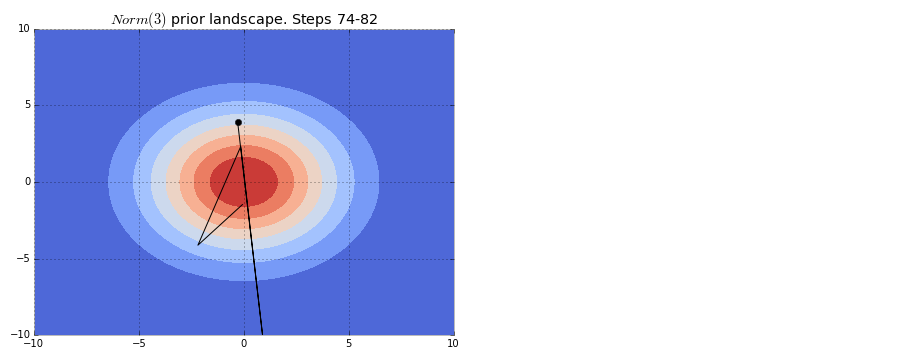
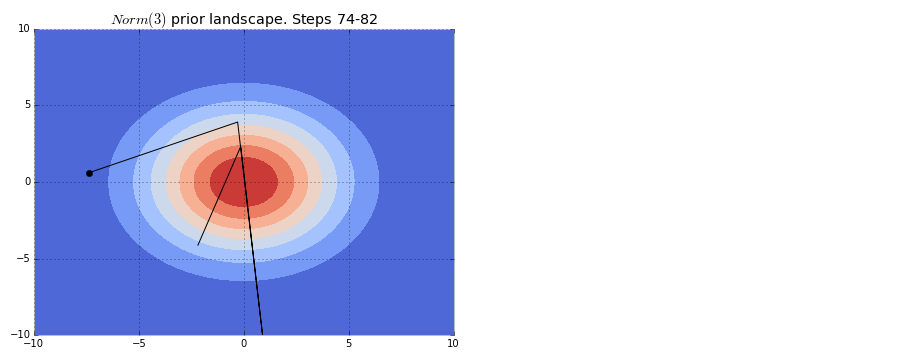
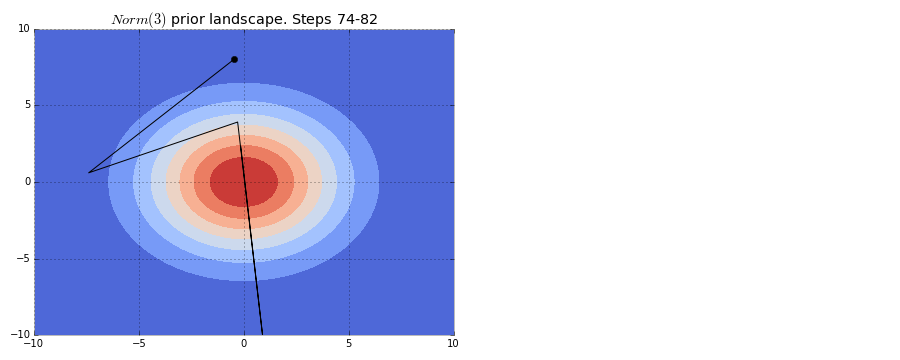
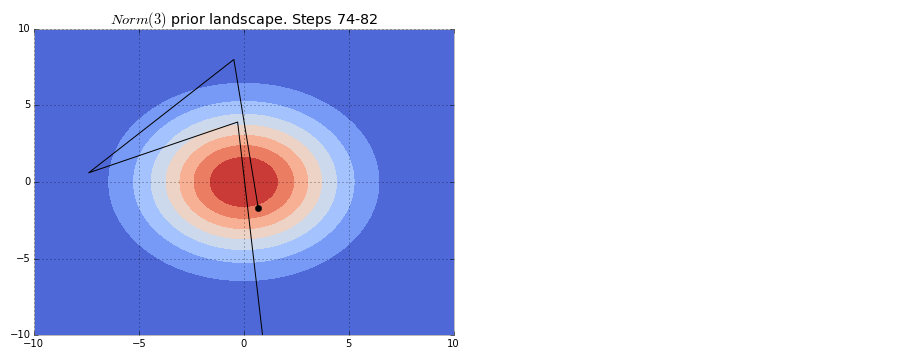
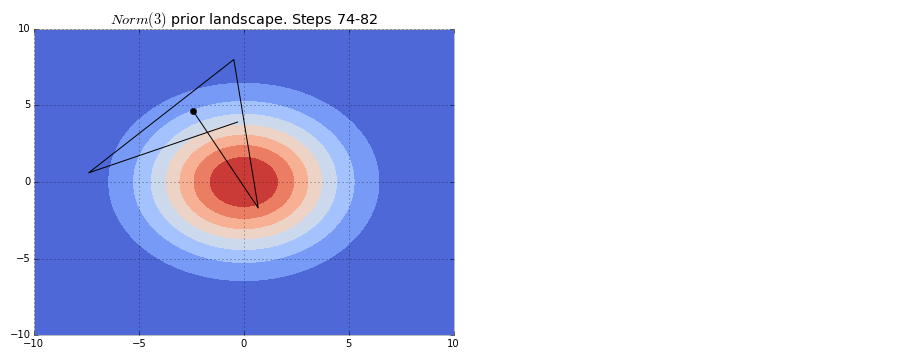
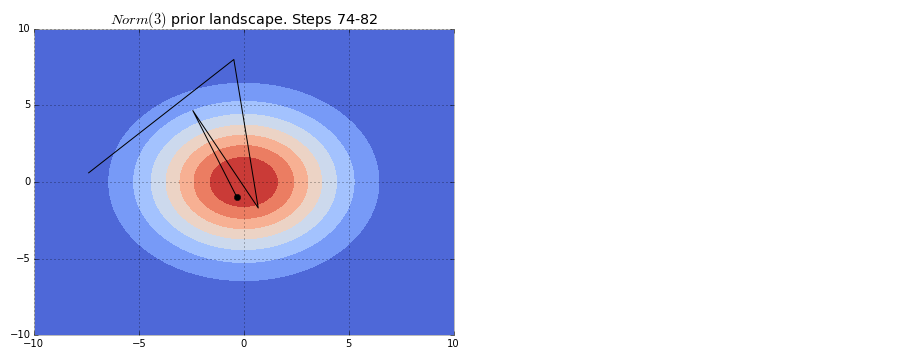
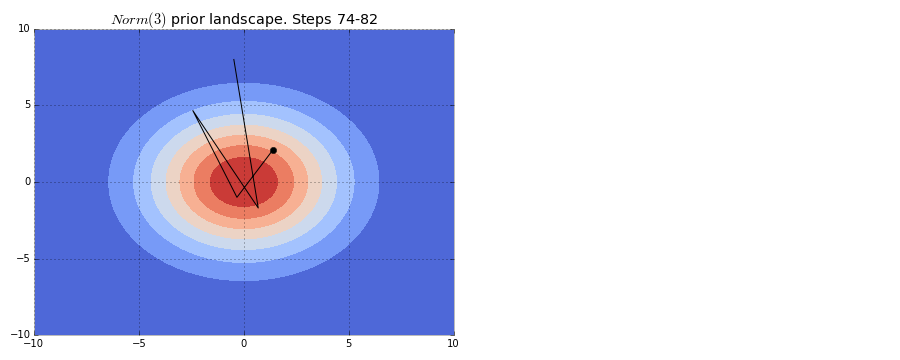
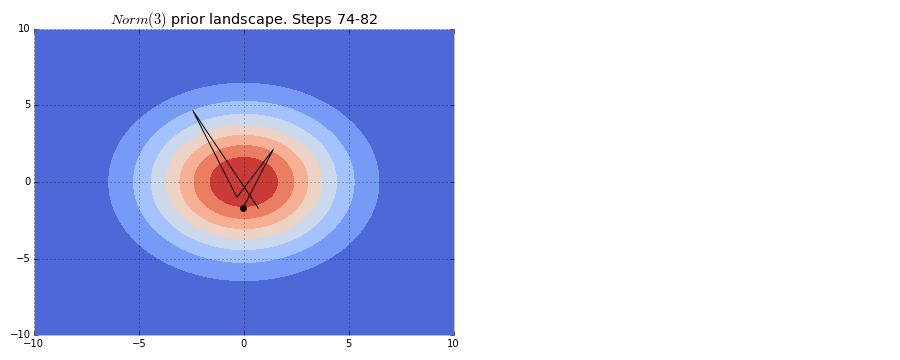
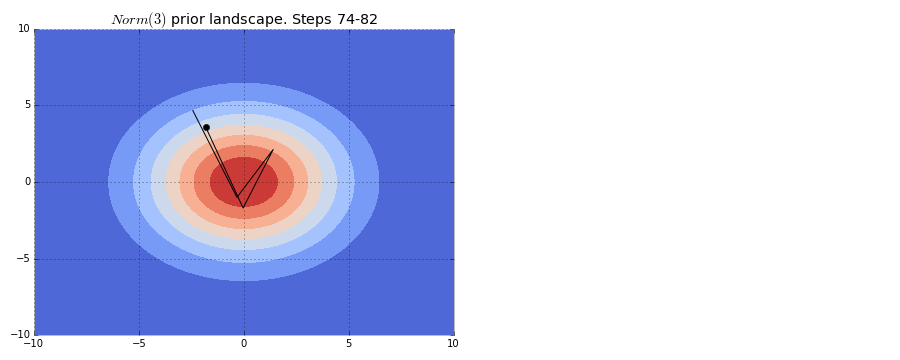
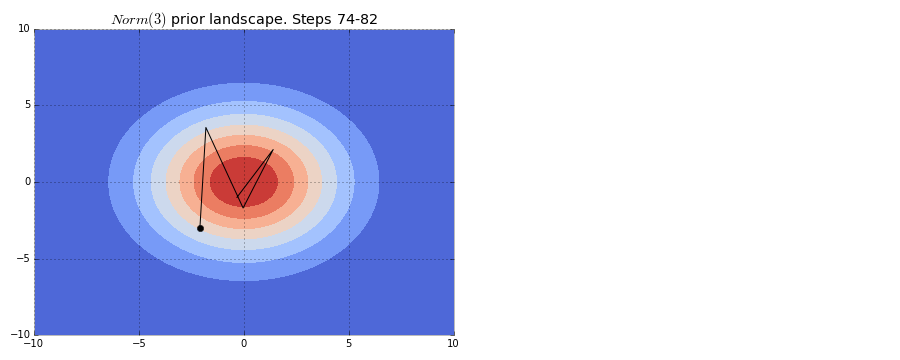
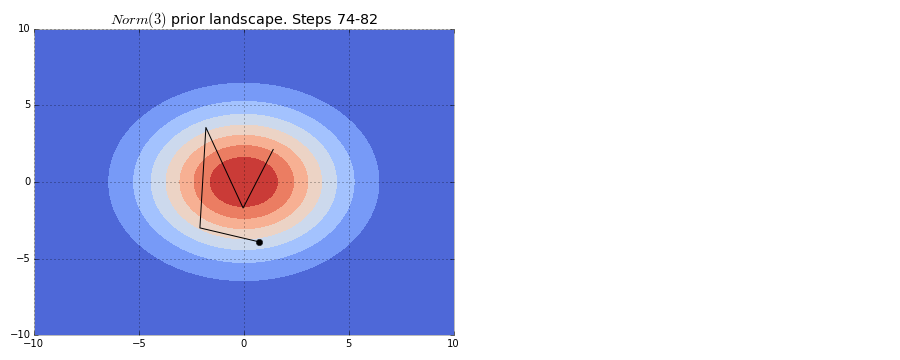
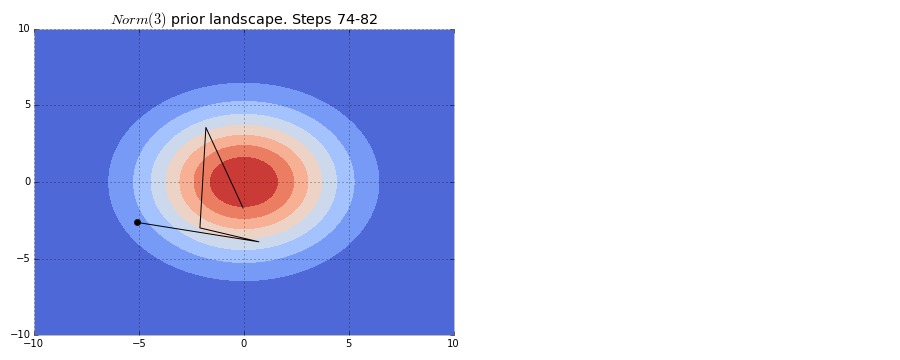
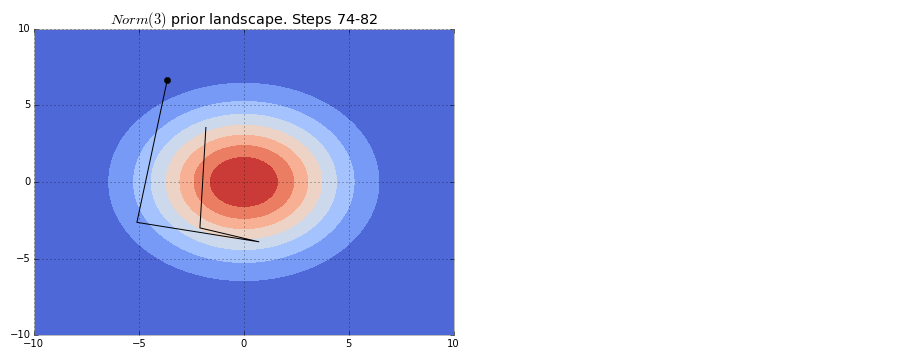
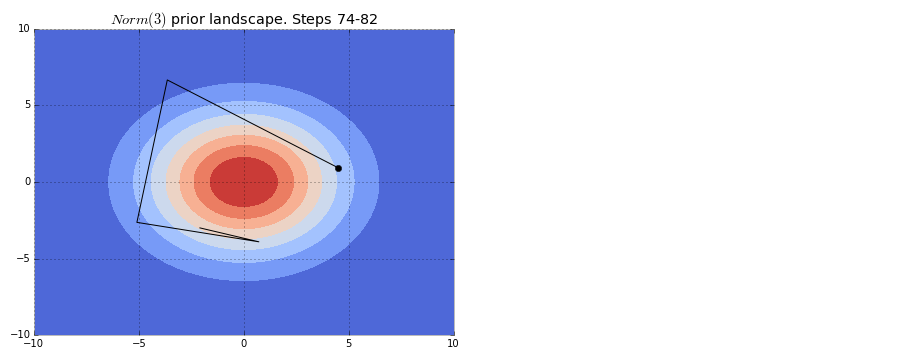
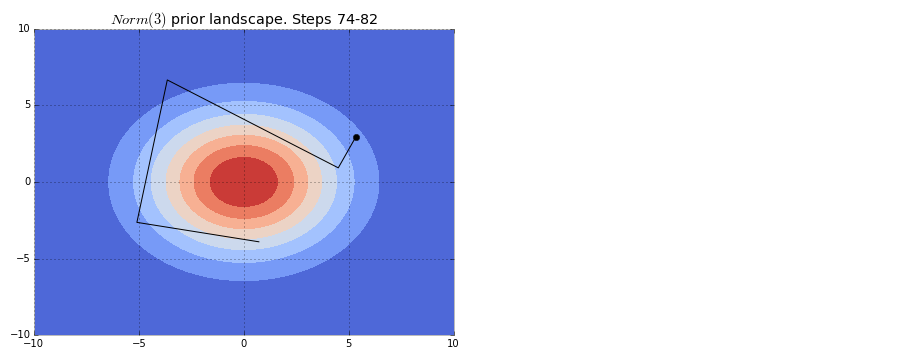
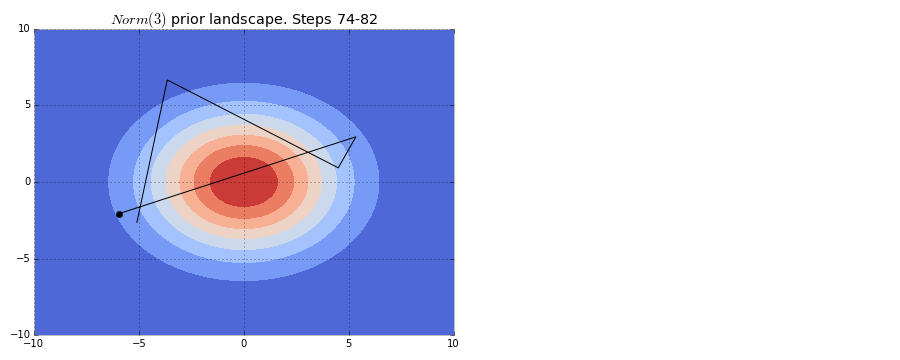
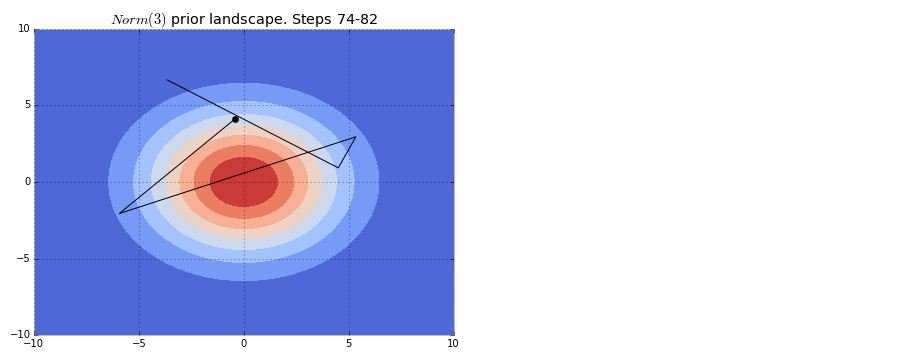
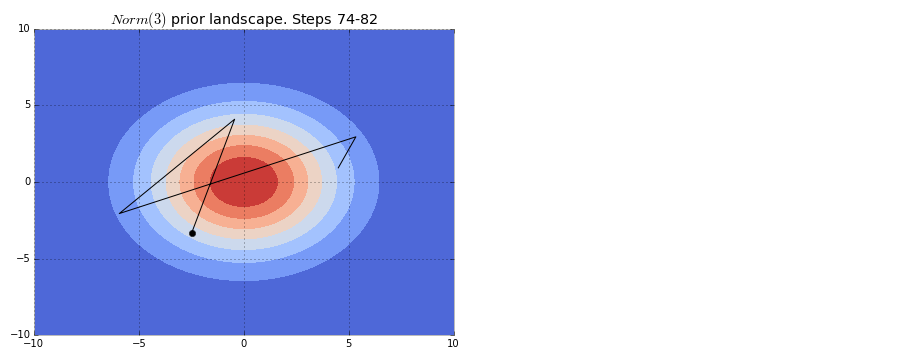
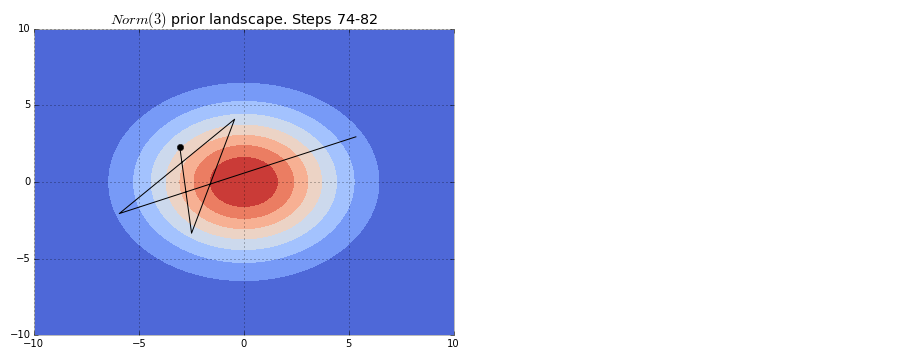
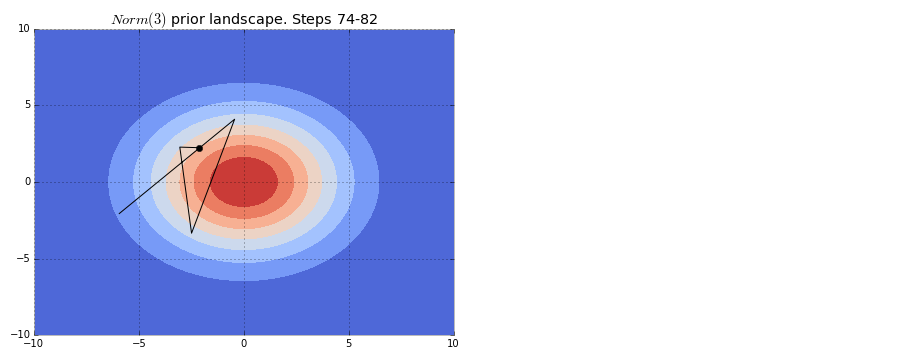
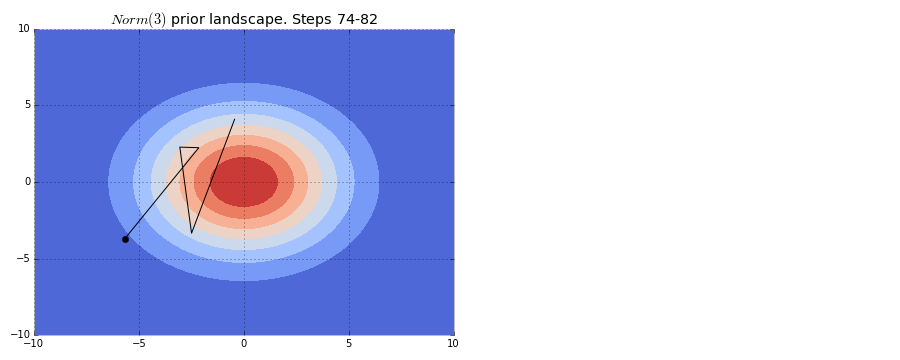
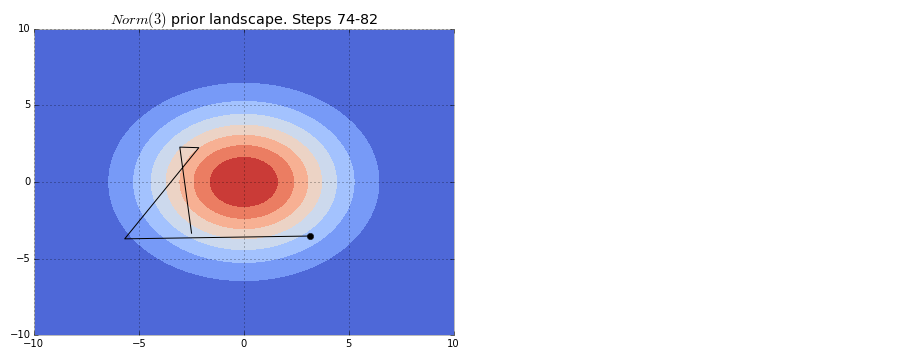
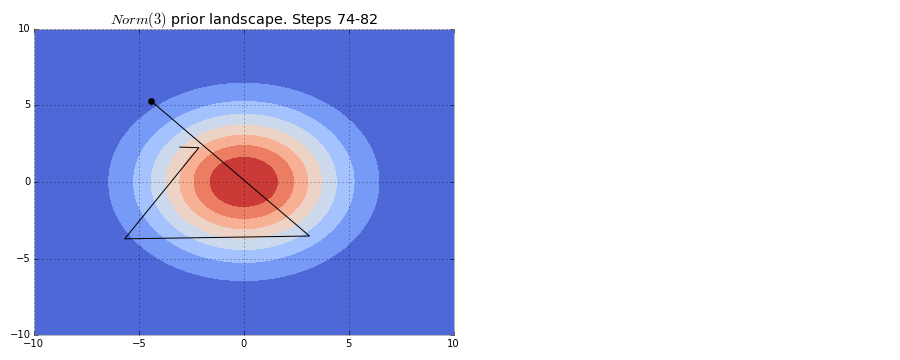
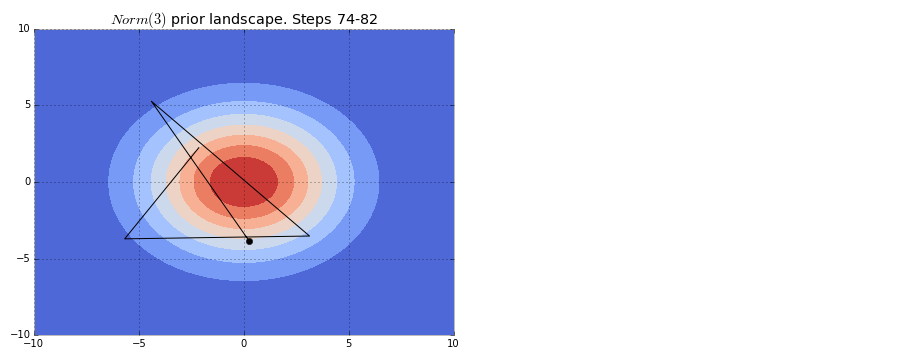
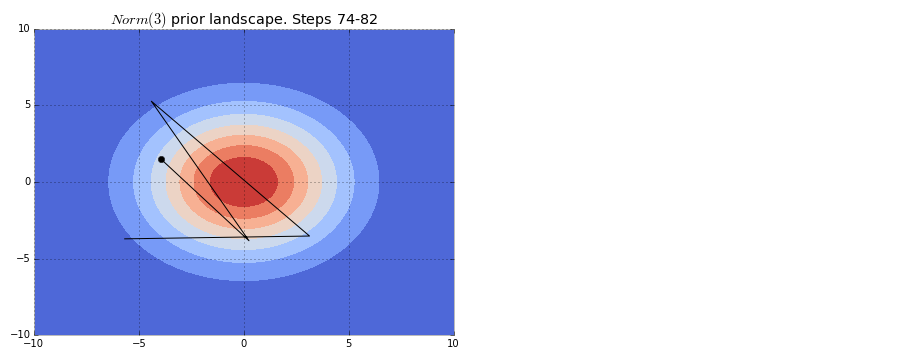
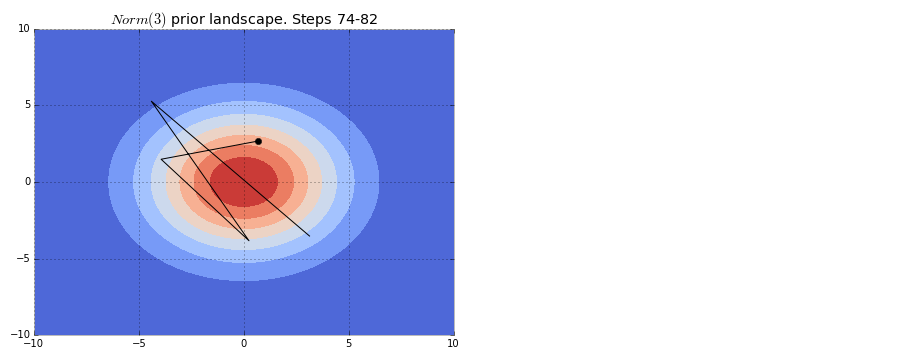
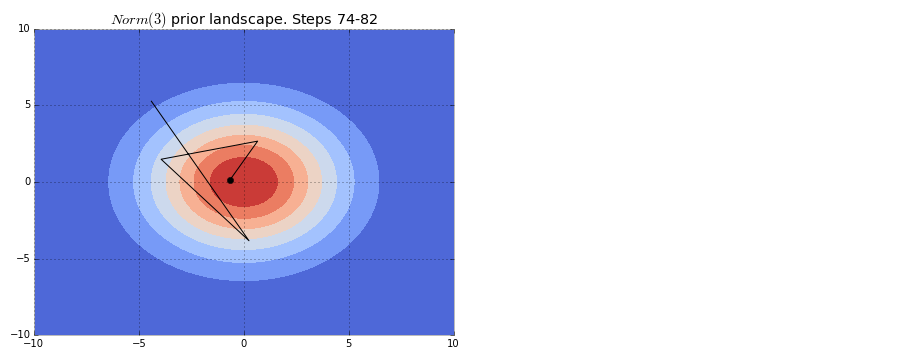
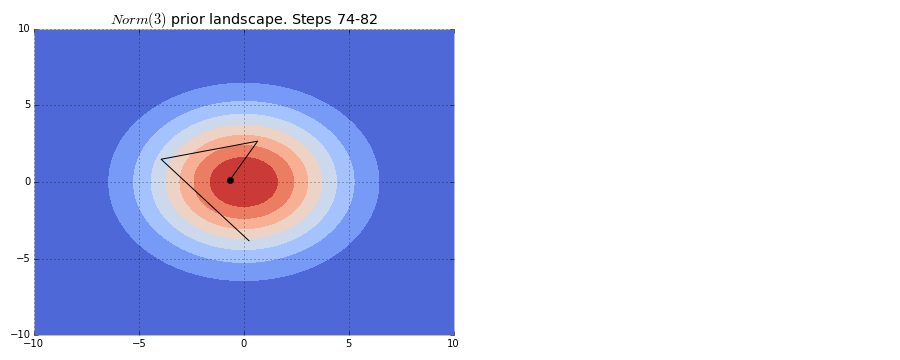
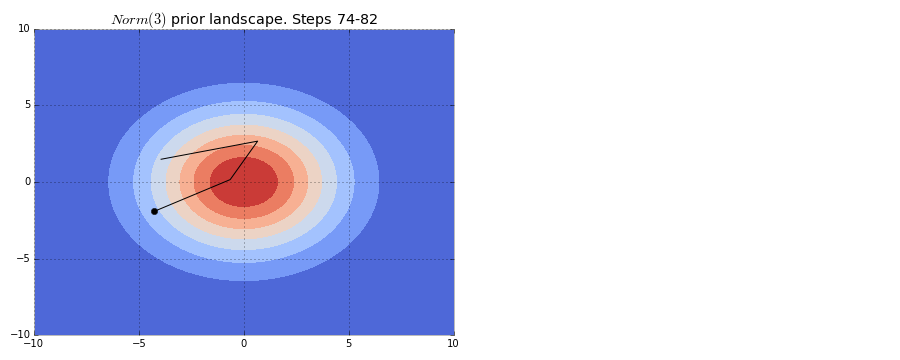
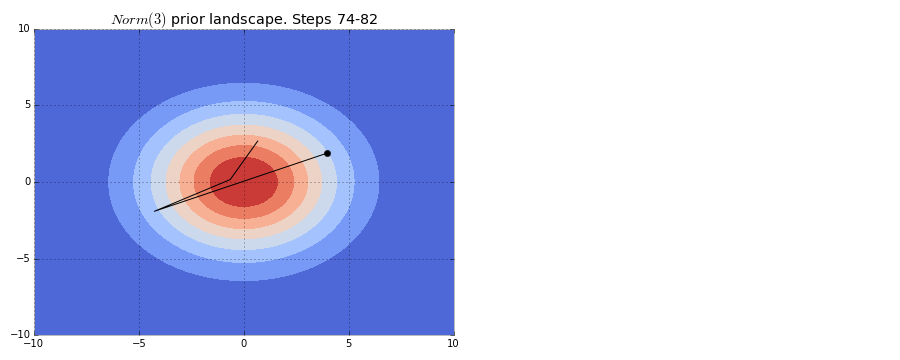
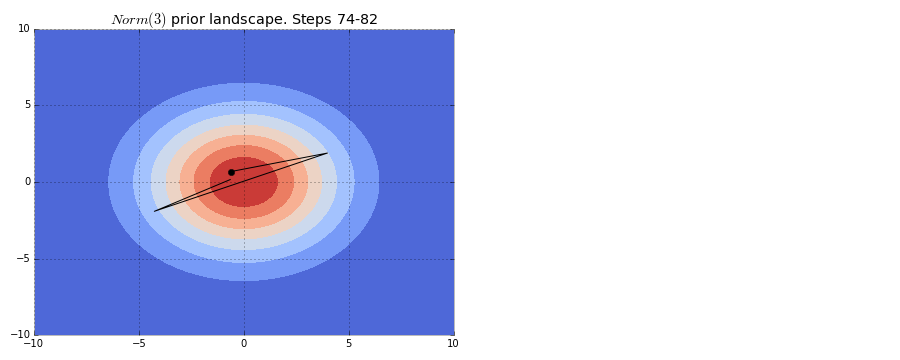
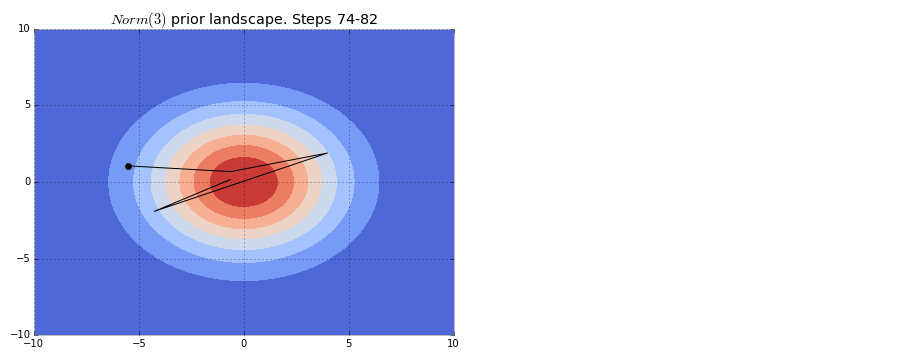
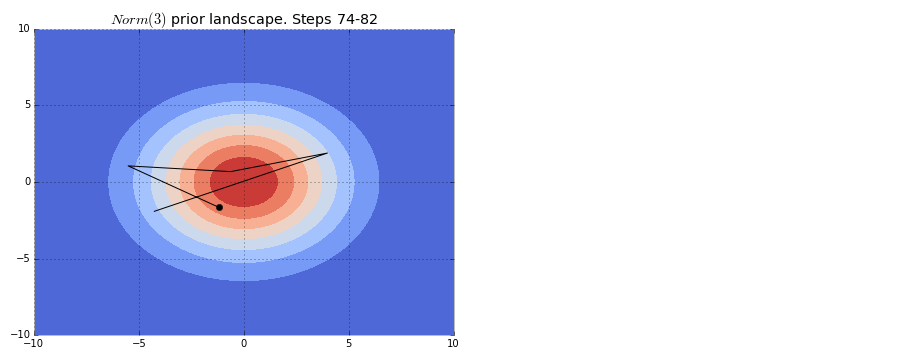
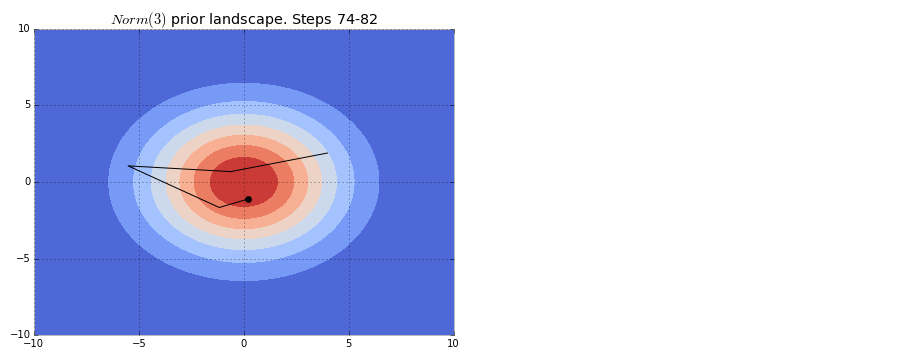
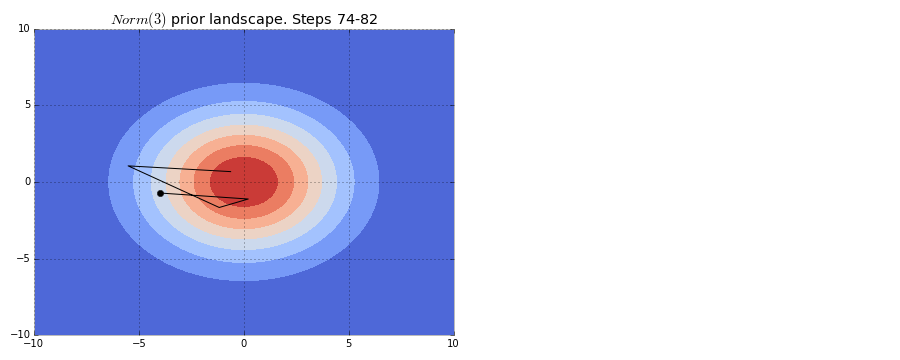
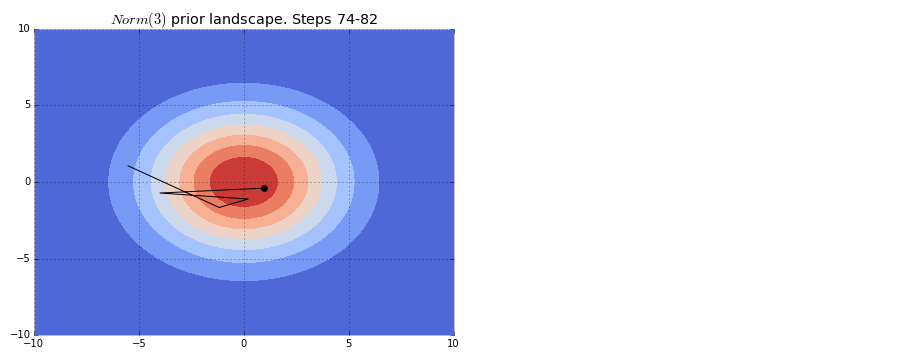
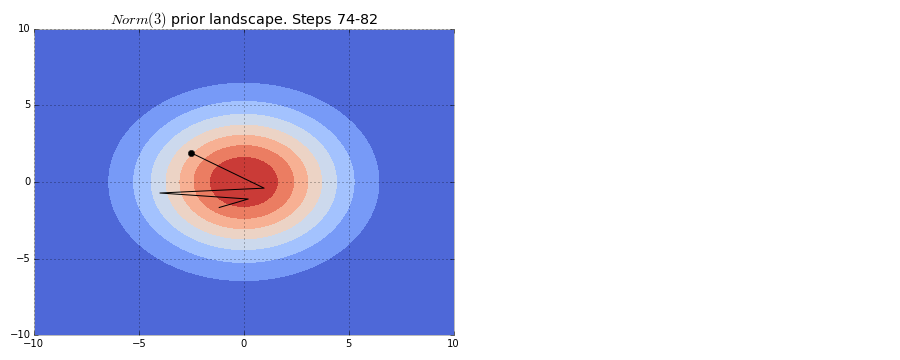
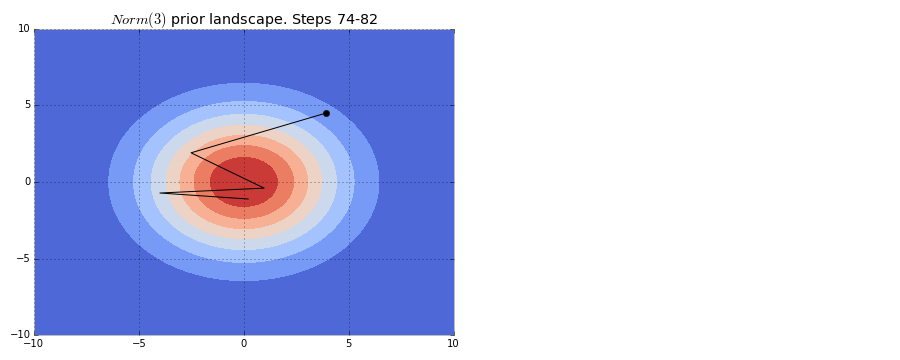
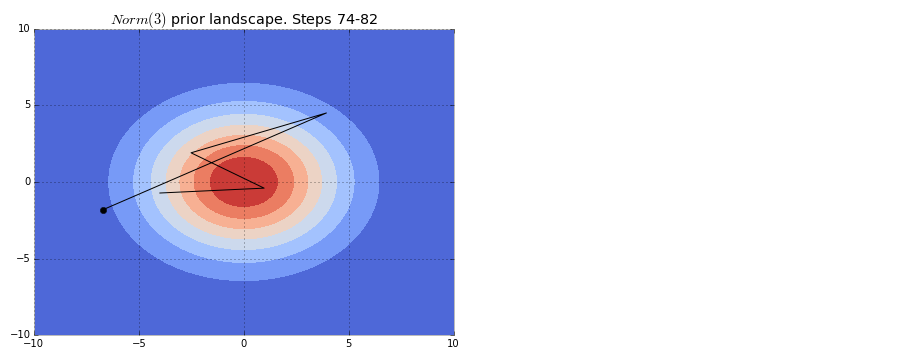
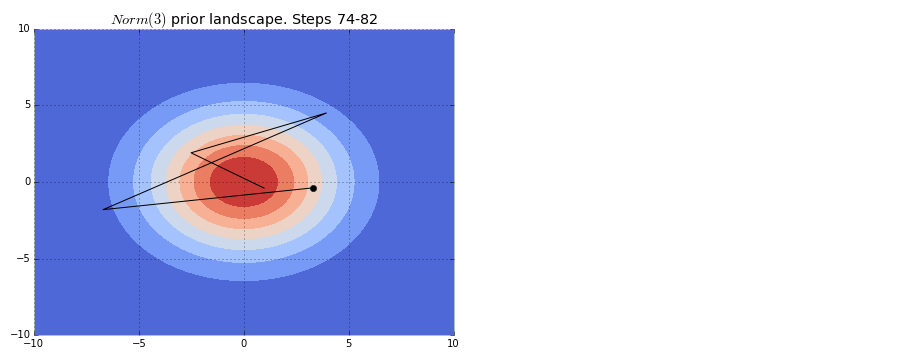
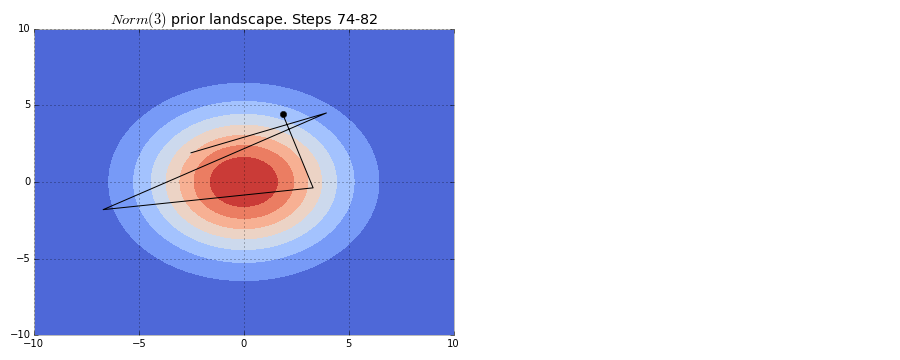
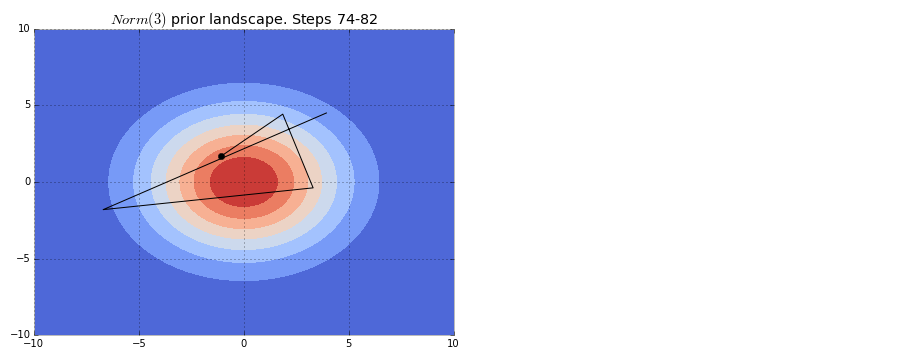
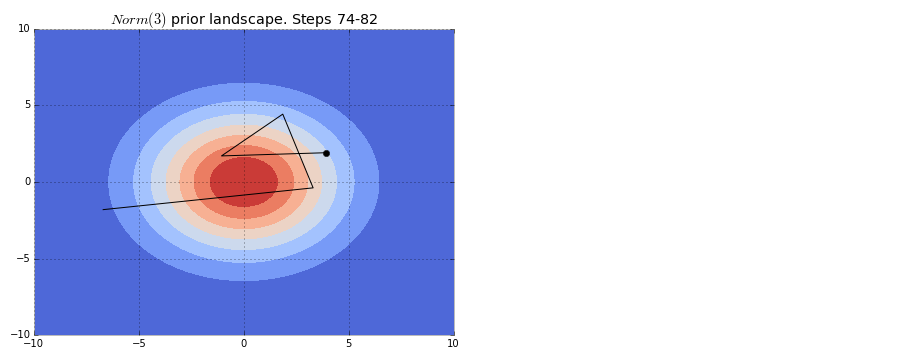
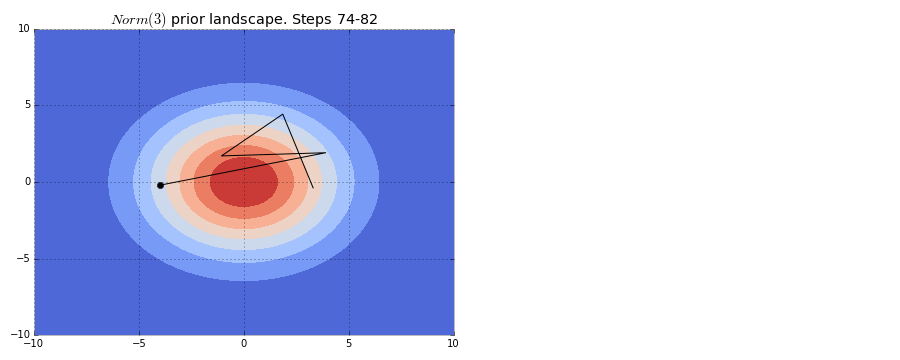
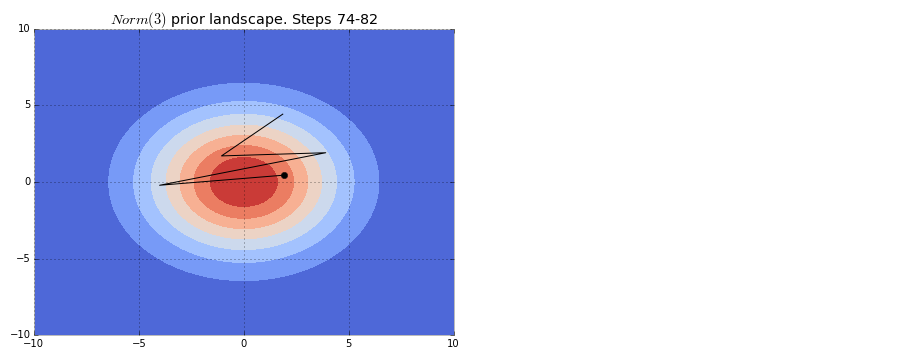
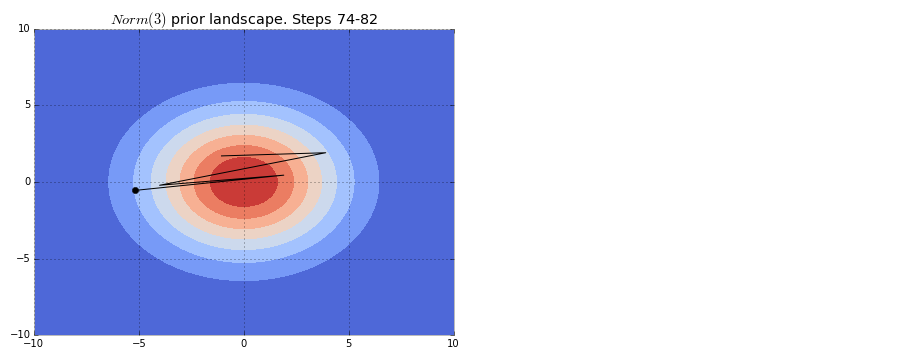
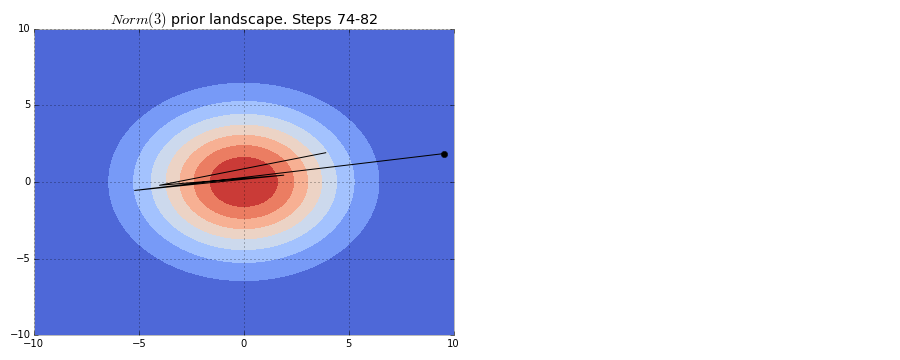
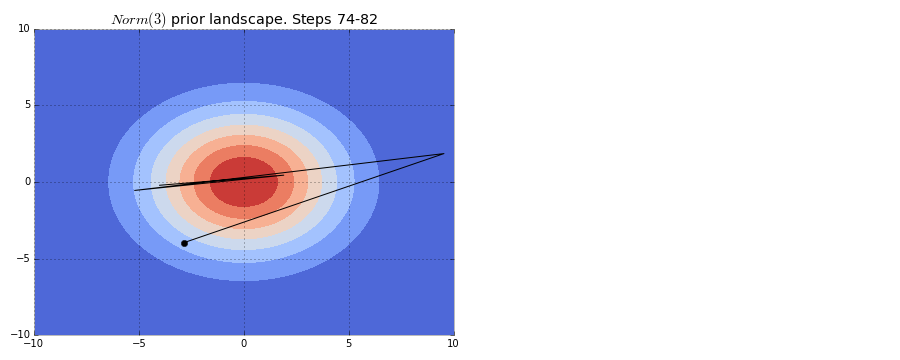
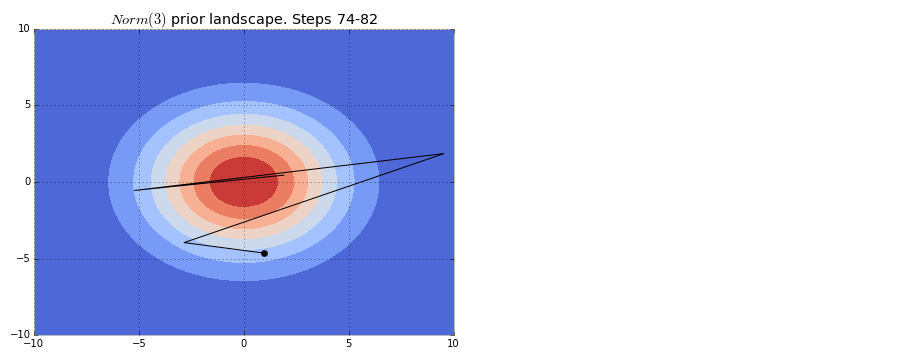
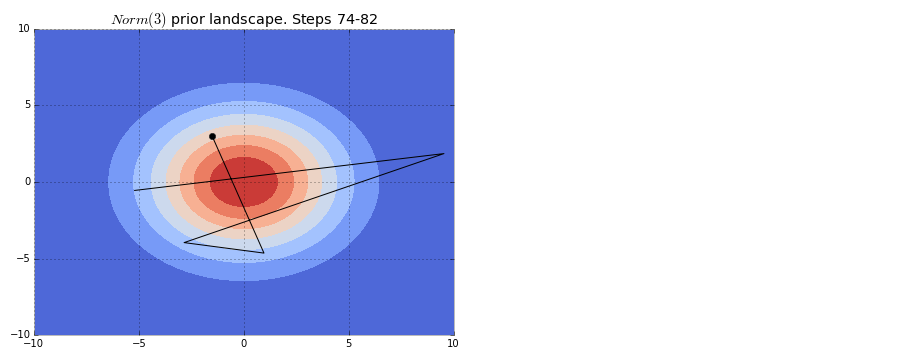
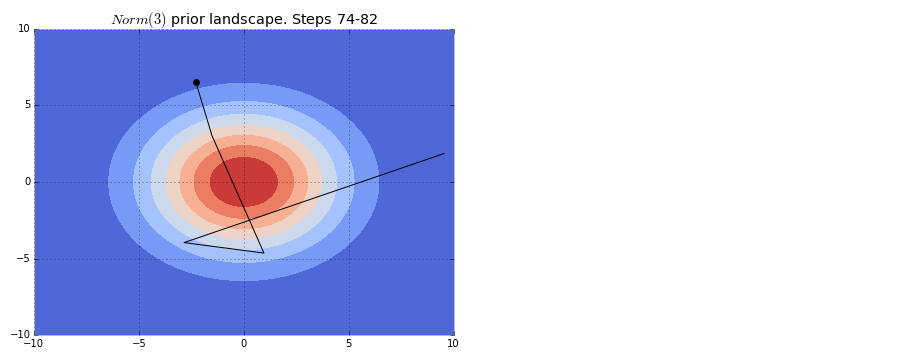
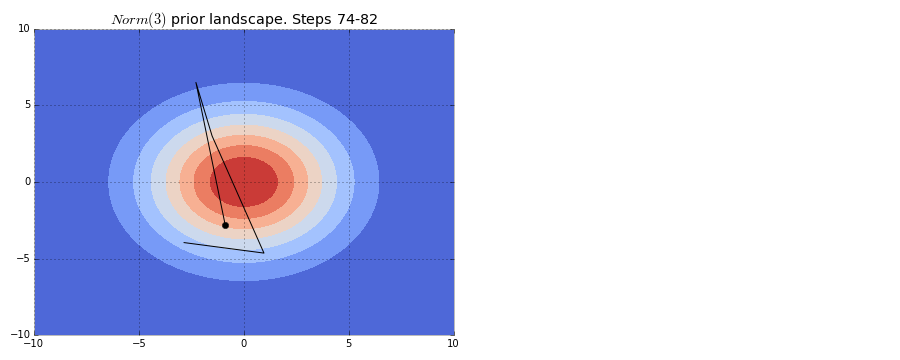
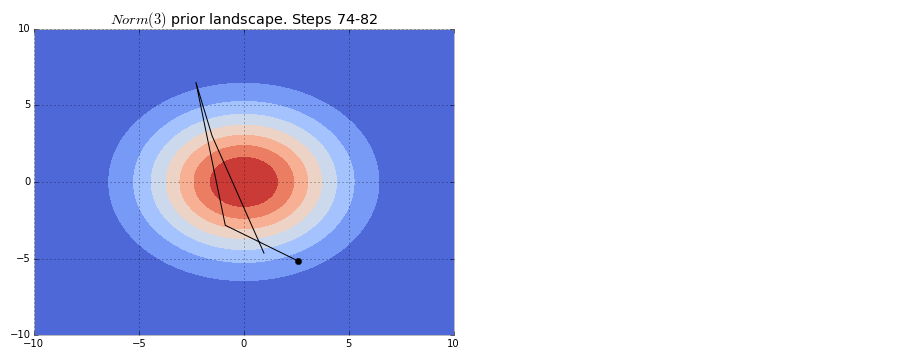
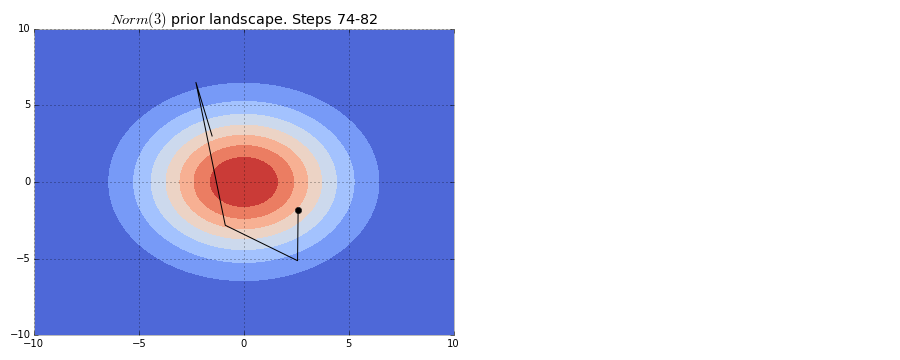
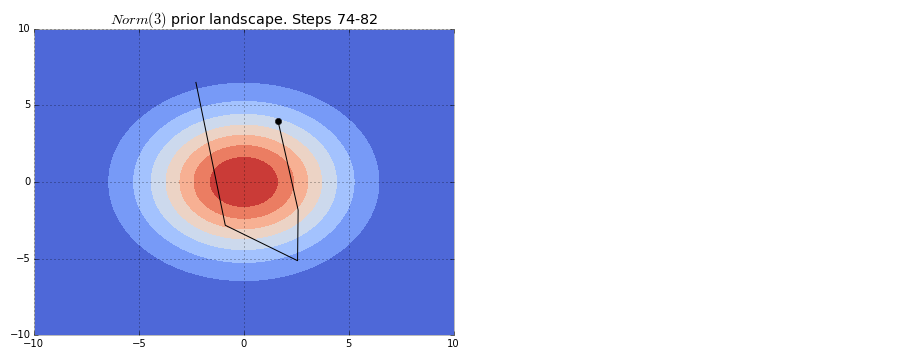
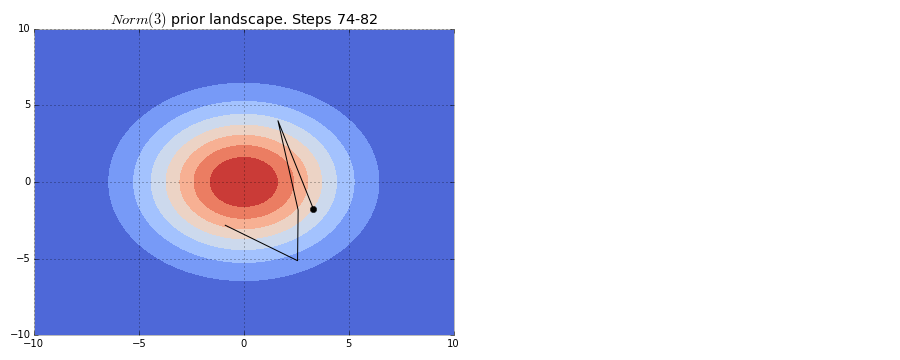
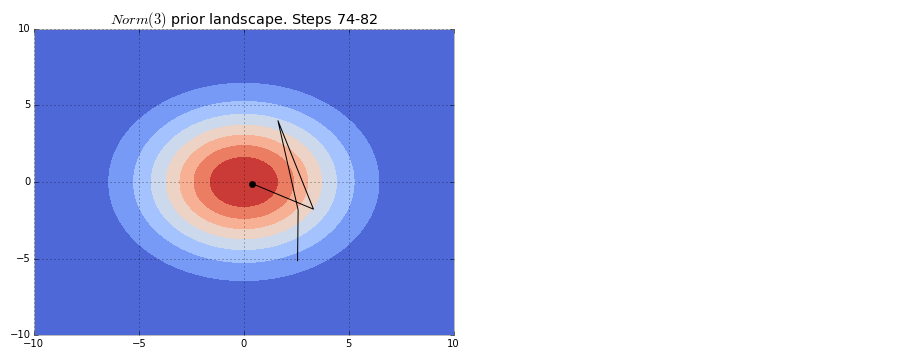
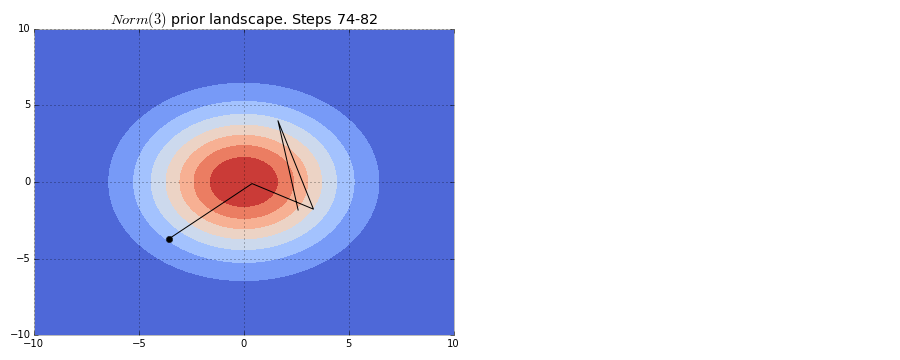
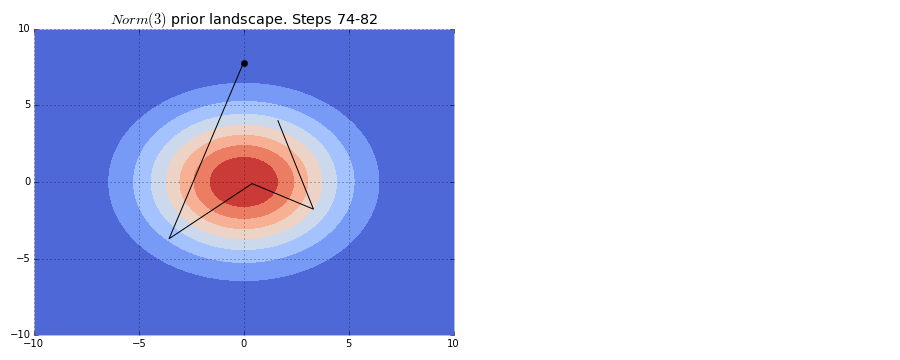
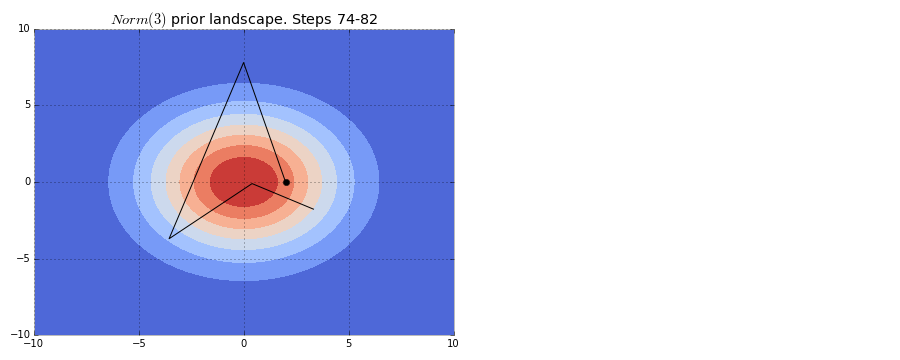
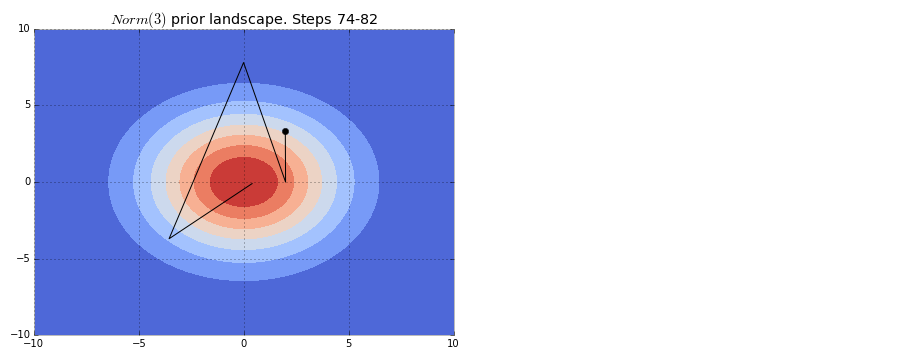
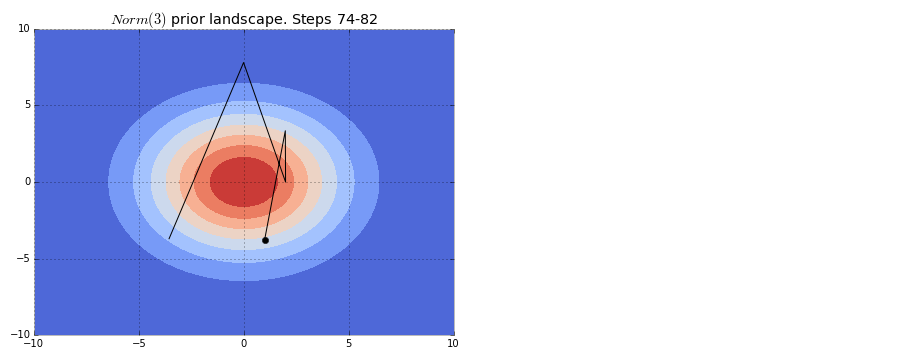
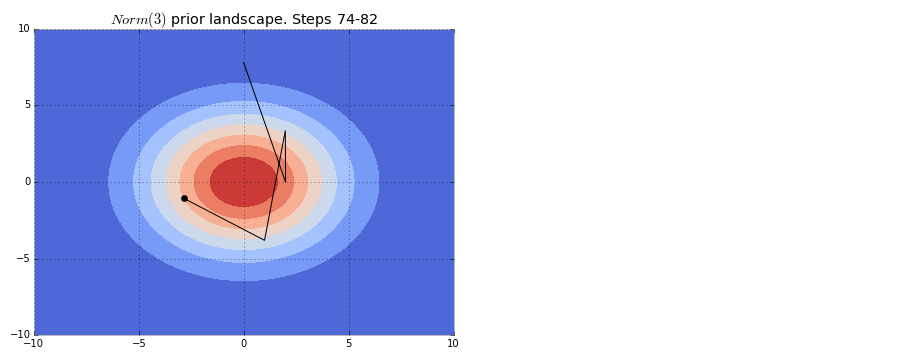
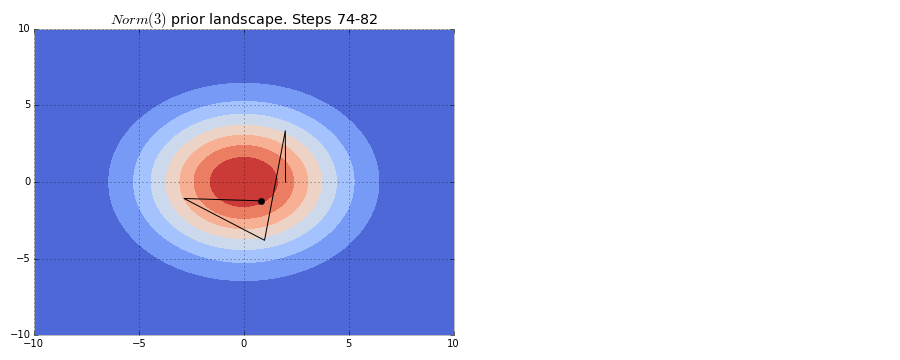
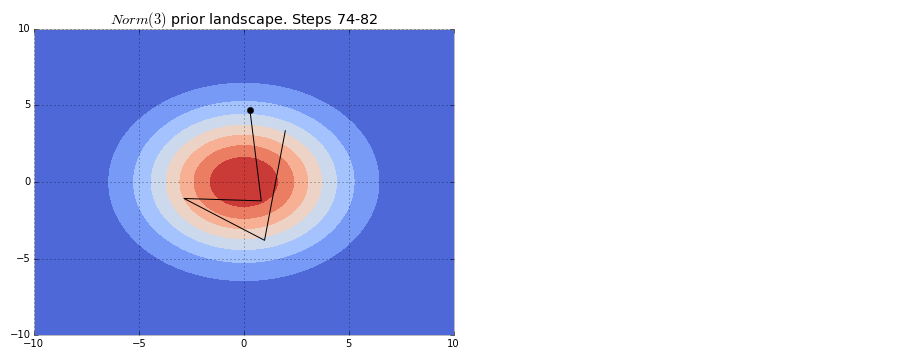
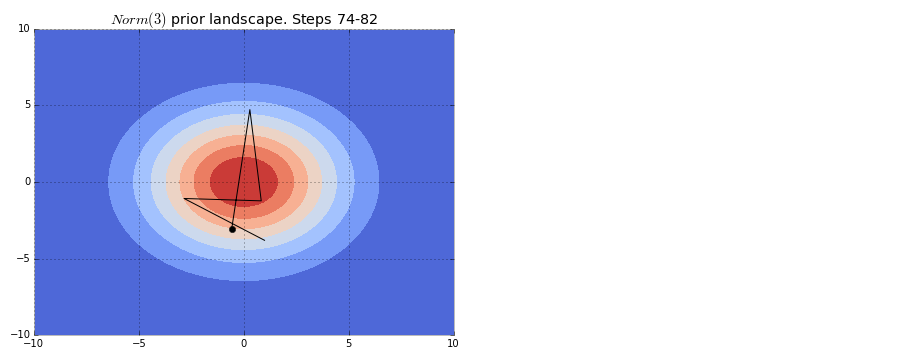
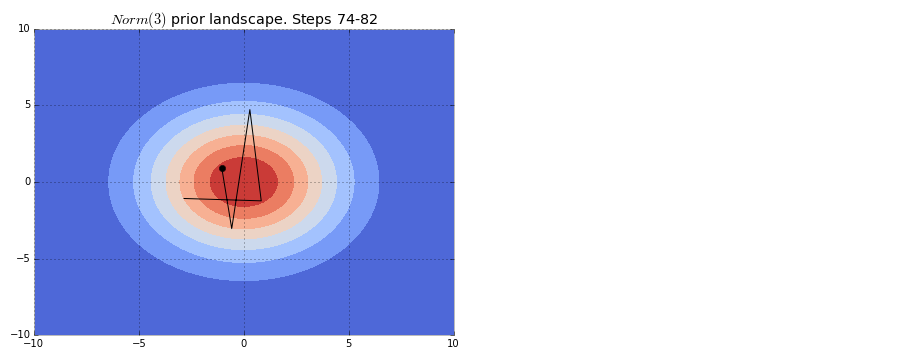
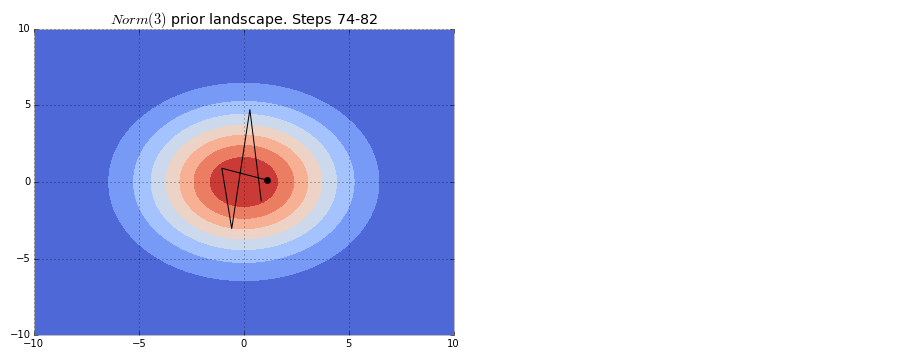
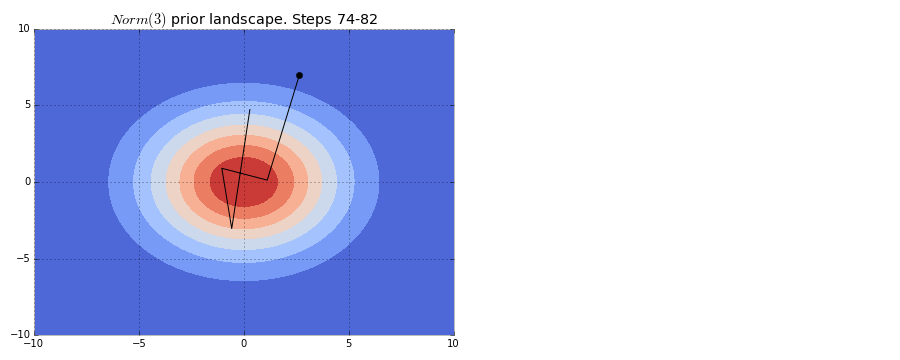
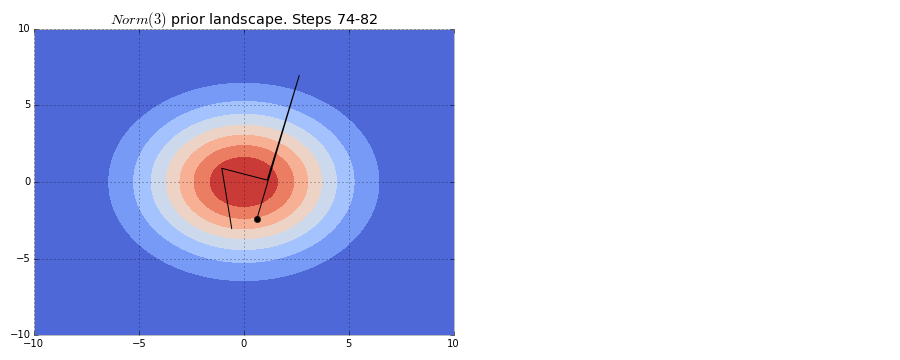
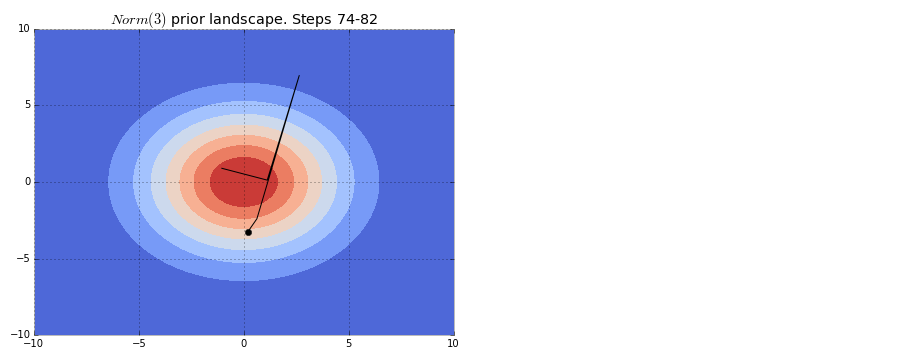
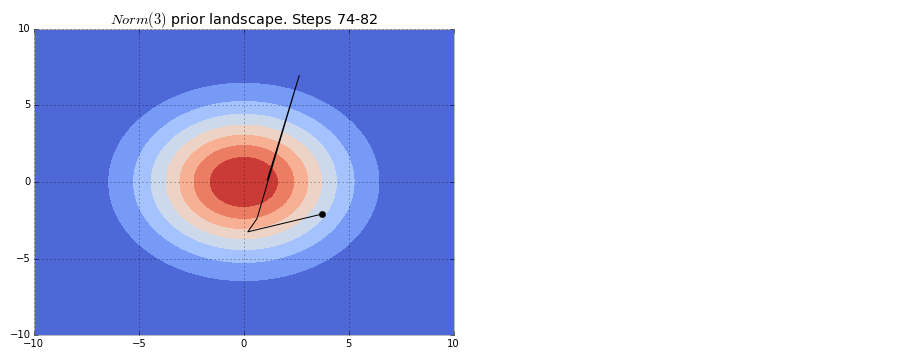
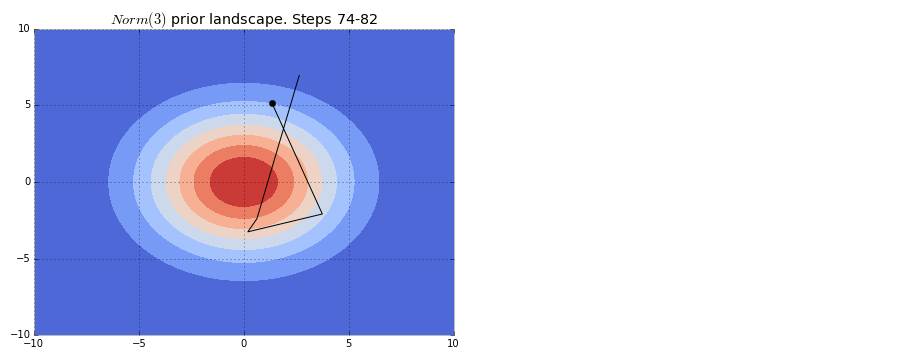
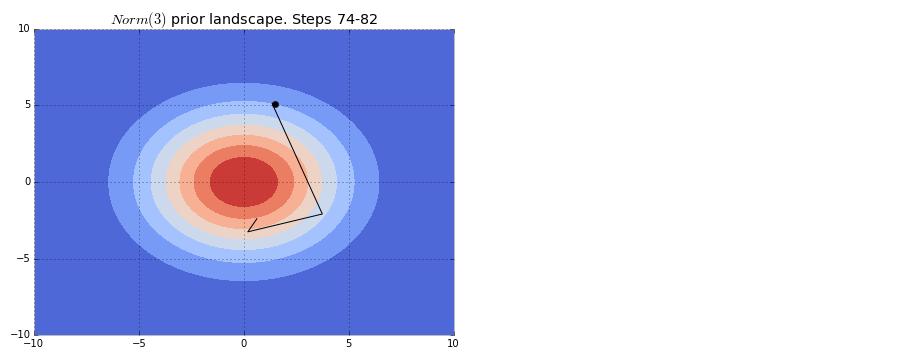
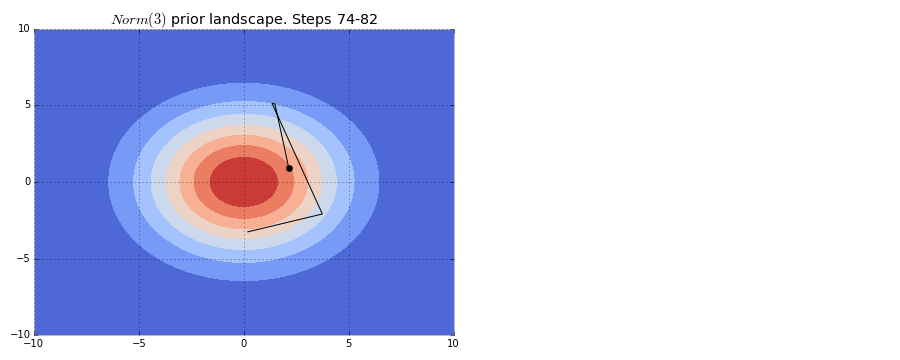
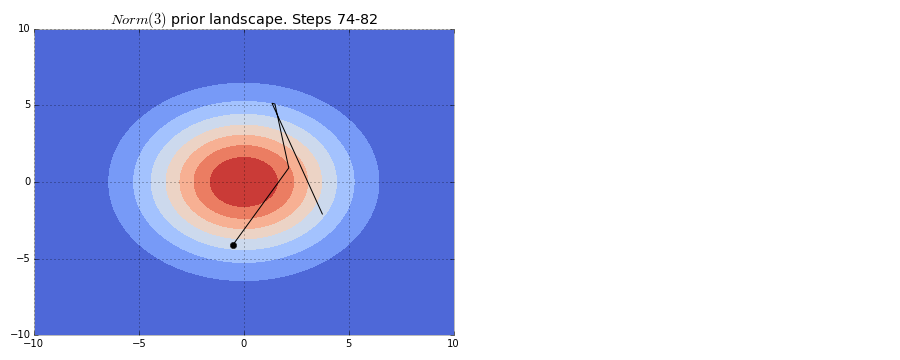
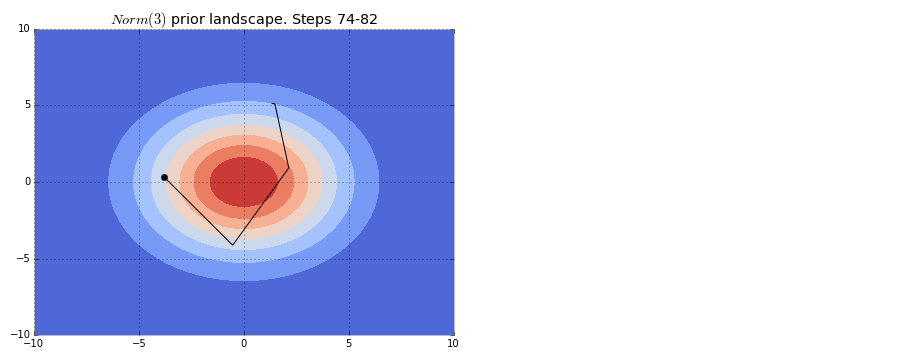
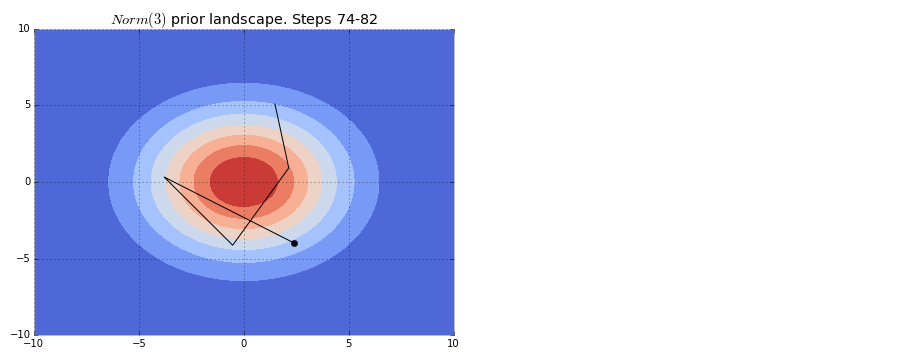
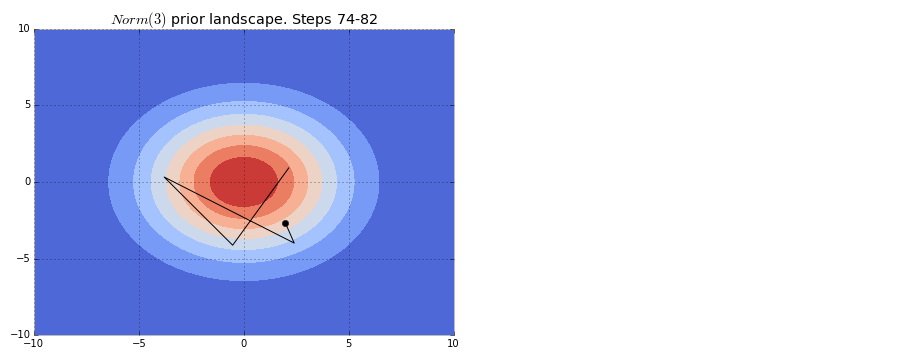
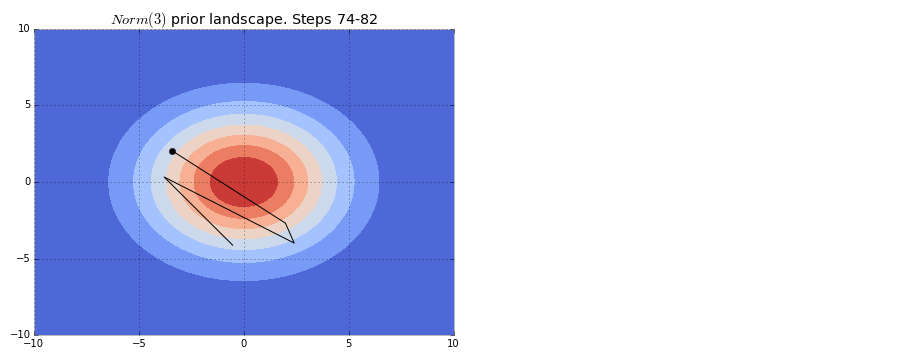
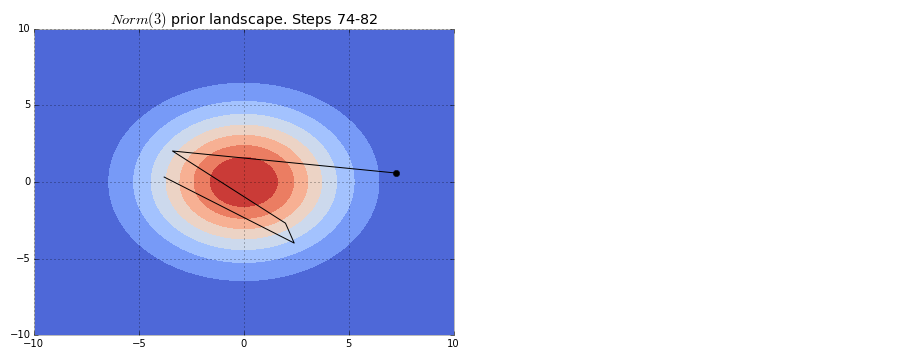
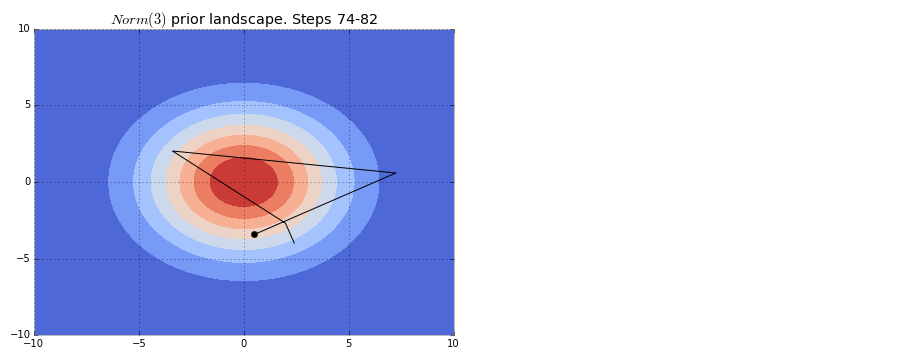
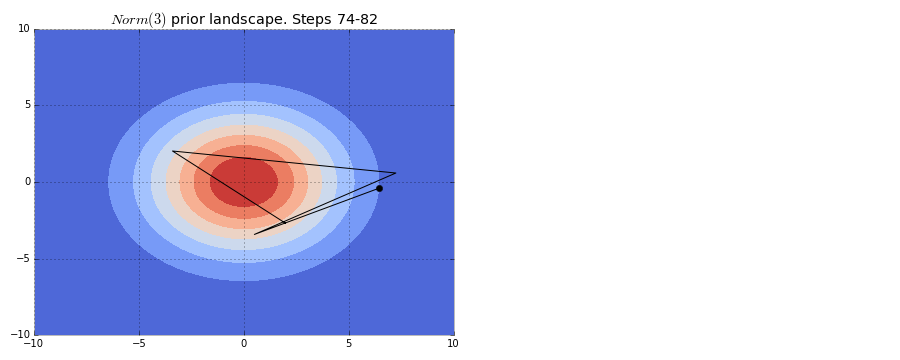
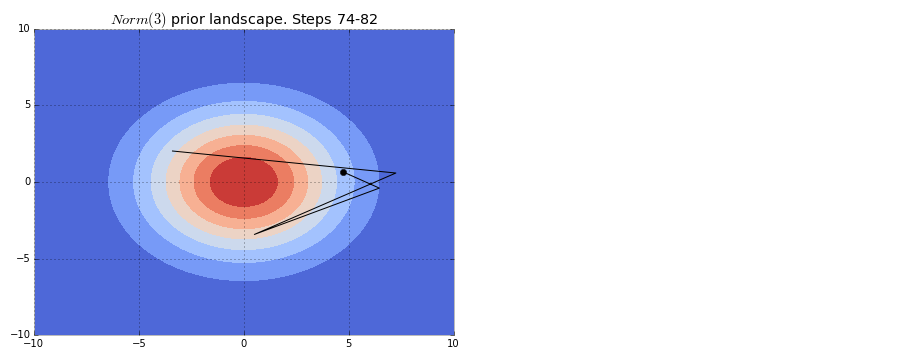
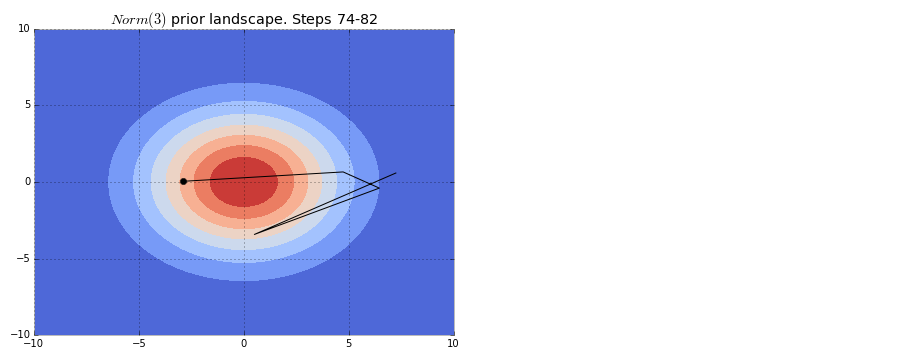
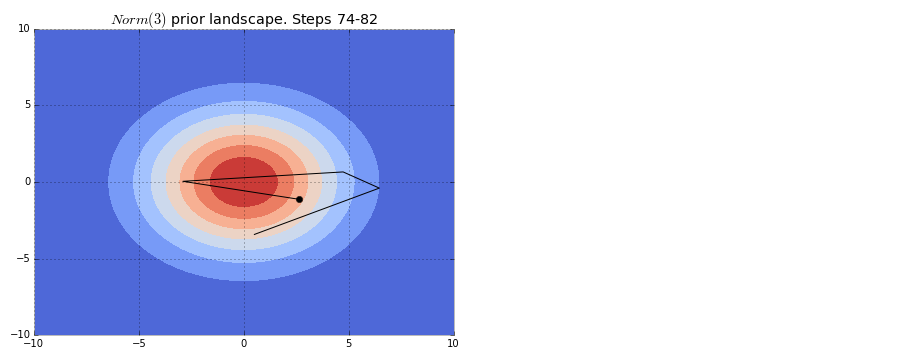
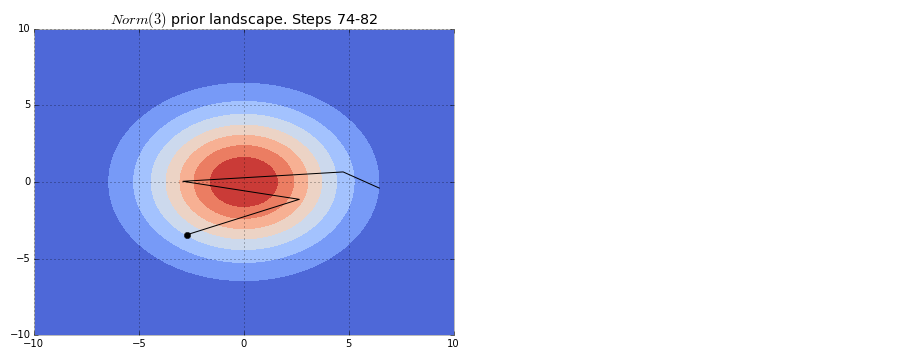
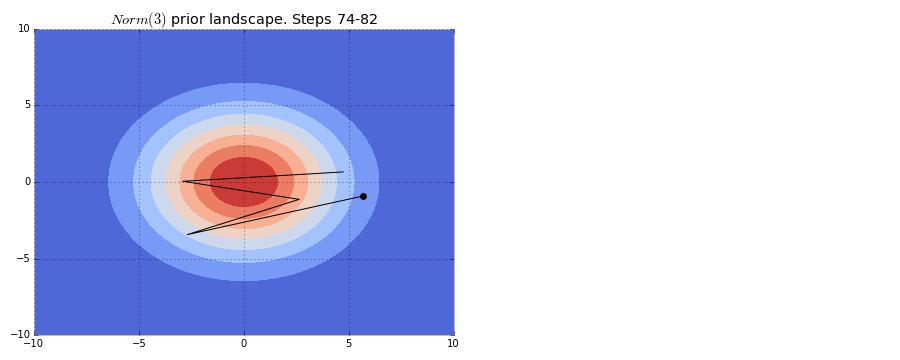
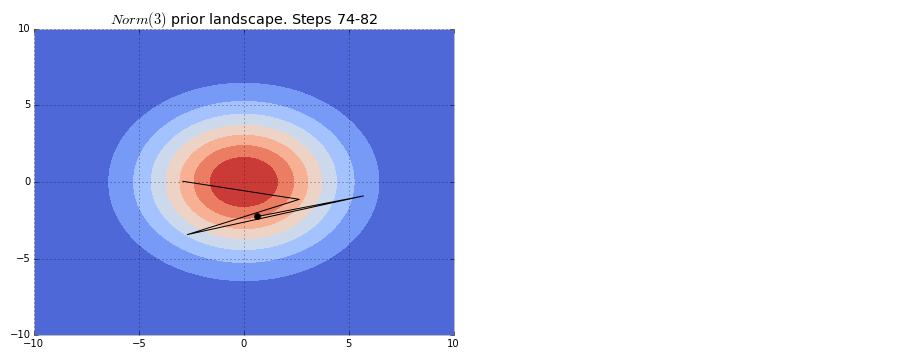
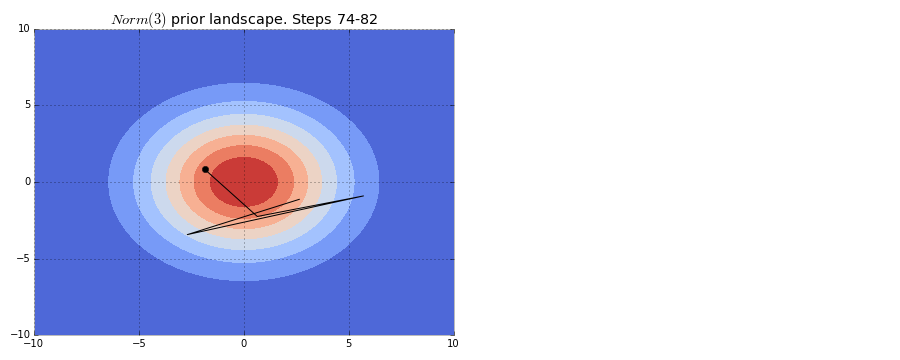
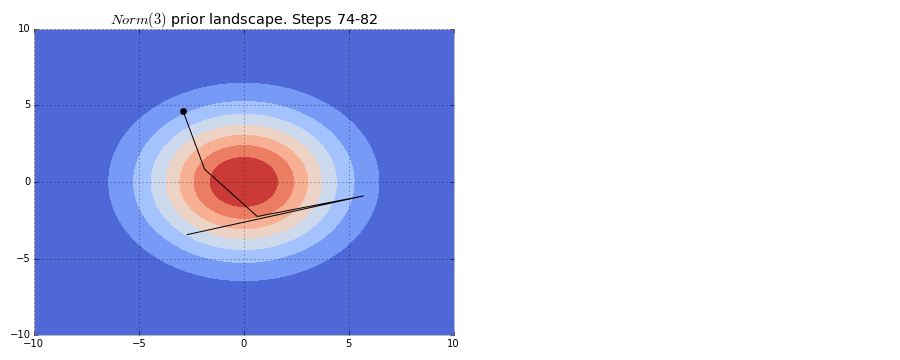
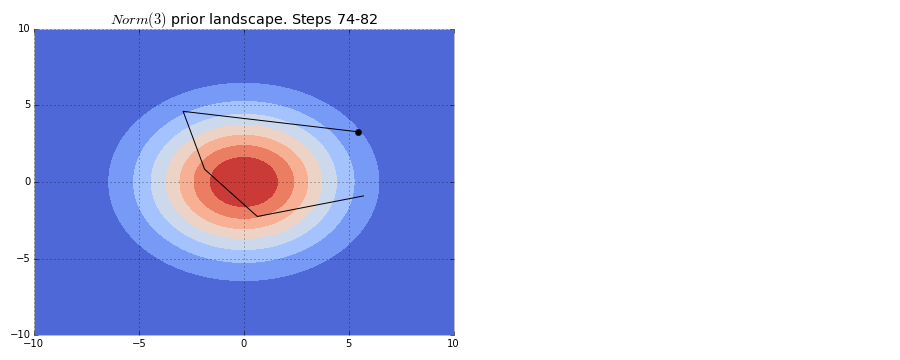

In [8]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from JSAnimation import IPython_display
from matplotlib import animation

figsize(12.5, 5)
fig = plt.figure()
ax = fig.add_subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)
exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])


ax.contourf(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
   

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("$Norm(3)$ prior landscape. Steps 74-82")


plt.tight_layout()



points, = ax.plot([], [], 'bo', ms=6, color = "k")
line, = ax.plot([], [], lw=1, color = "k")

def init():

    points.set_data([], [])
    line.set_data([], [])

    return points

def animate(i):

    points.set_data(trace["alpha"][i],trace["beta"][i])
    x = np.array([trace["alpha"][i], trace["alpha"][i-1], trace["alpha"][i-2], trace["alpha"][i-3],trace["alpha"][i-4]])
    y = np.array([trace["beta"][i], trace["beta"][i-1],trace["beta"][i-2], trace["beta"][i-3],trace["beta"][i-4]])
    
    line.set_data(x,y)

    return points, line


animation.FuncAnimation(fig, animate, init_func=init,
                        frames=100, interval=180, blit=True)



##NUTS

In [9]:
with pm.Model() as model:


#    diff_of_means = pm.Deterministic('difference of means', group1_mean - group2_mean)
 #   diff_of_stds = pm.Deterministic('difference of stds', group1_std - group2_std)
#effect_size = pm.Deterministic('effect size', diff_of_means / pm.sqrt((group1_std**2 + group2_std**2) / 2))


    alpha = pm.Normal("alpha", 0, 0.1)

    beta = pm.Normal("beta", 0, 0.1) # less uncertainty than before
#thickness_layer2 = pm.Normal("thickness_layer2", 100, 0.01)


    
    
        
    #gamma = pm.Deterministic("gamma", beta-thickness_layer2)


    step = pm.NUTS() # instantiate sampler
    trace = pm.sample(200, step, njobs=1) # draw 500 posterior samplers
#    step = pm.NUTS()
#    trace = pm.sample(50, step)

 [-----------------100%-----------------] 200 of 200 complete in 0.2 sec

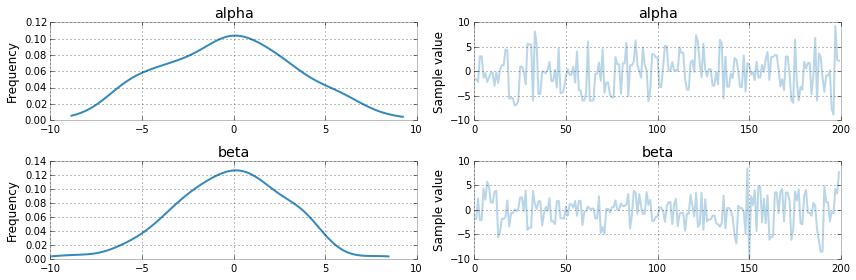

In [10]:
%matplotlib inline


pm.traceplot(trace);


###Points distribution

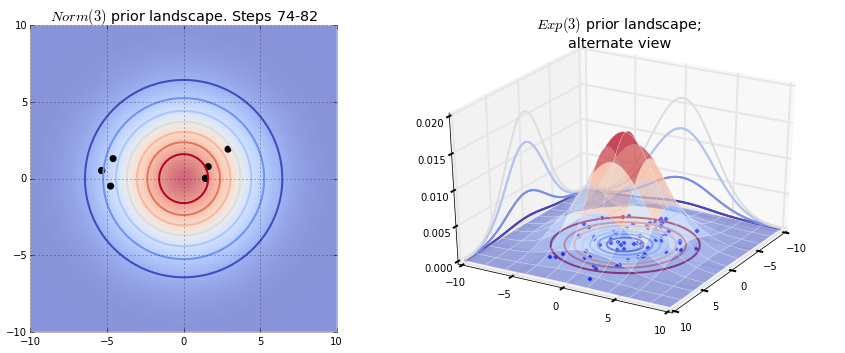

In [14]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)

#print exp_x[:, None]

exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
im = plt.imshow(M, interpolation='none', origin='lower', alpha=0.6,
                 cmap=cm.coolwarm, extent=(-10, 10, -10, 10))
plt.xlim(-10,10)
plt.ylim(-10,10)
for i in range(74,82):
    plt.scatter(trace["alpha"][i], trace["beta"][i], c="k", s=50, edgecolor="none")
    #plt.scatter(alpha.trace[51], beta.trace[51], c="k", s=50, edgecolor="none")
#plt.xlabel("prior on $p_1$")
#plt.ylabel("prior on $p_2$")
plt.title("$Norm(3)$ prior landscape. Steps 74-82")

#plt.subplot(222)
#plt.plot(exp_x)
plt.tight_layout()

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M,  cmap=cm.coolwarm, alpha=0.5)
ax.view_init(azim=390)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 0.02])

for i in range(80):
    ax.scatter(trace["alpha"][i], trace["beta"][i])
plt.title("$Exp(3)$ prior landscape; \nalternate view")


cset = ax.contour(X, Y, M, zdir='z', offset=0, cmap=cm.coolwarm_r)
cset = ax.contour(X, Y, M, zdir='x', offset=-10, cmap=cm.coolwarm_r)
cset = ax.contour(X, Y, M, zdir='y', offset=-10, cmap=cm.coolwarm_r)


### Searching algorithm


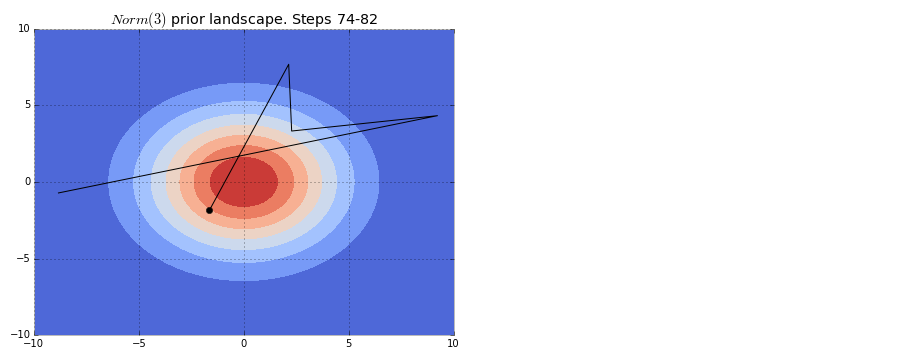
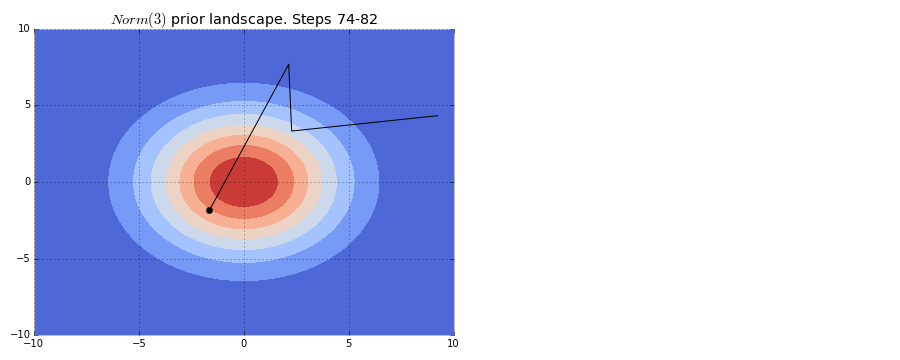
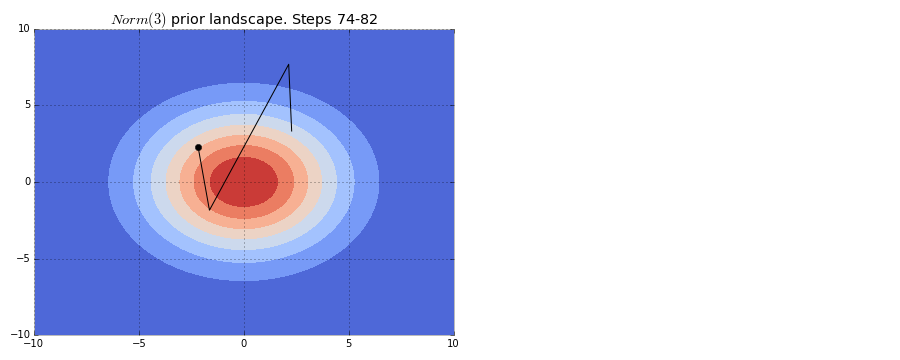
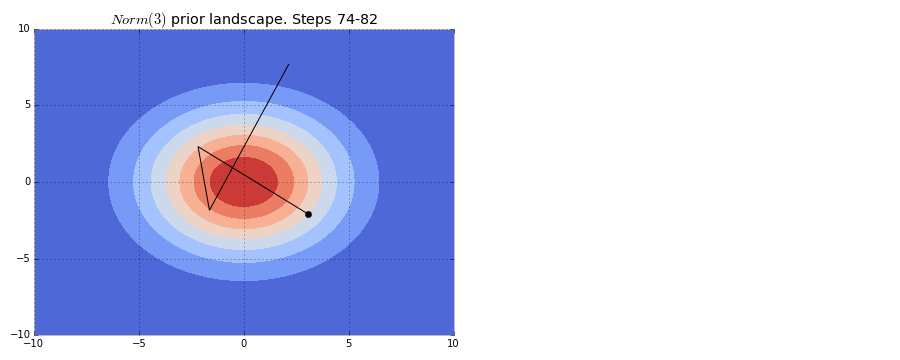
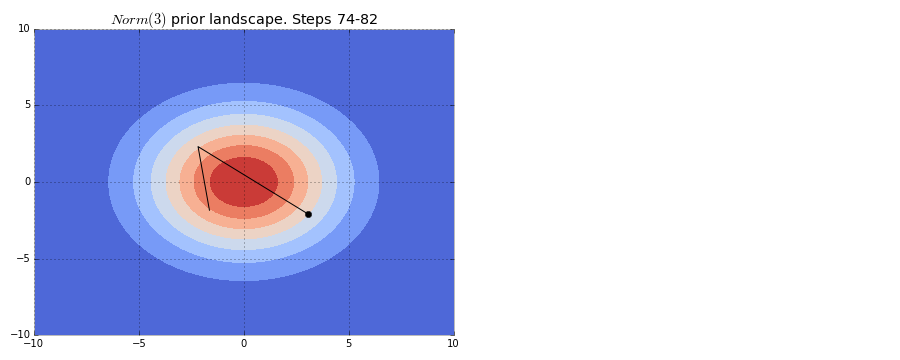
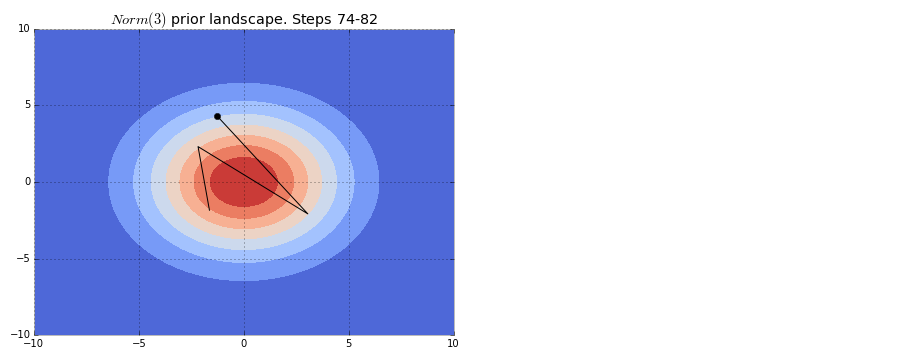
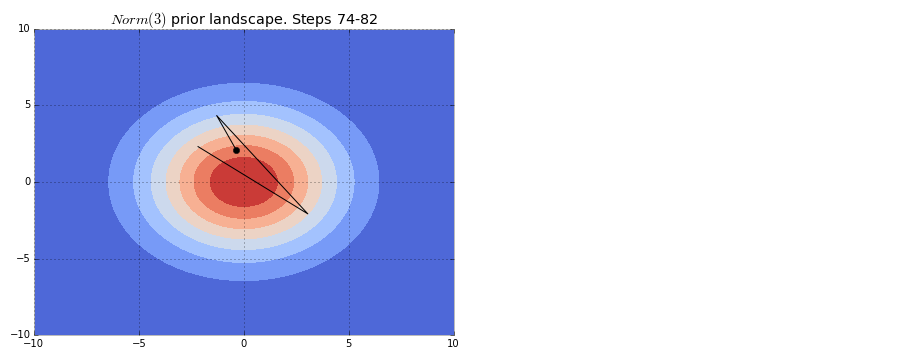
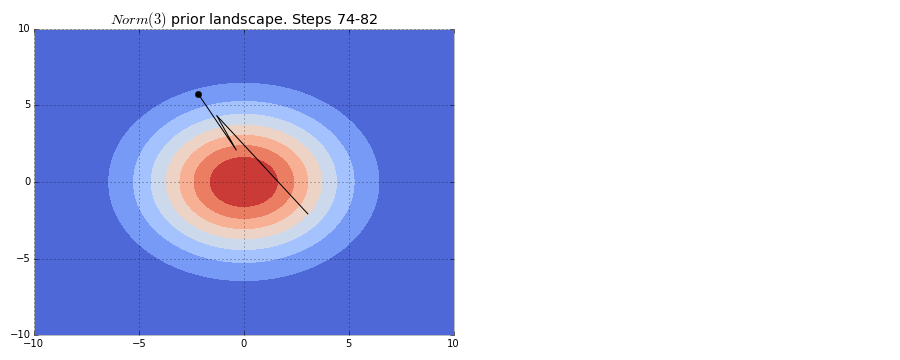
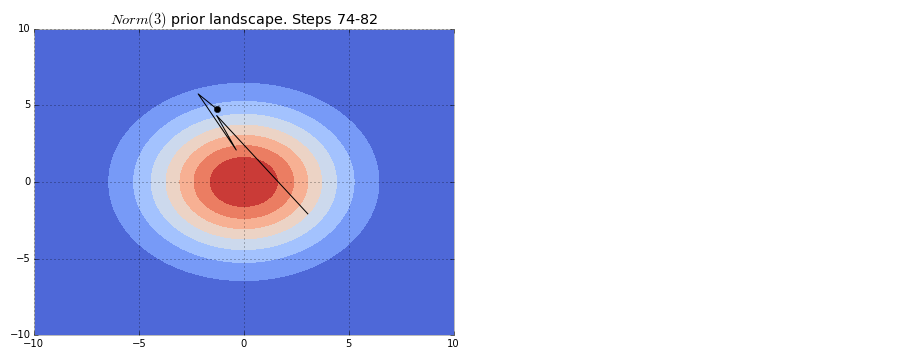
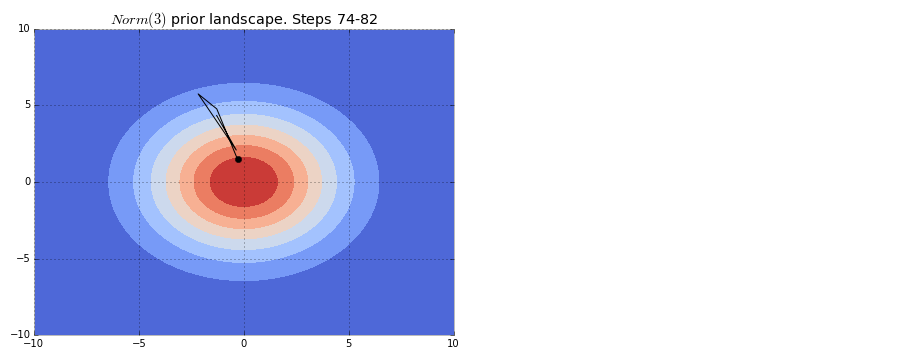
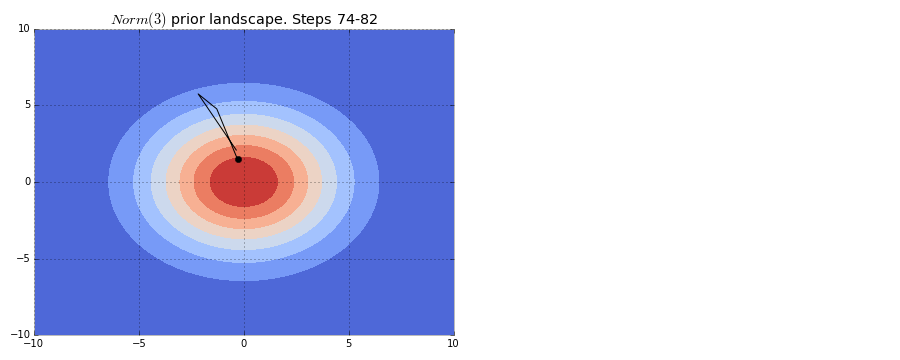
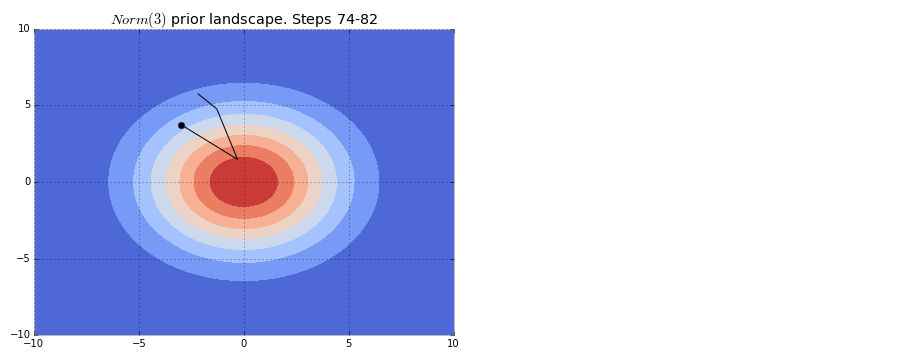
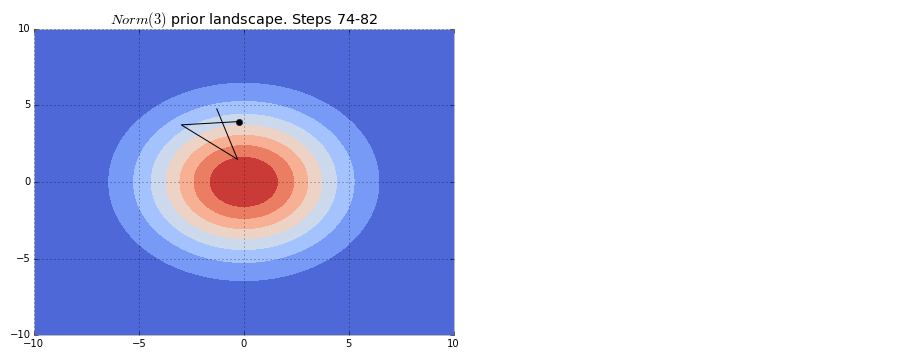
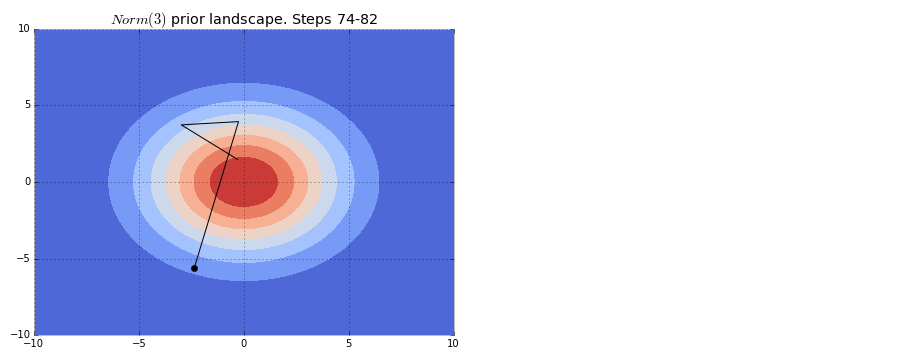
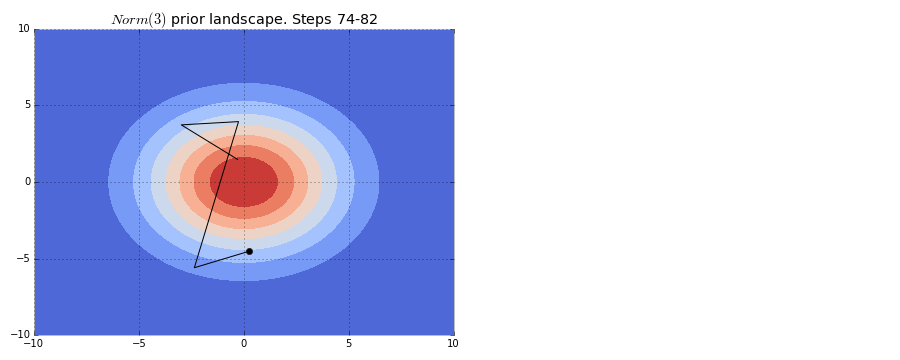
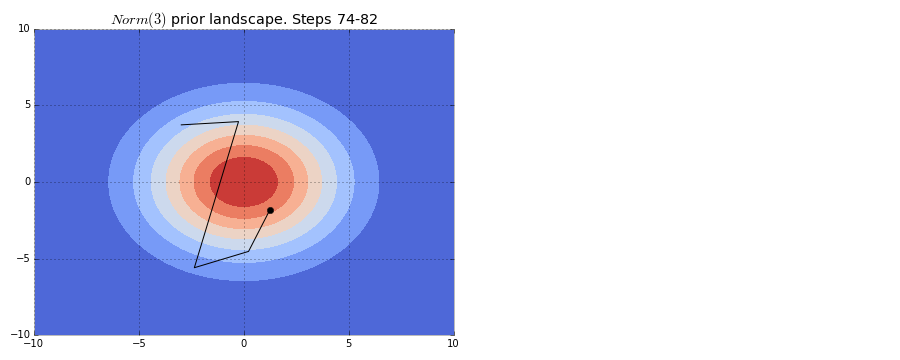
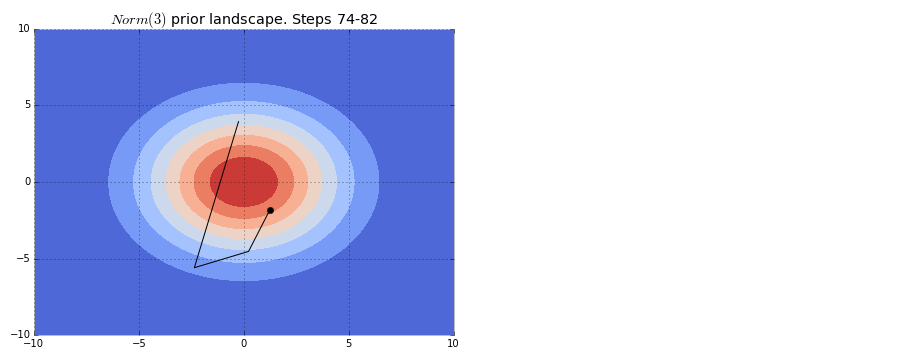
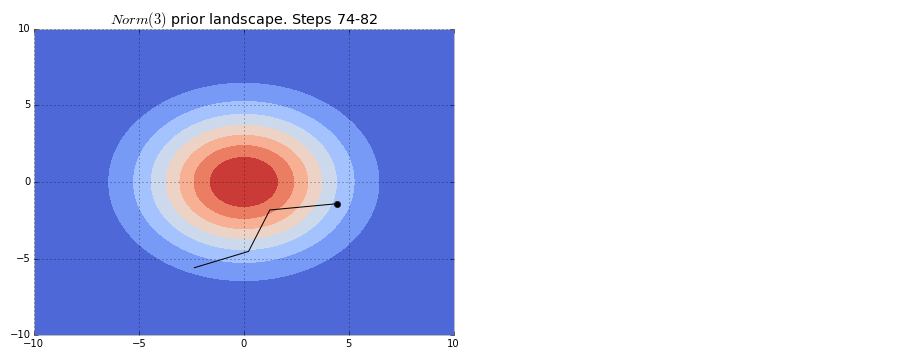
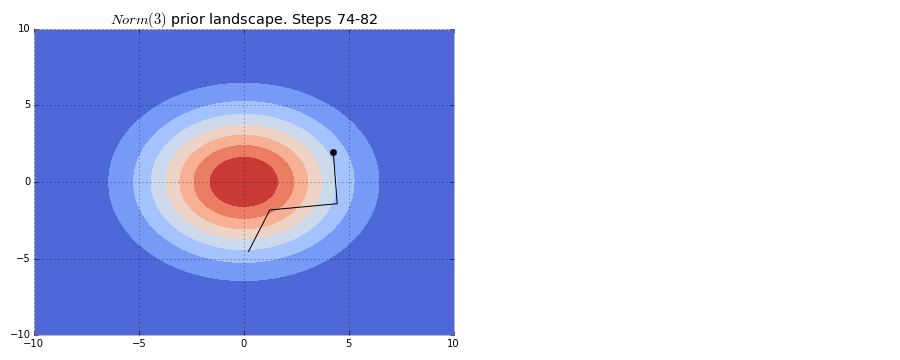
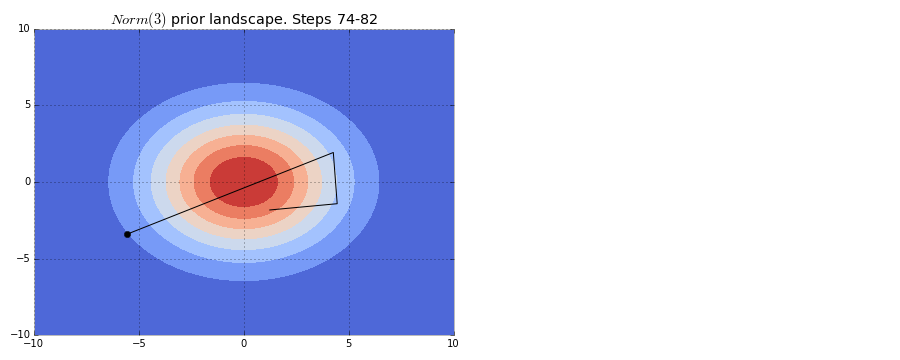
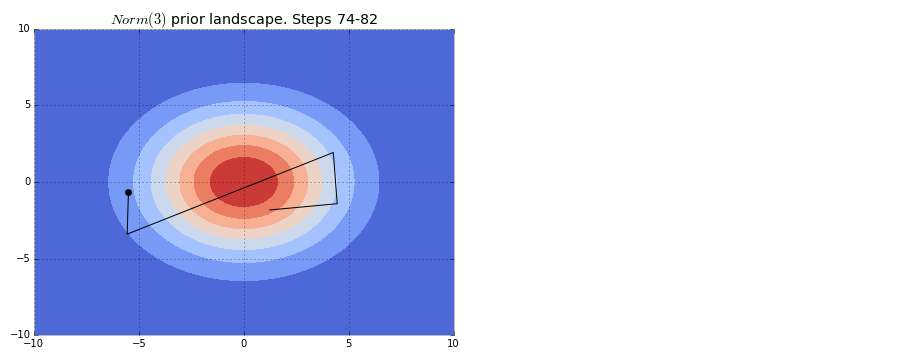
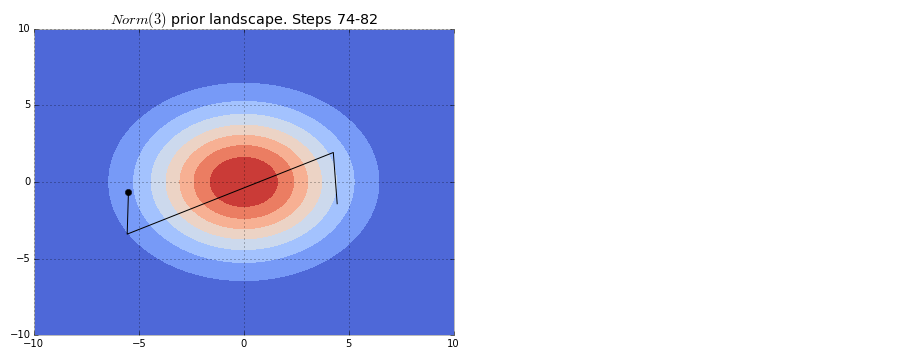
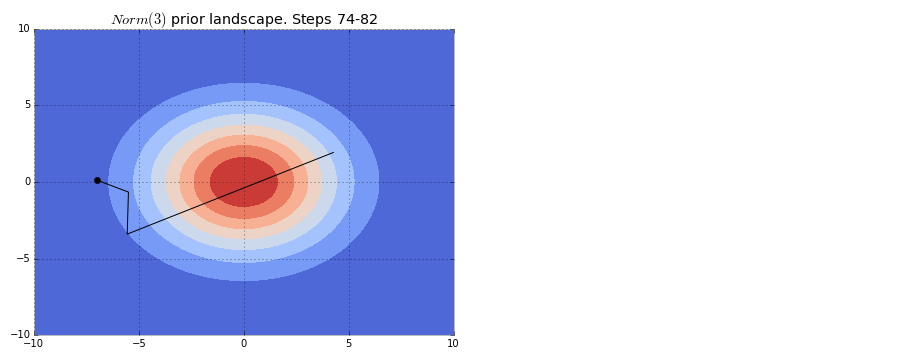
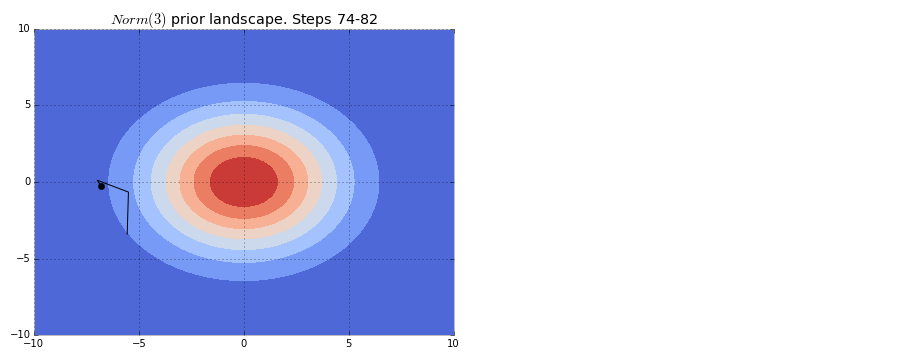
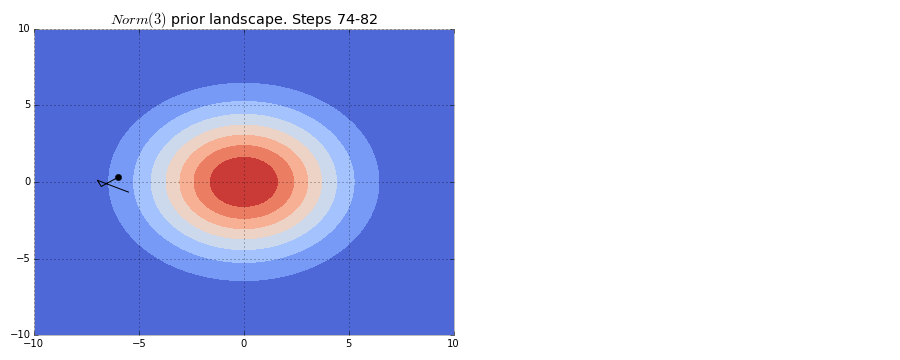
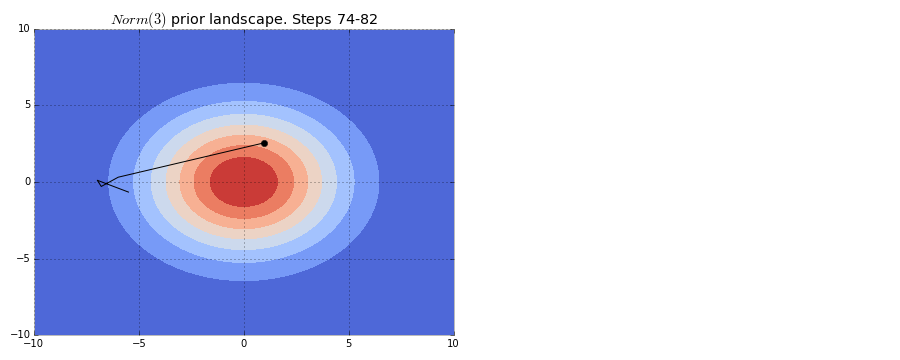
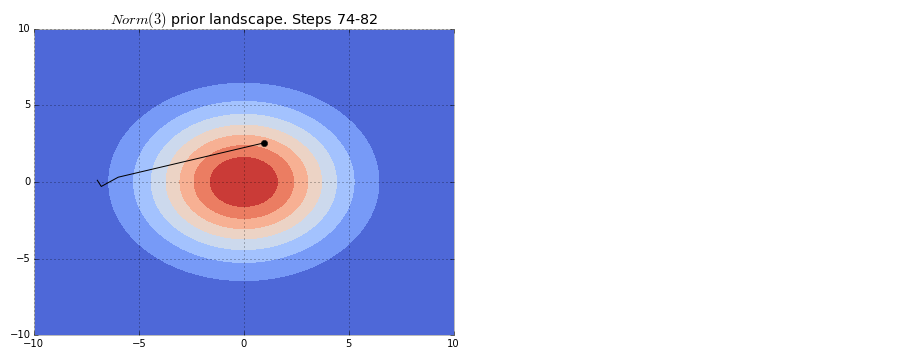
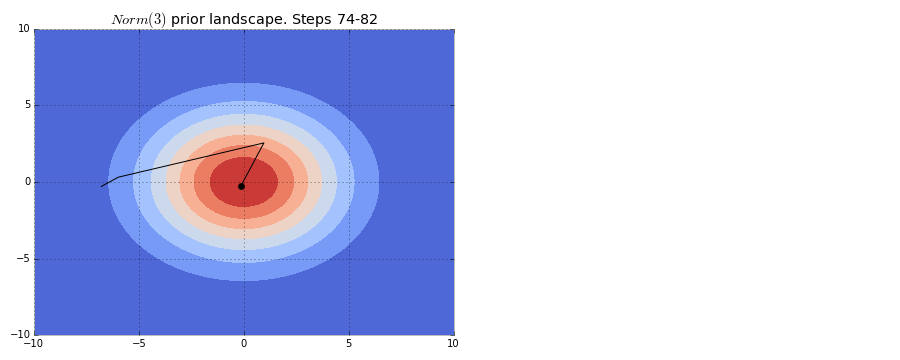
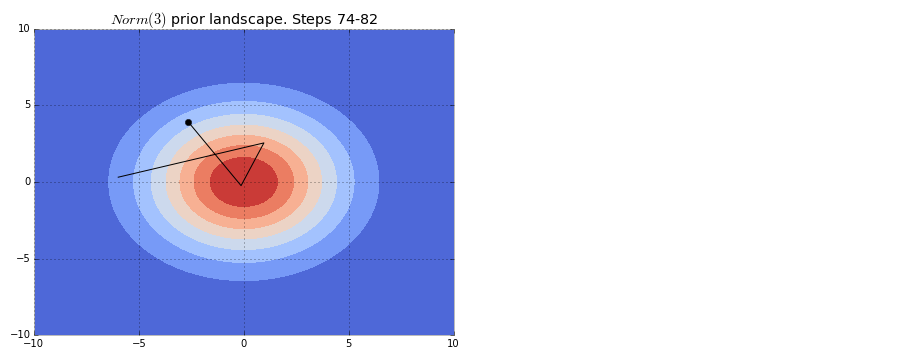
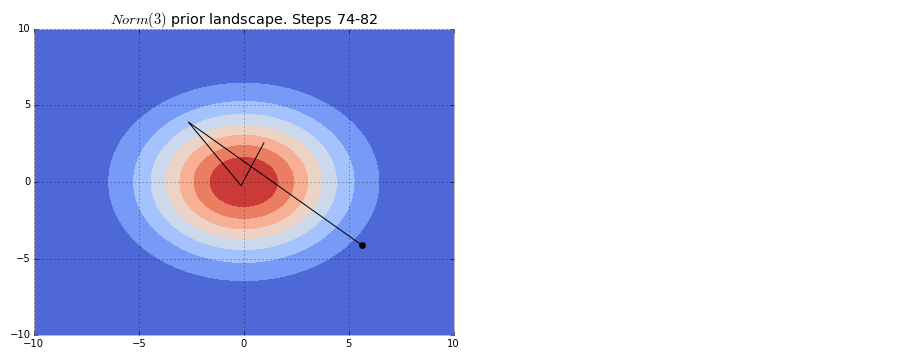
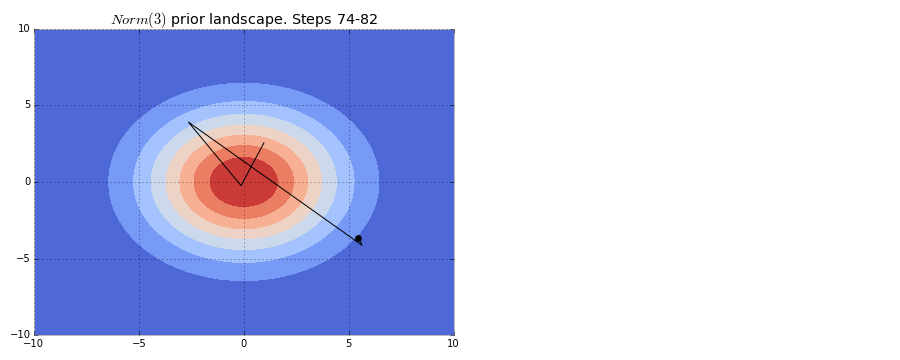
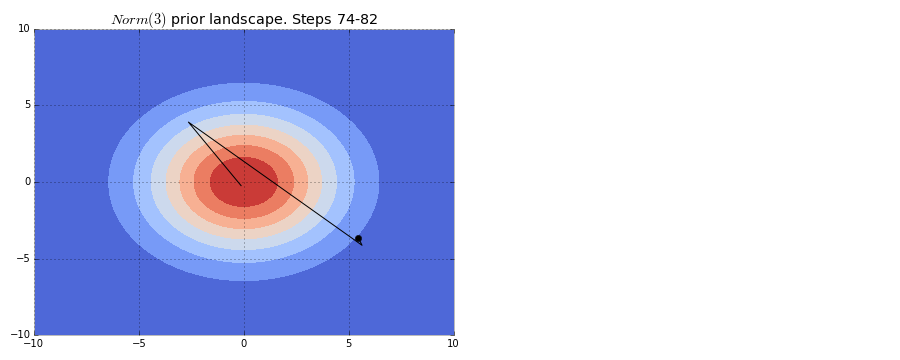
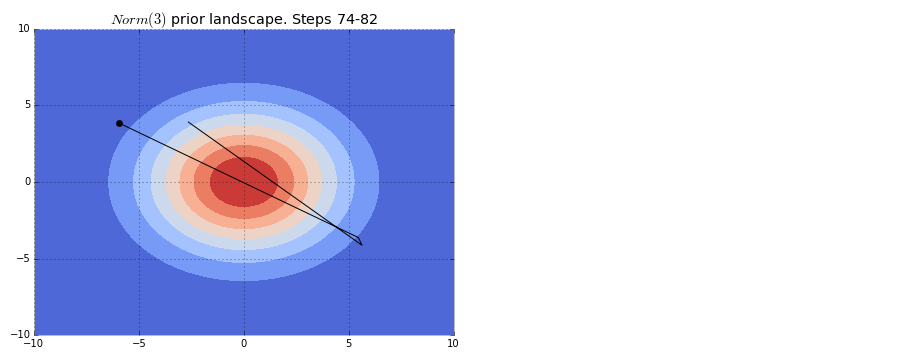
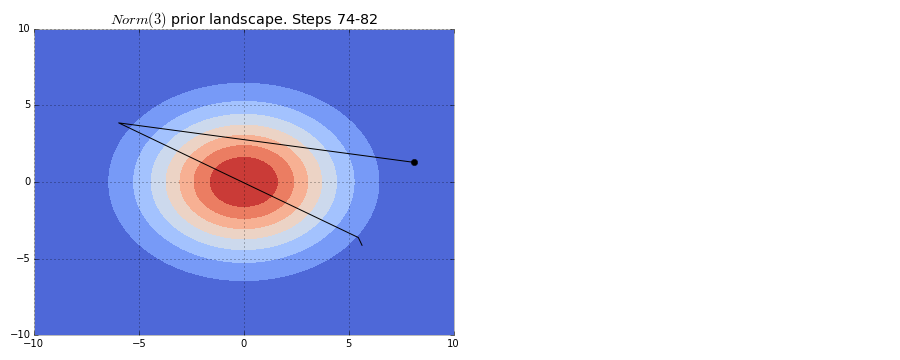
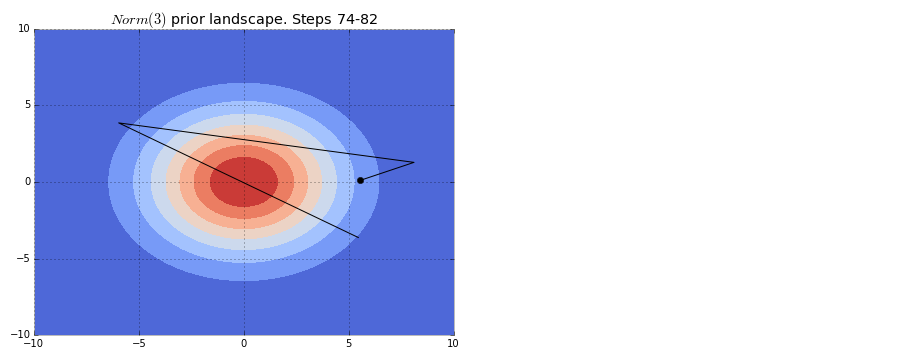
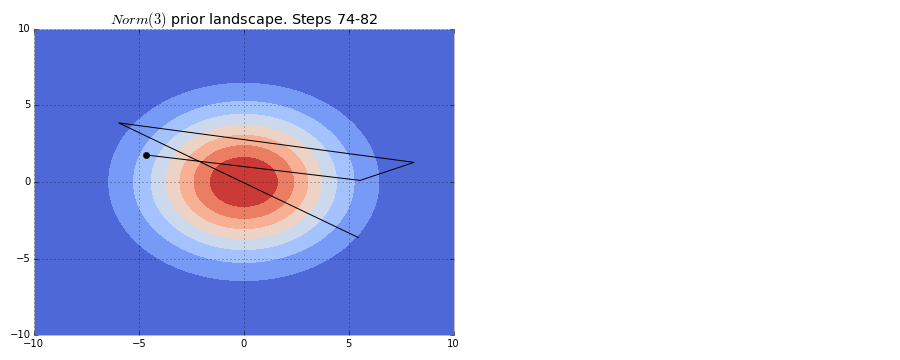
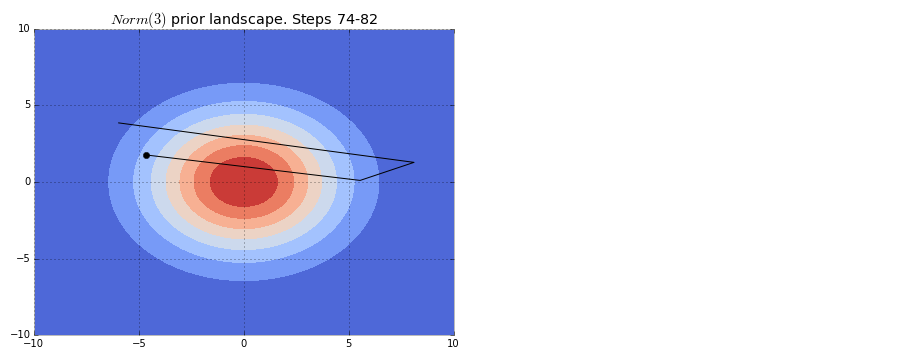
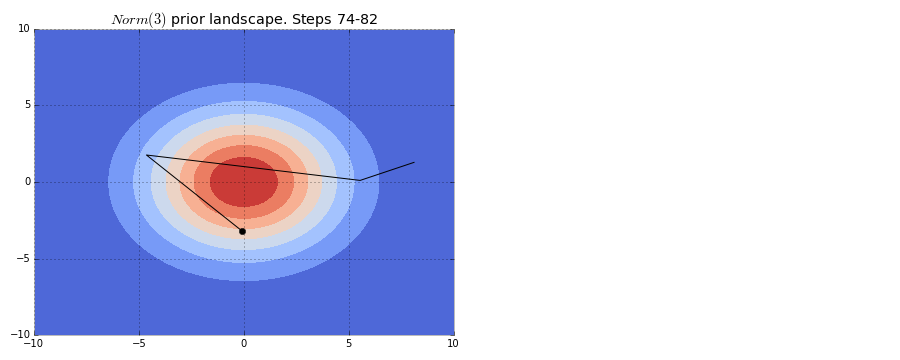
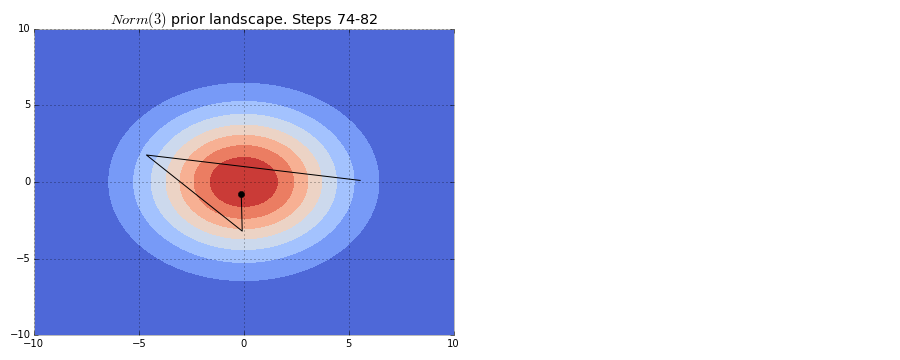
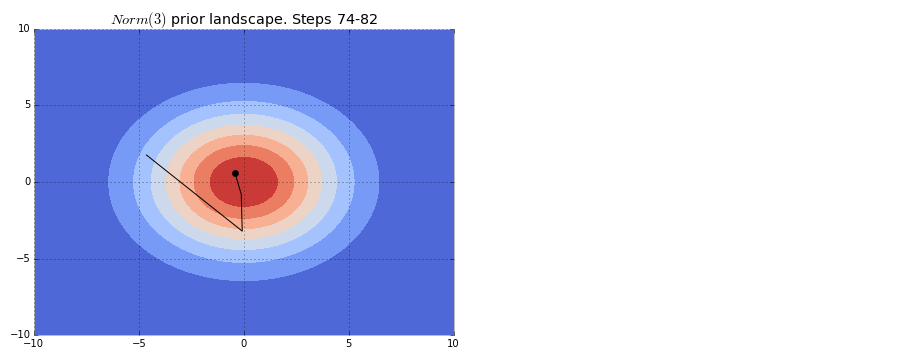
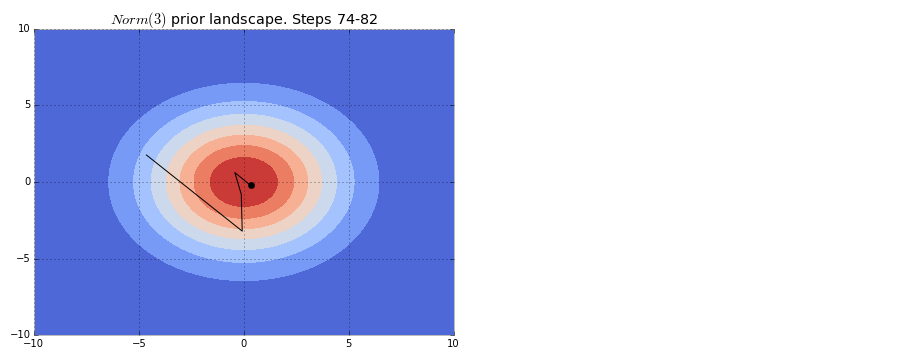
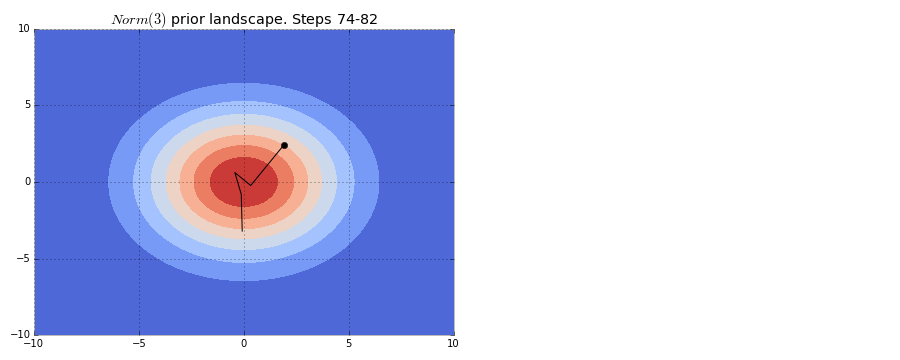
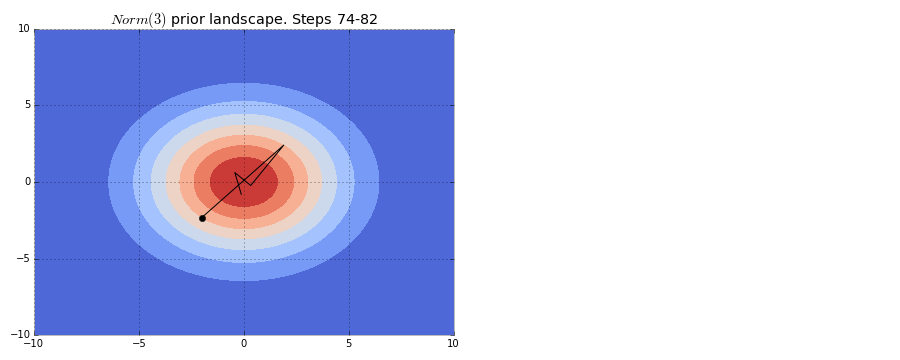
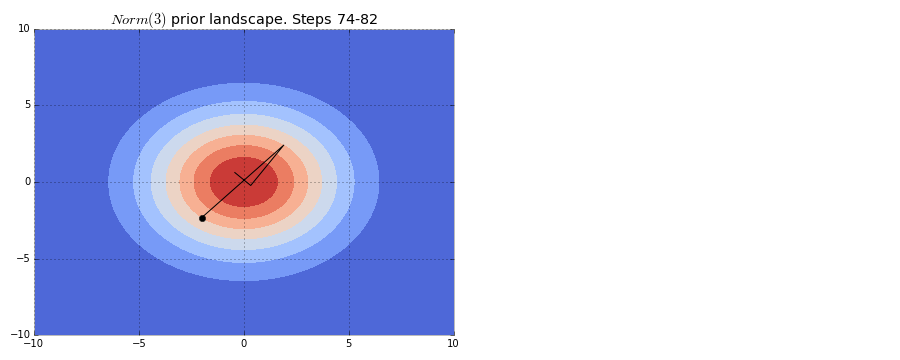
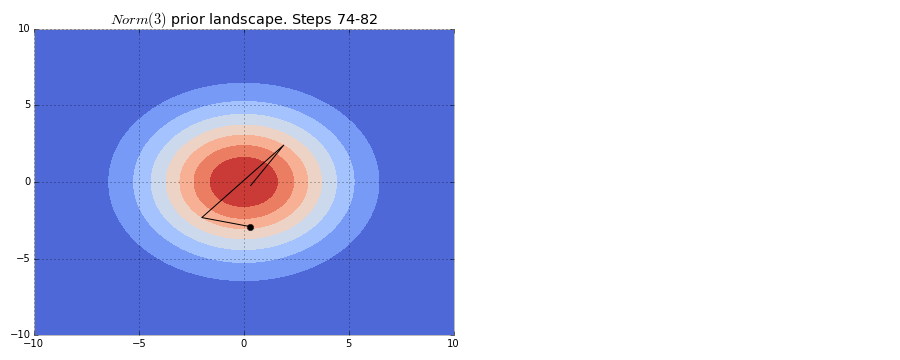
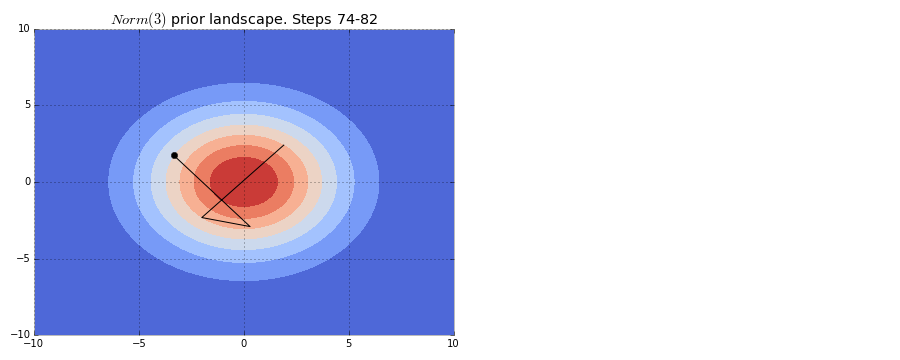
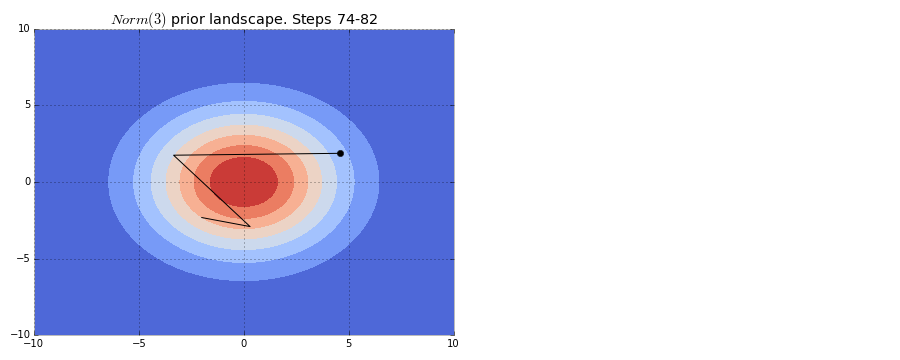
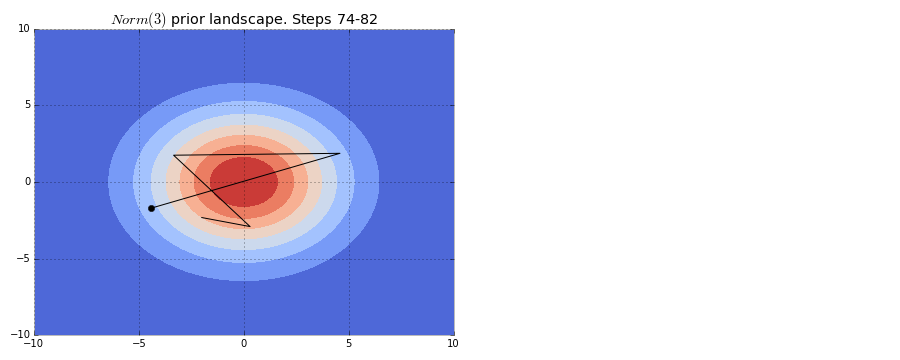
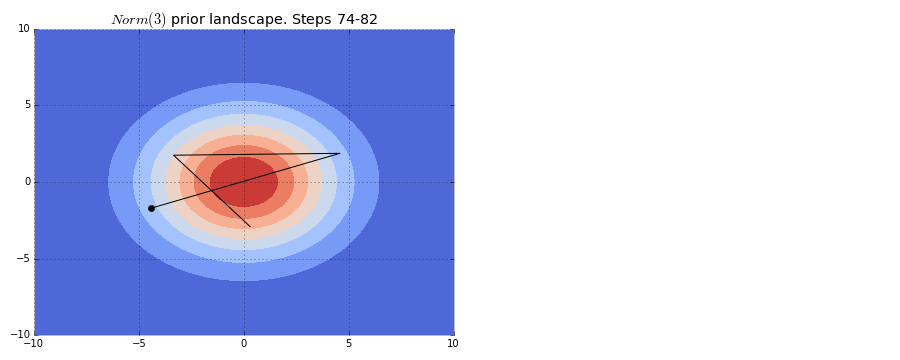
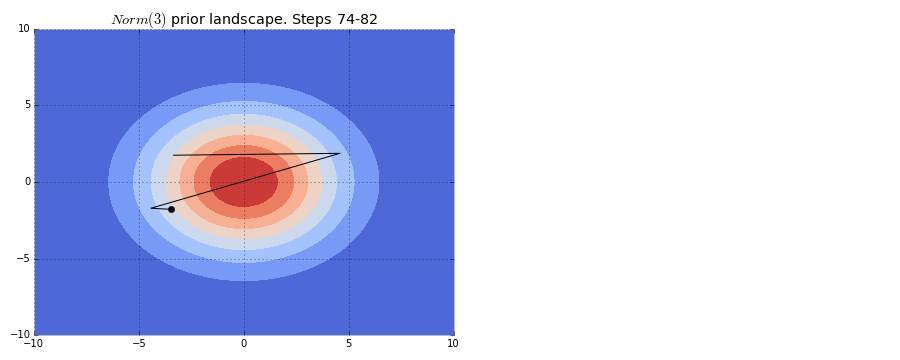
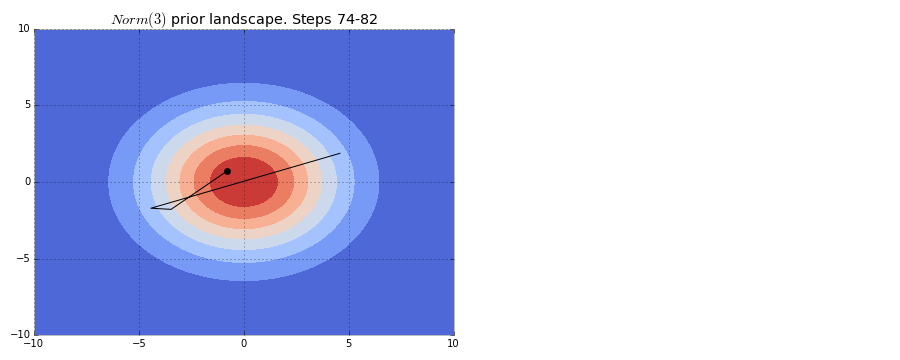
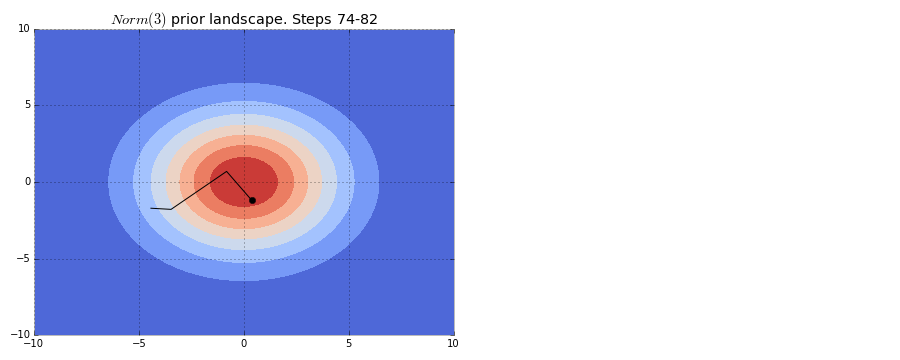
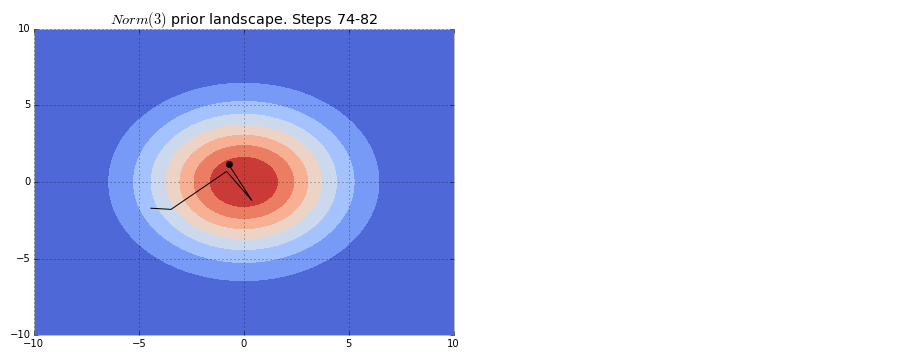
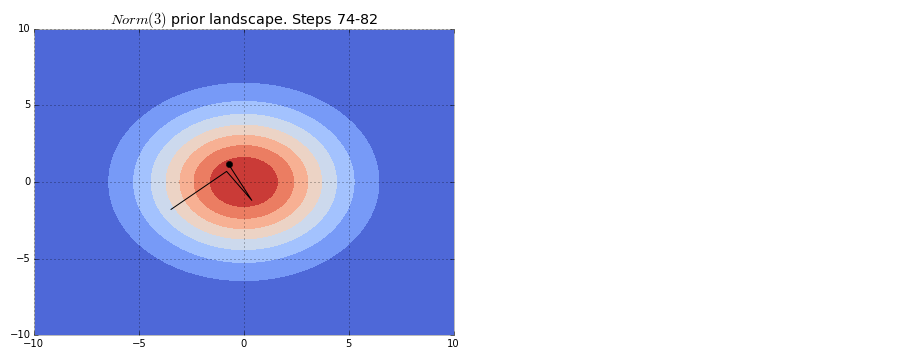
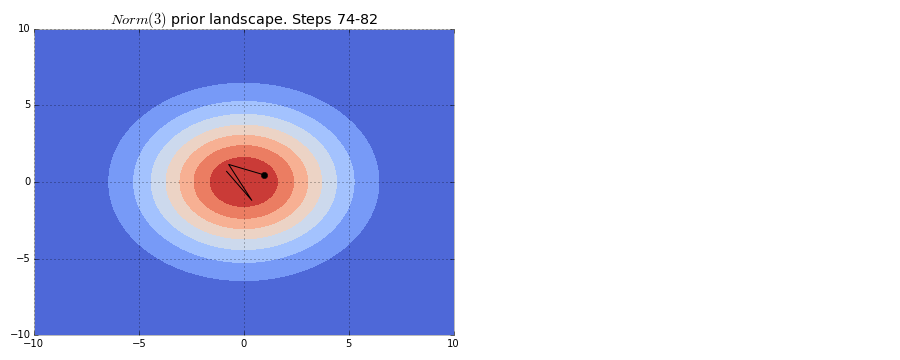
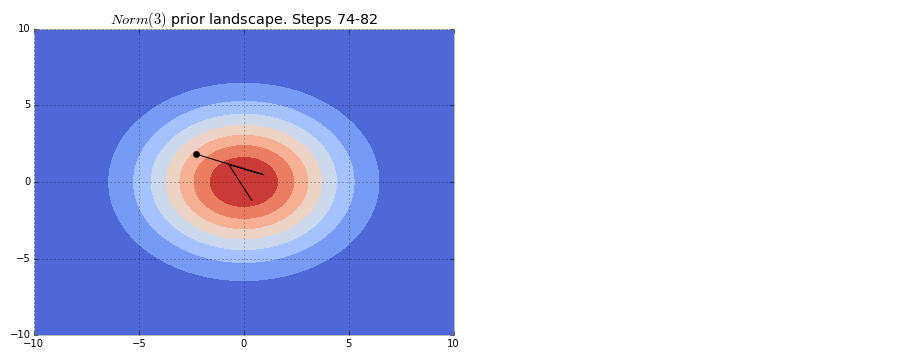
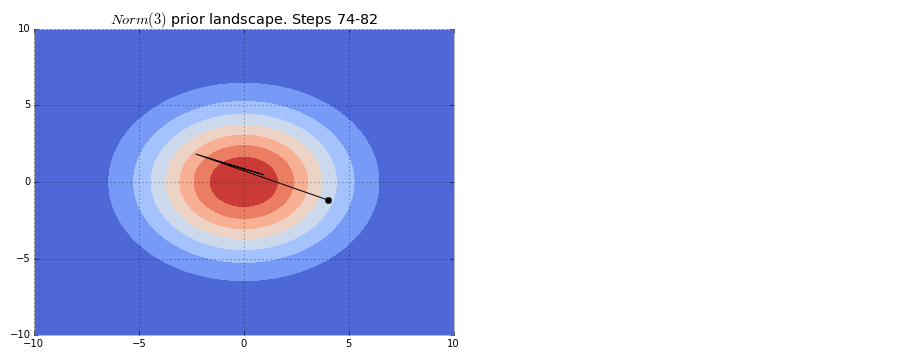
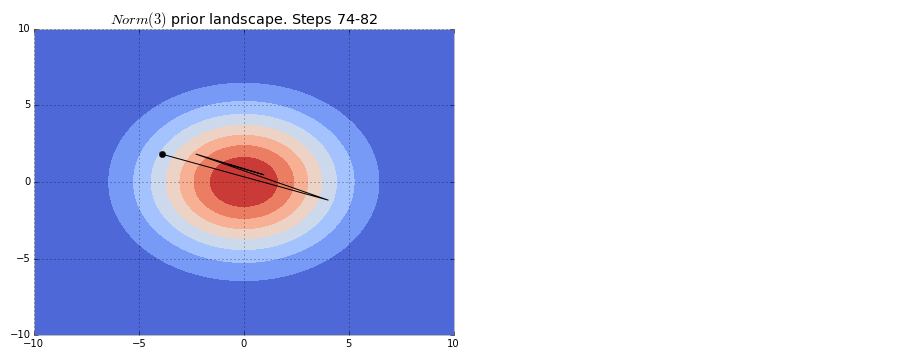
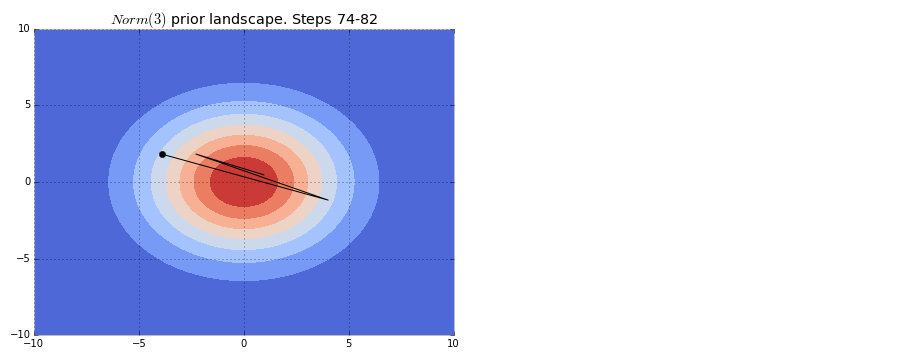
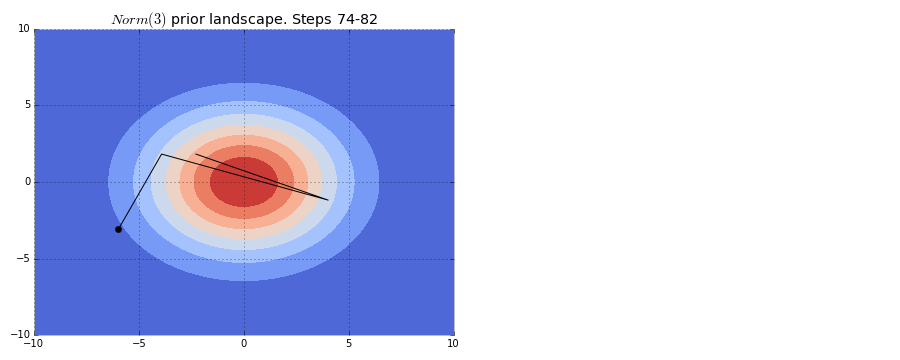
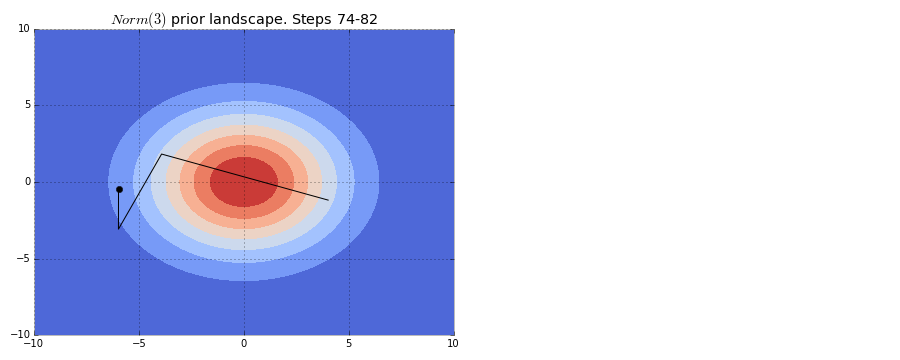
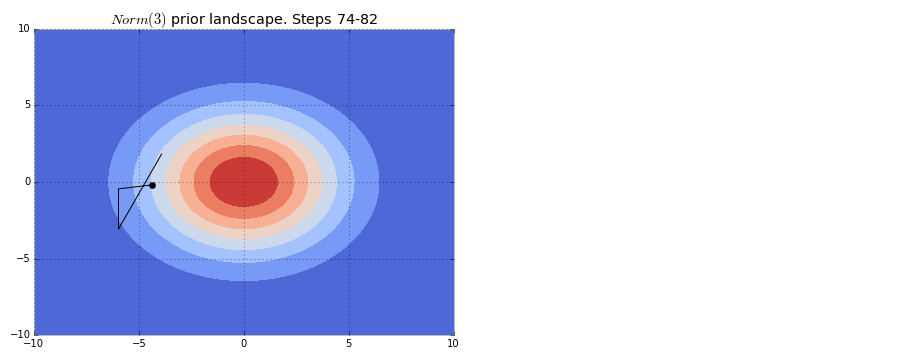
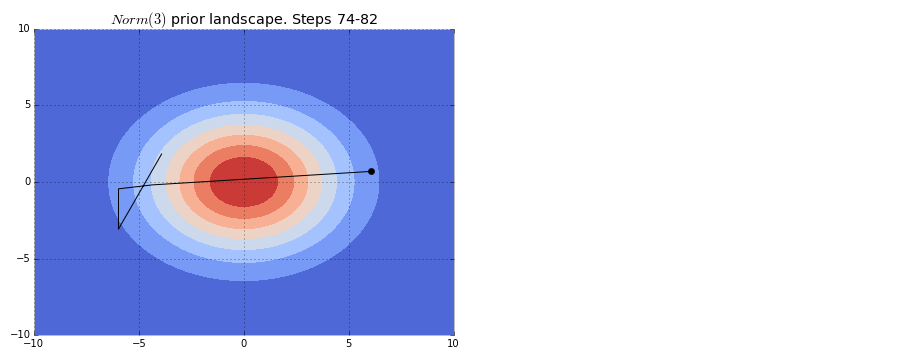
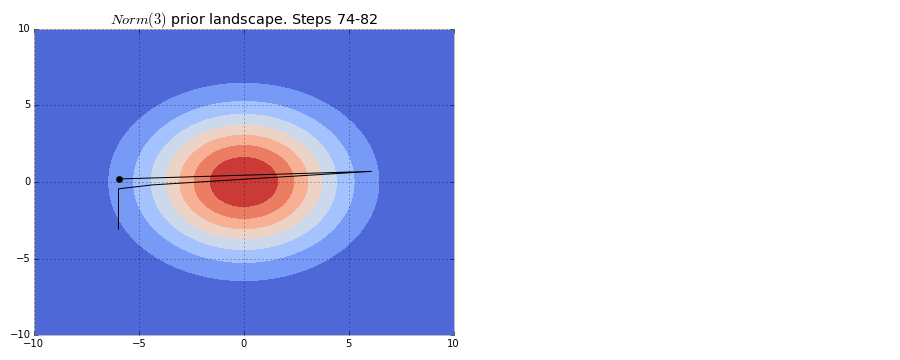
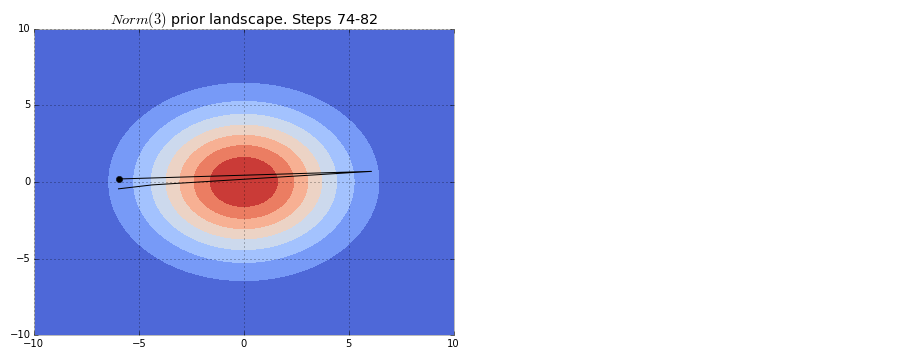
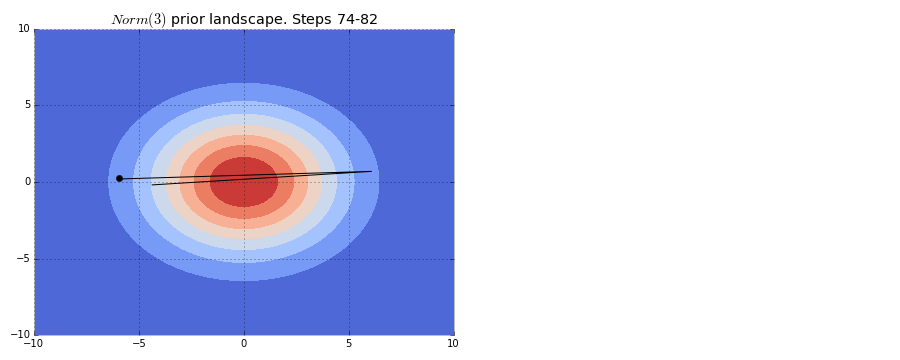
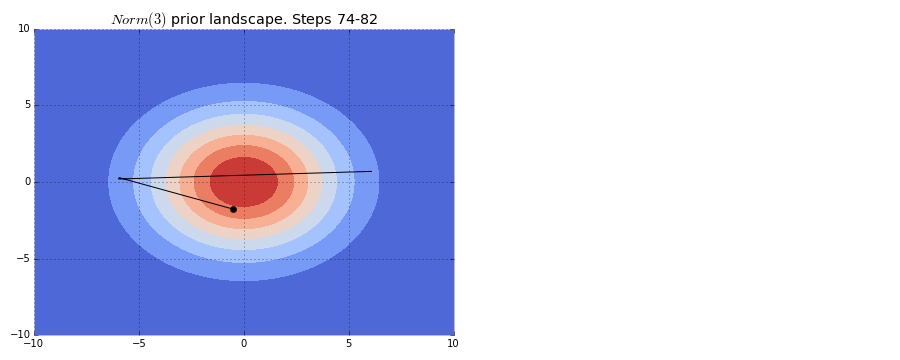
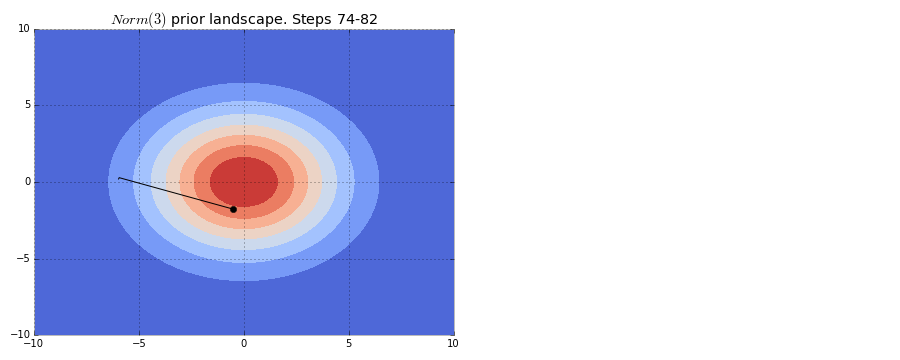
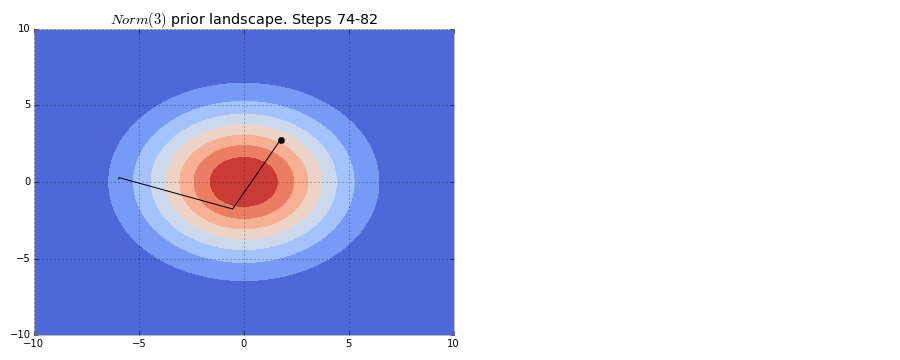
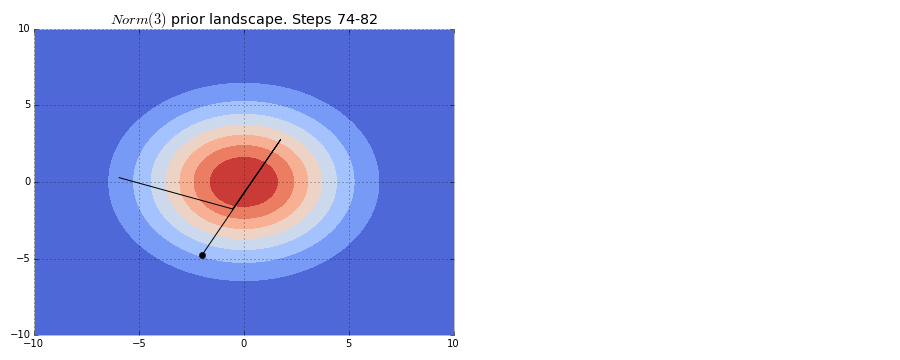
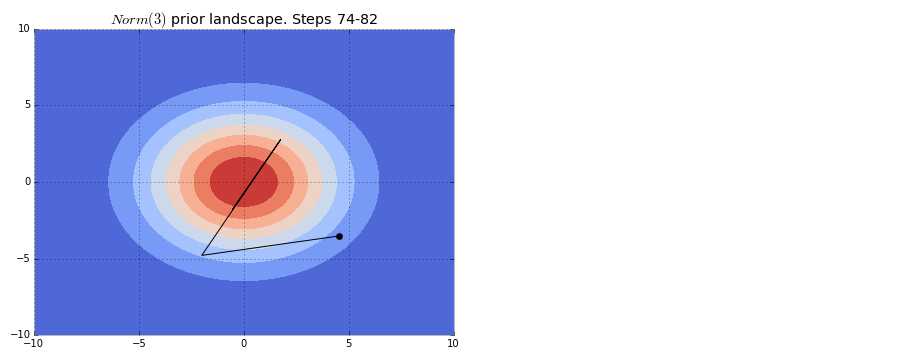
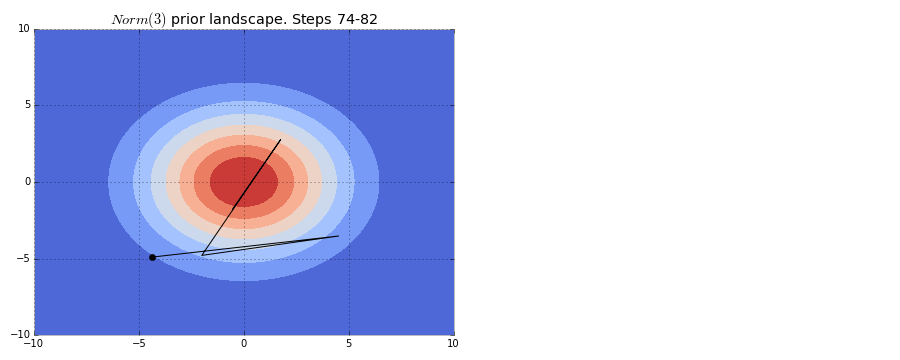
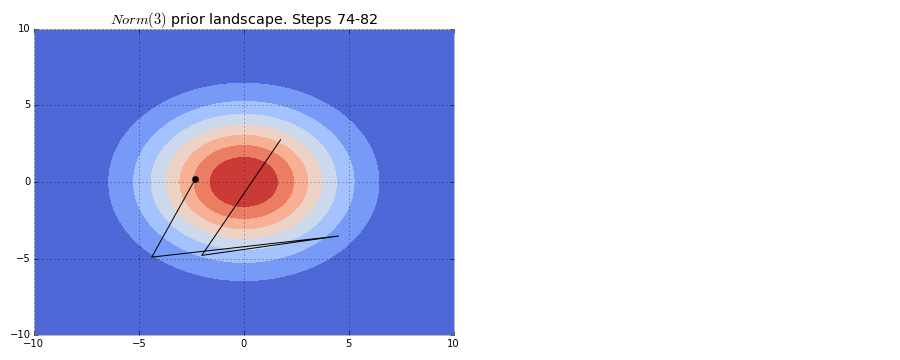
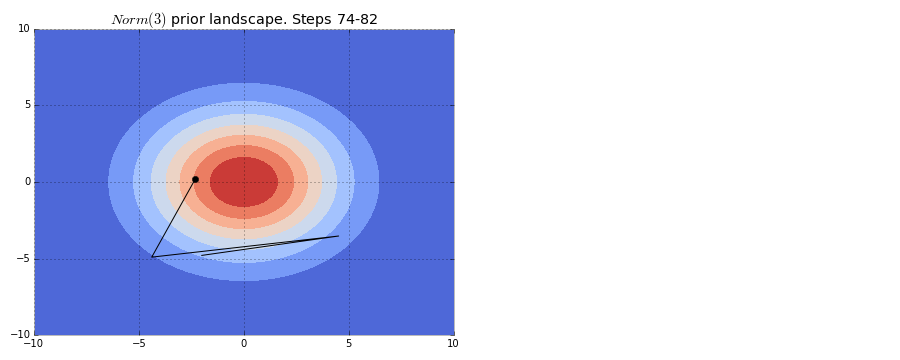
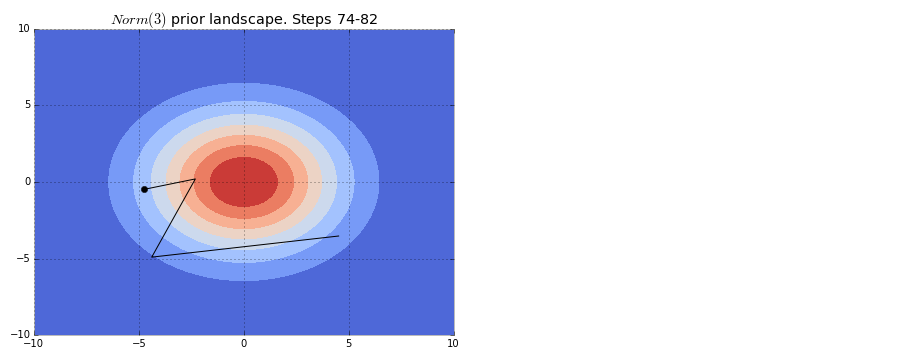
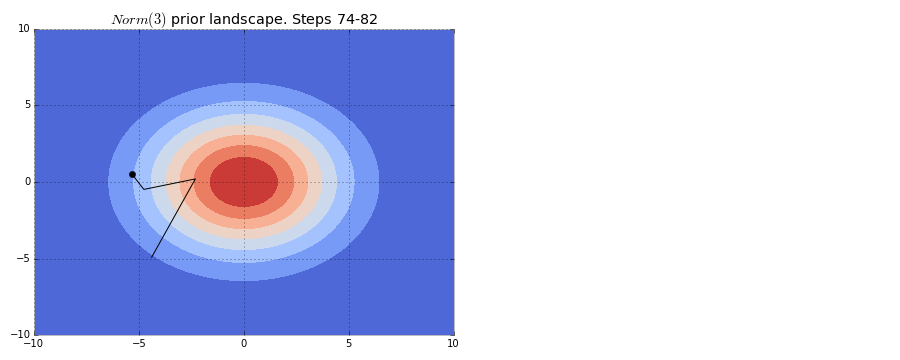
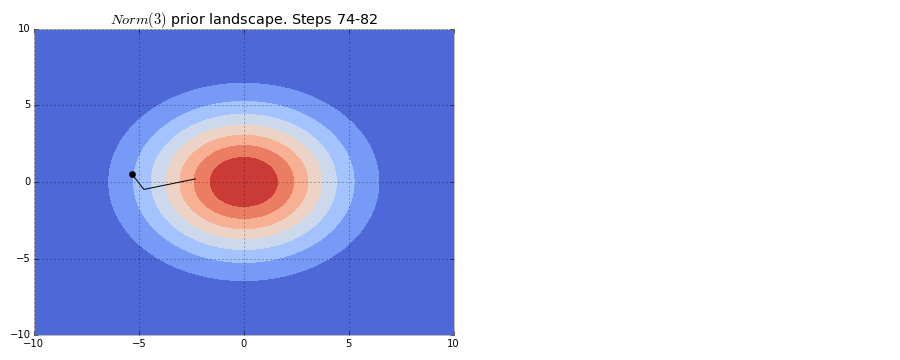
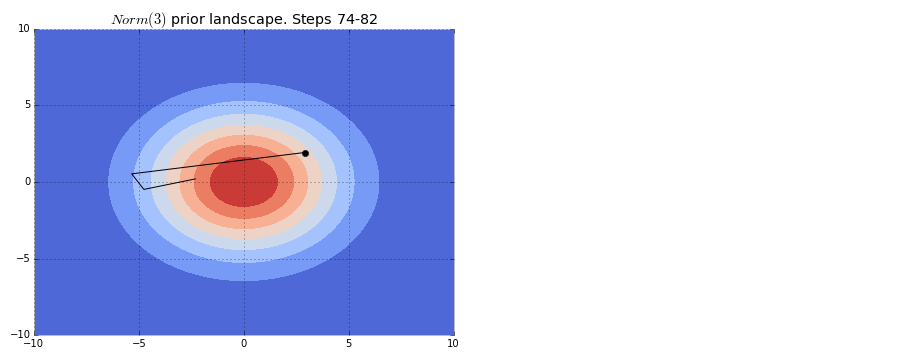
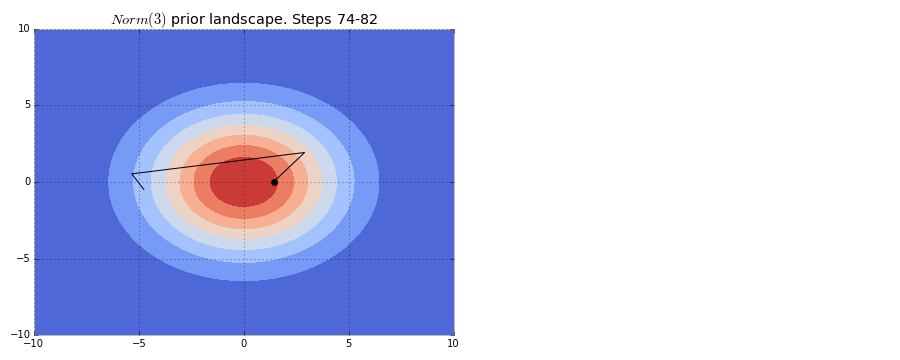
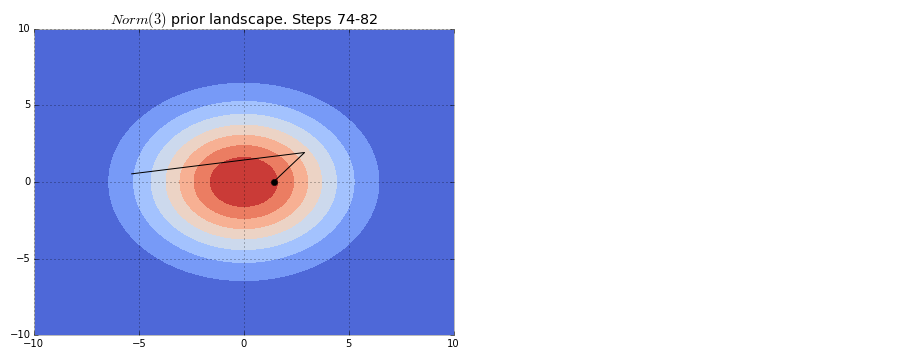
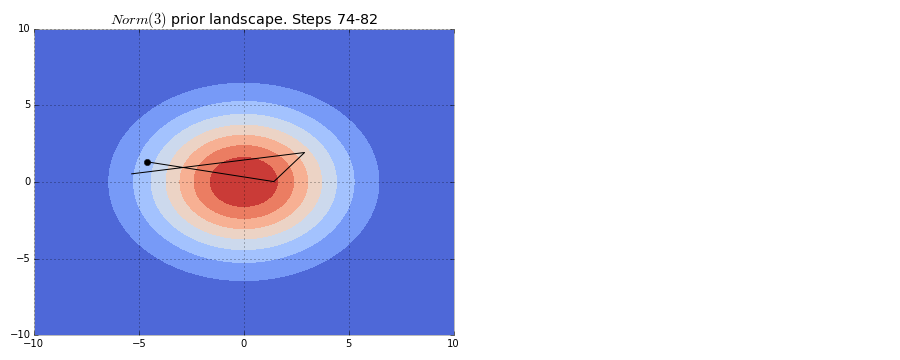
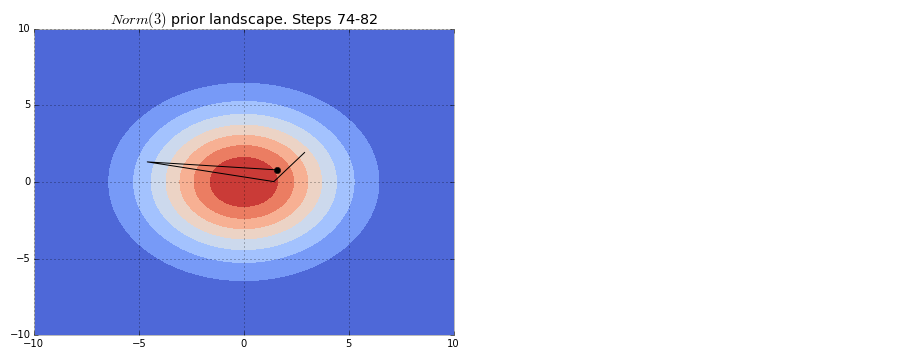
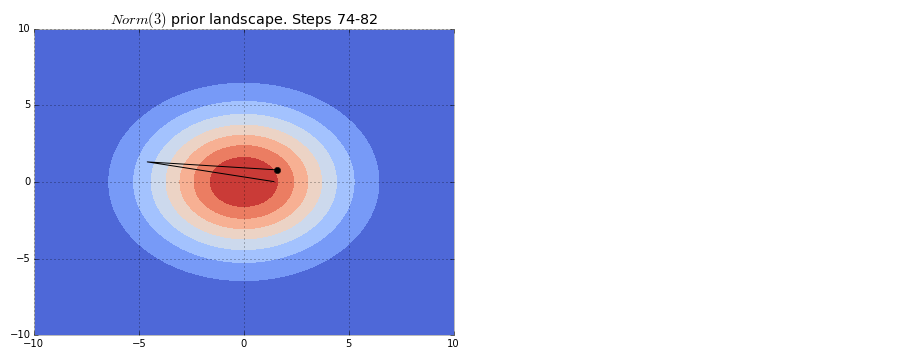
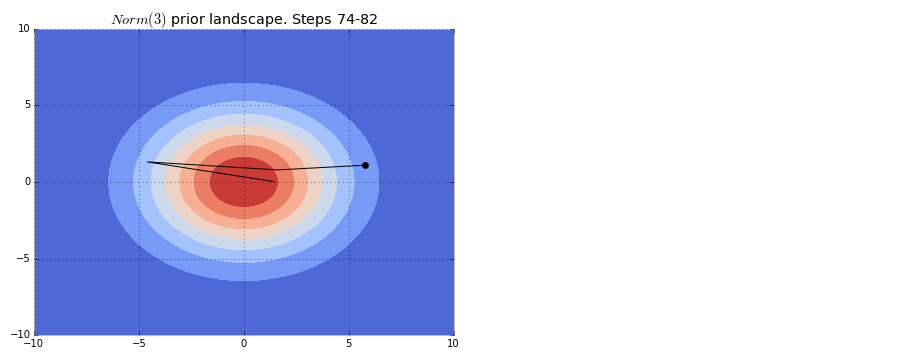
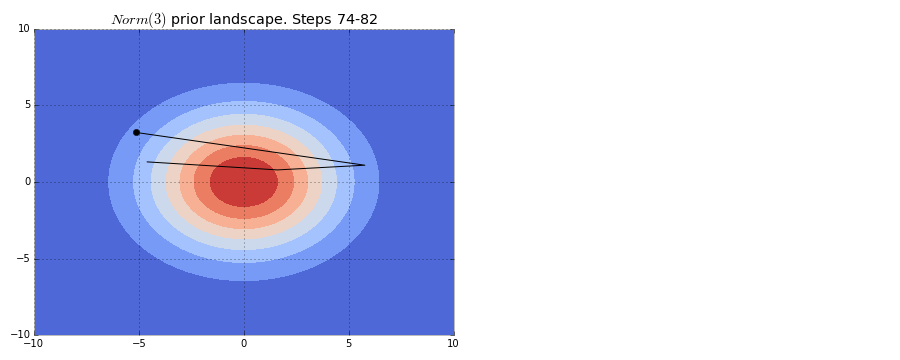
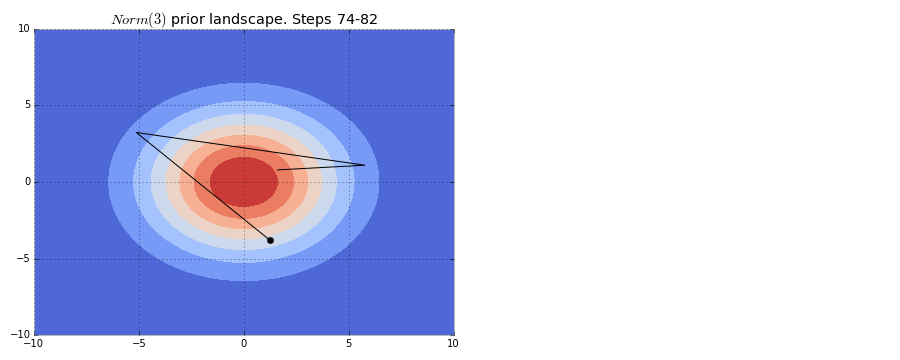
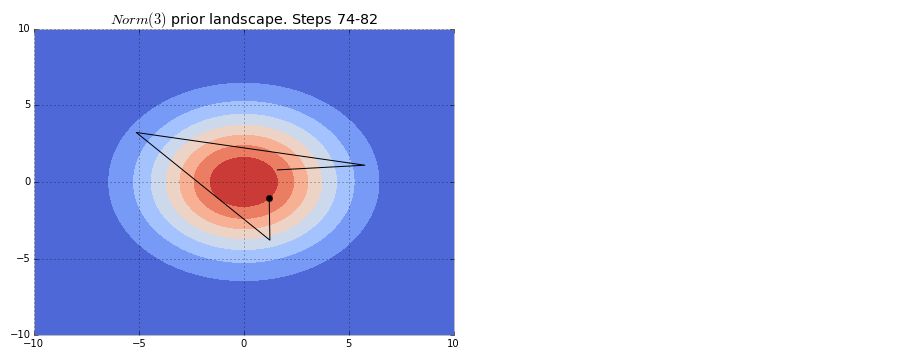
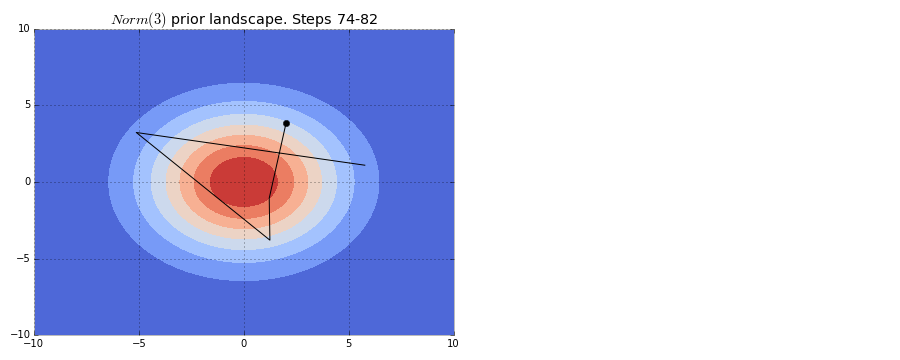
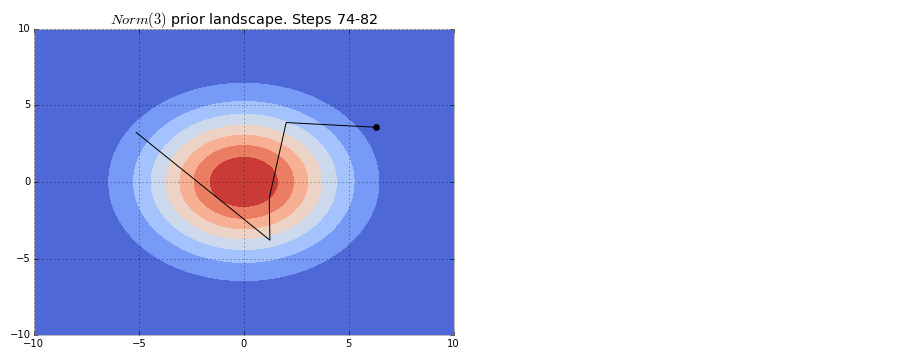
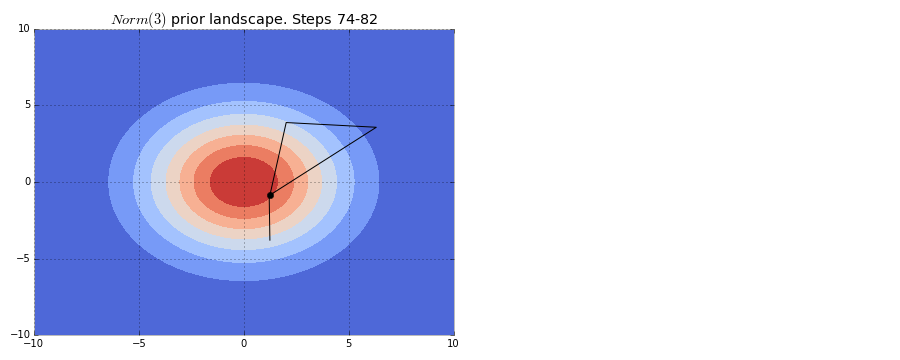
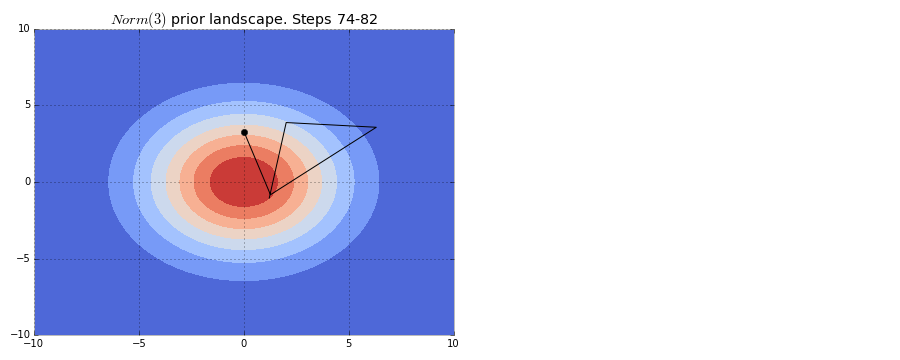
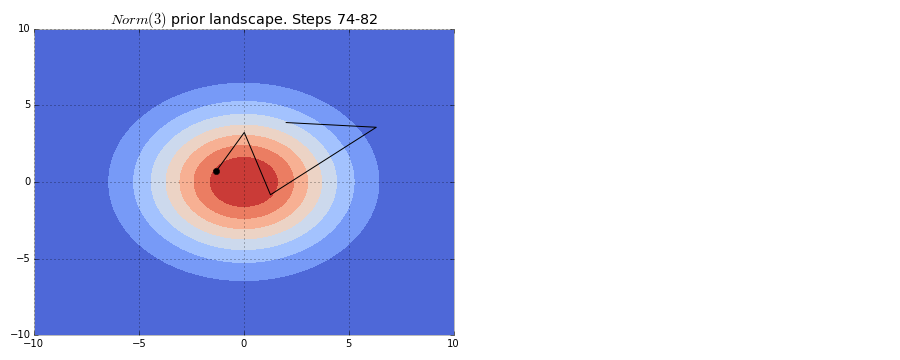
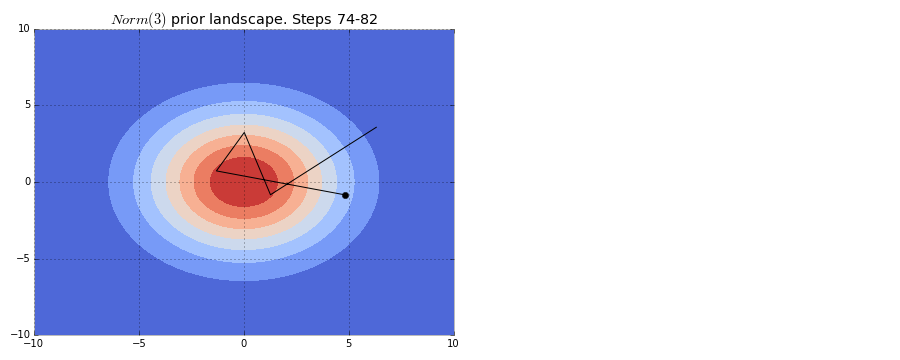
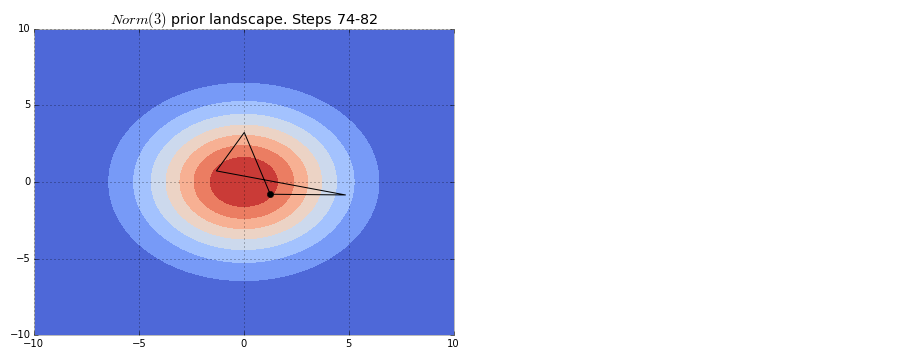
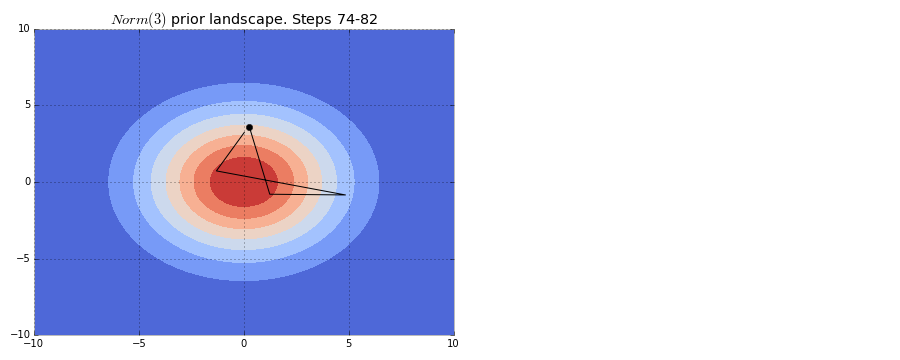
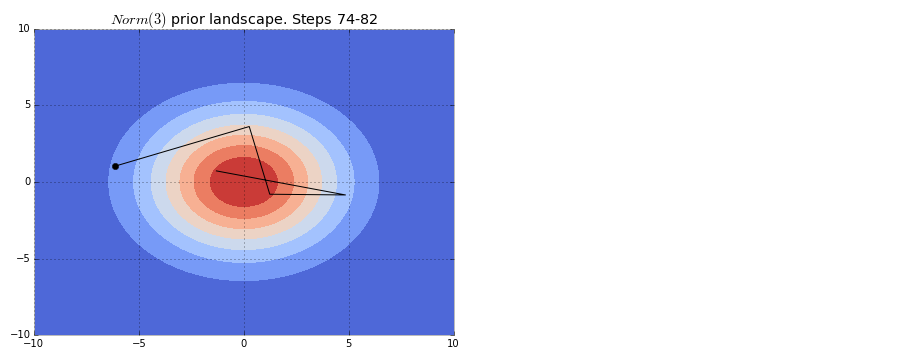
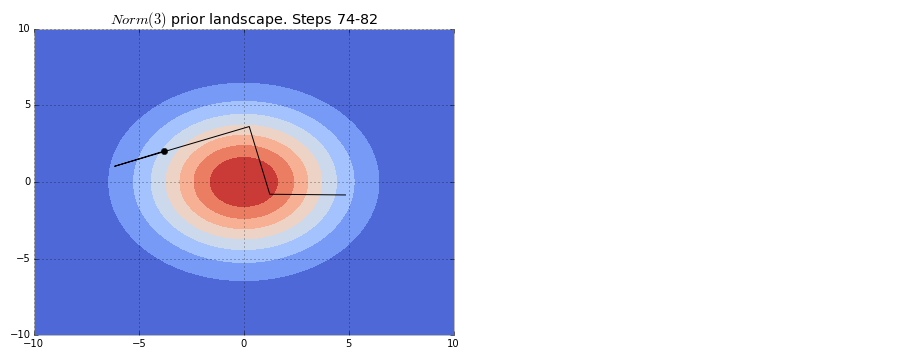
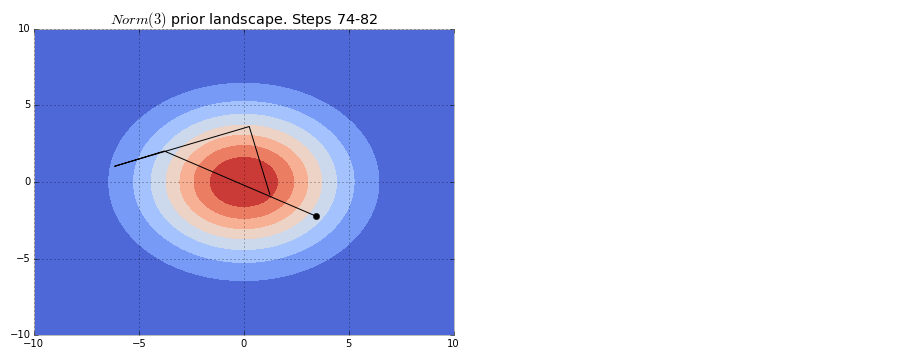
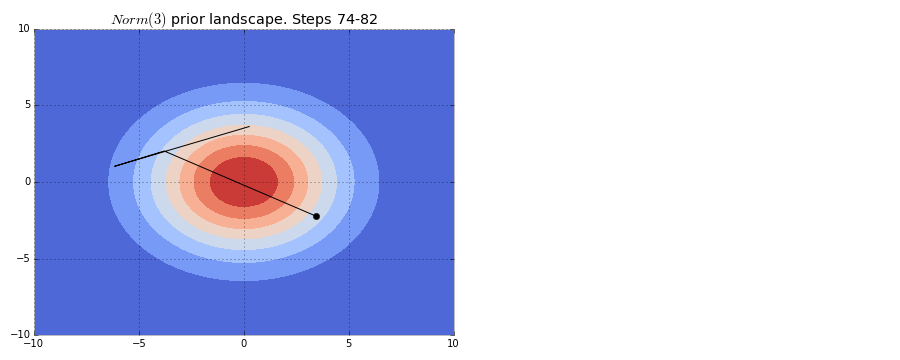
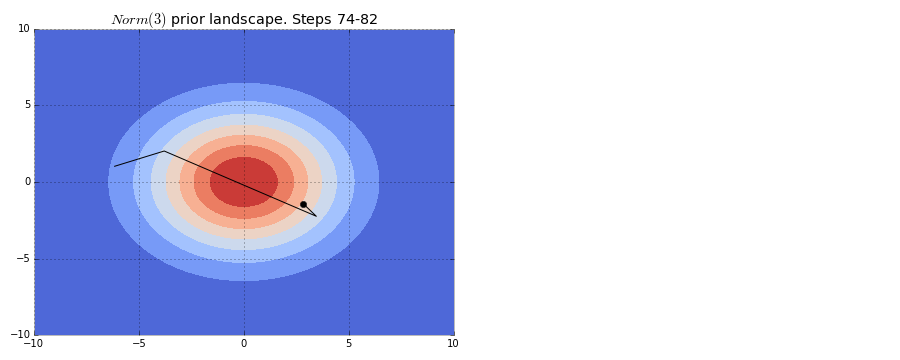

In [15]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from JSAnimation import IPython_display
from matplotlib import animation

figsize(12.5, 5)
fig = plt.figure()
ax = fig.add_subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)
exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])


ax.contourf(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
   

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("$Norm(3)$ prior landscape. Steps 74-82")


plt.tight_layout()



points, = ax.plot([], [], 'bo', ms=6, color = "k")
line, = ax.plot([], [], lw=1, color = "k")

def init():

    points.set_data([], [])
    line.set_data([], [])

    return points

def animate(i):

    points.set_data(trace["alpha"][i],trace["beta"][i])
    x = np.array([trace["alpha"][i], trace["alpha"][i-1], trace["alpha"][i-2], trace["alpha"][i-3],trace["alpha"][i-4]])
    y = np.array([trace["beta"][i], trace["beta"][i-1],trace["beta"][i-2], trace["beta"][i-3],trace["beta"][i-4]])
    
    line.set_data(x,y)

    return points, line


animation.FuncAnimation(fig, animate, init_func=init,
                        frames=100, interval=180, blit=True)


## Metropolis

In [20]:
with pm.Model() as model:




    alpha = pm.Normal("alpha", 0, 0.1)

    beta = pm.Normal("beta", 0, 0.1) # less uncertainty than before
#thickness_layer2 = pm.Normal("thickness_layer2", 100, 0.01)


    
    
        
    #gamma = pm.Deterministic("gamma", beta-thickness_layer2)


    step = pm.Metropolis() # instantiate sampler
    trace = pm.sample(200, step, njobs=1) # draw 500 posterior samplers
#    step = pm.NUTS()
#    trace = pm.sample(50, step)

 [-----------------100%-----------------] 200 of 200 complete in 0.1 sec

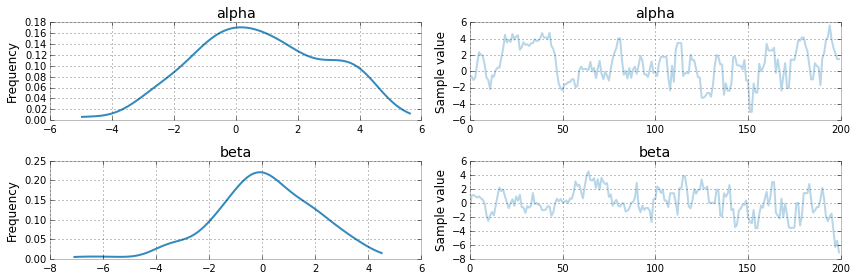

In [21]:
# This is wrong
%matplotlib inline


pm.traceplot(trace);


###Points distribution

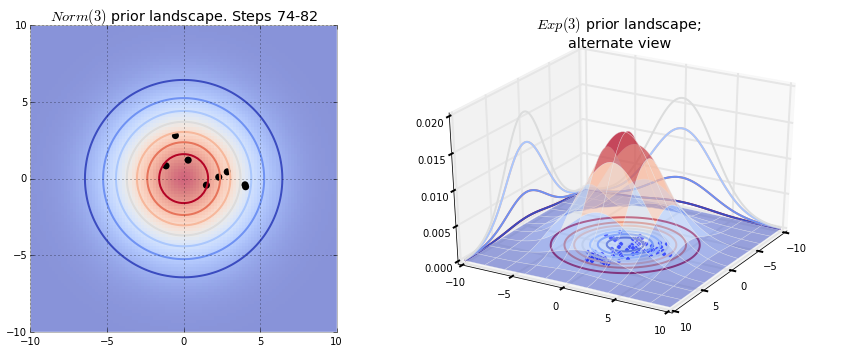

In [22]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)

#print exp_x[:, None]

exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
im = plt.imshow(M, interpolation='none', origin='lower', alpha=0.6,
                 cmap=cm.coolwarm, extent=(-10, 10, -10, 10))
plt.xlim(-10,10)
plt.ylim(-10,10)
for i in range(74,82):
    plt.scatter(trace["alpha"][i], trace["beta"][i], c="k", s=50, edgecolor="none")
    #plt.scatter(alpha.trace[51], beta.trace[51], c="k", s=50, edgecolor="none")
#plt.xlabel("prior on $p_1$")
#plt.ylabel("prior on $p_2$")
plt.title("$Norm(3)$ prior landscape. Steps 74-82")

#plt.subplot(222)
#plt.plot(exp_x)
plt.tight_layout()

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M,  cmap=cm.coolwarm, alpha=0.5)
ax.view_init(azim=390)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 0.02])

for i in range(80):
    ax.scatter(trace["alpha"][i], trace["beta"][i])
plt.title("$Exp(3)$ prior landscape; \nalternate view")


cset = ax.contour(X, Y, M, zdir='z', offset=0, cmap=cm.coolwarm_r)
cset = ax.contour(X, Y, M, zdir='x', offset=-10, cmap=cm.coolwarm_r)
cset = ax.contour(X, Y, M, zdir='y', offset=-10, cmap=cm.coolwarm_r)

### Searching algorithm


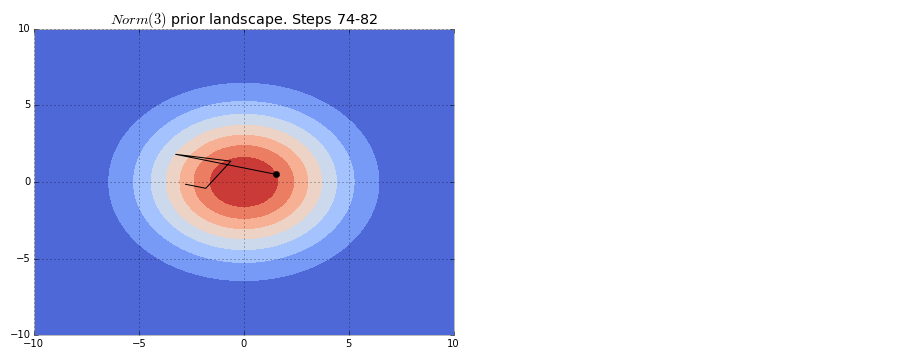
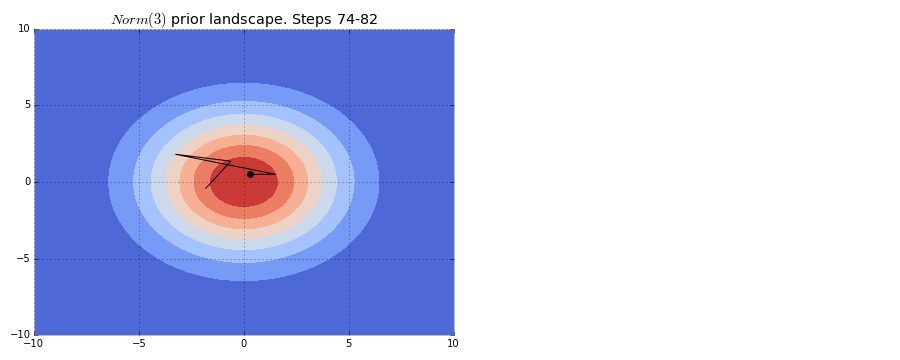
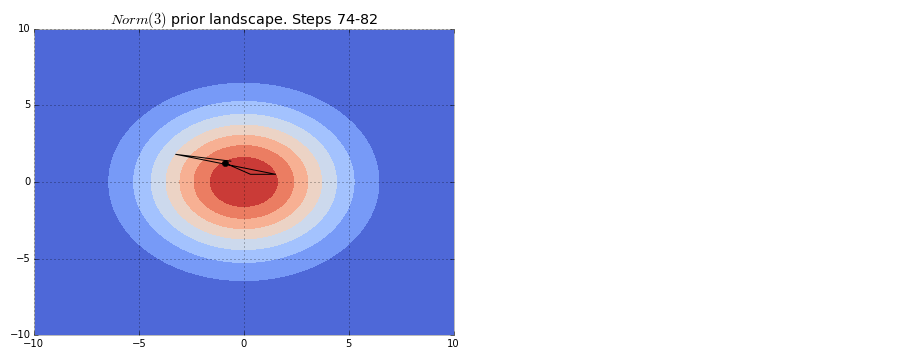
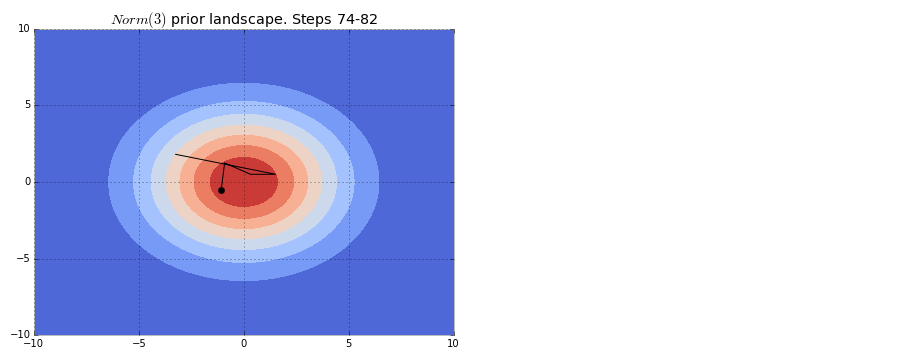
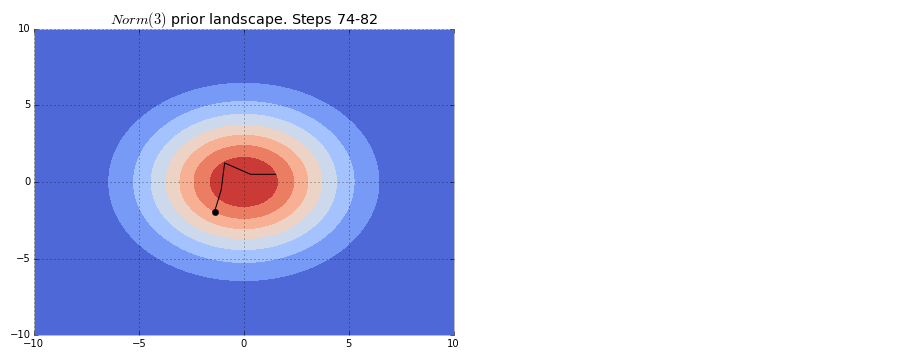
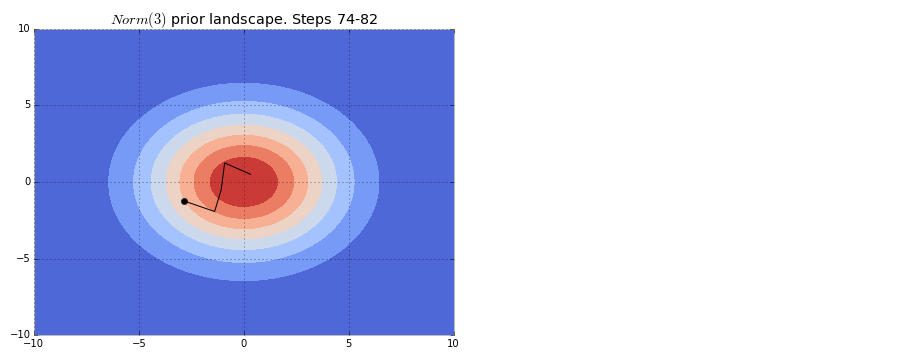
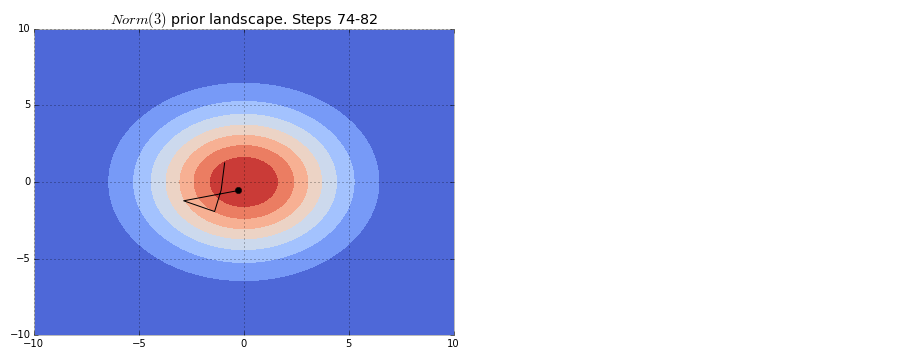
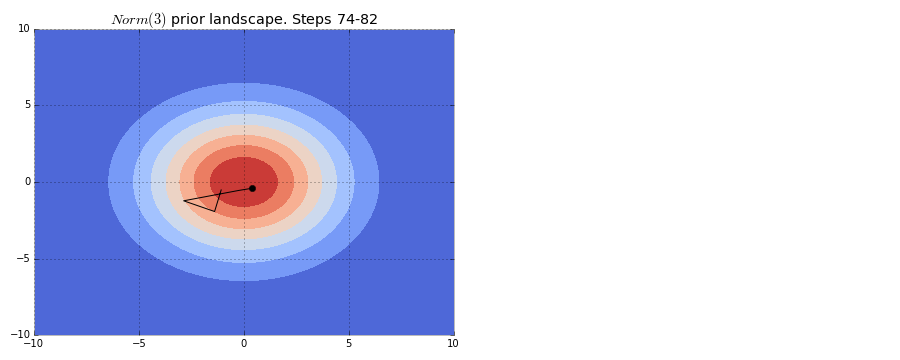
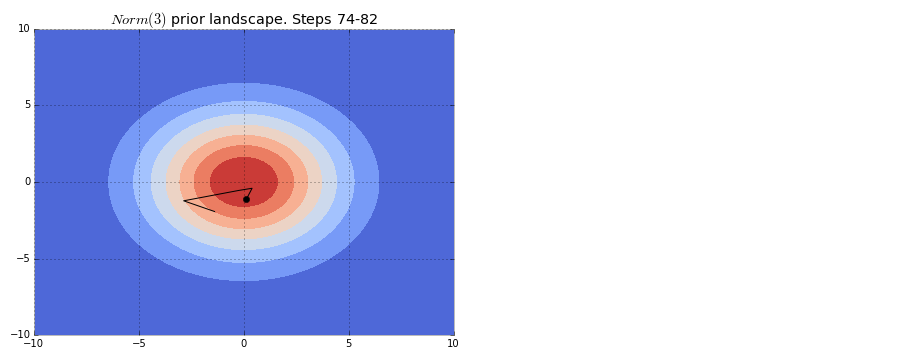
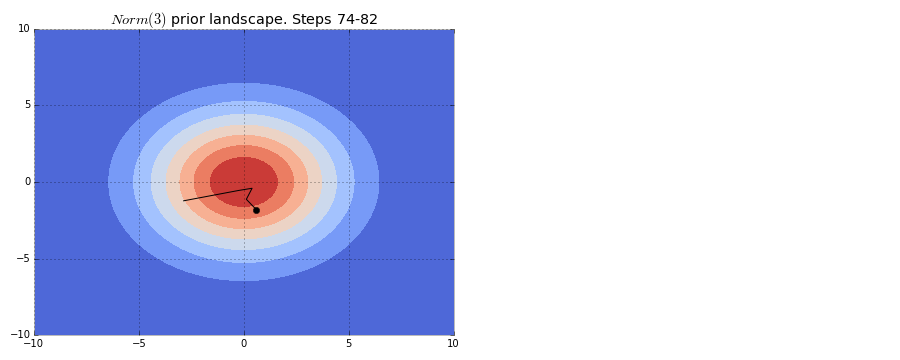
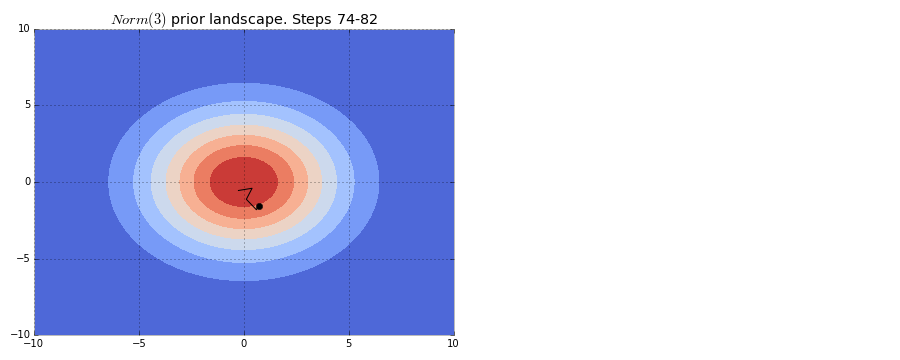
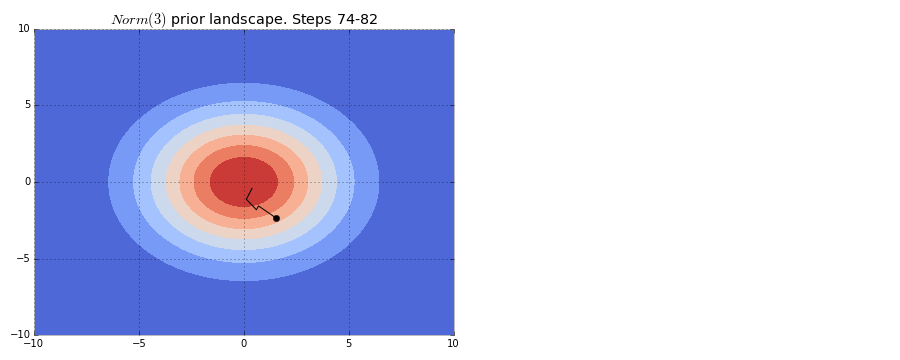
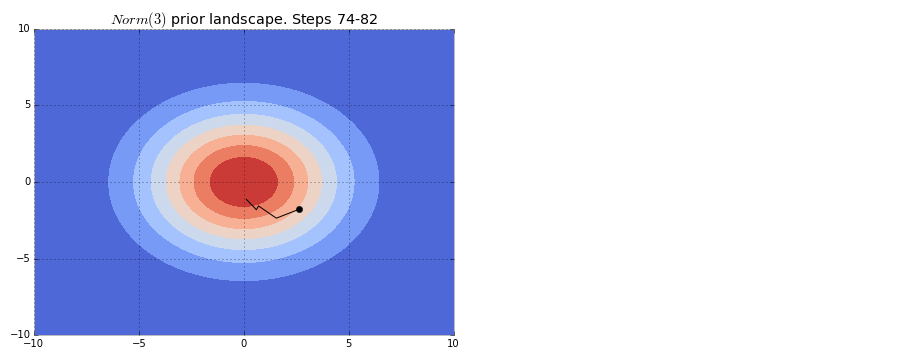
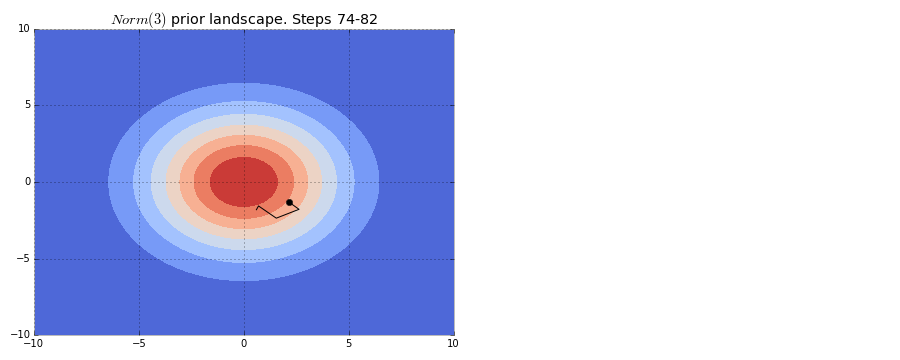
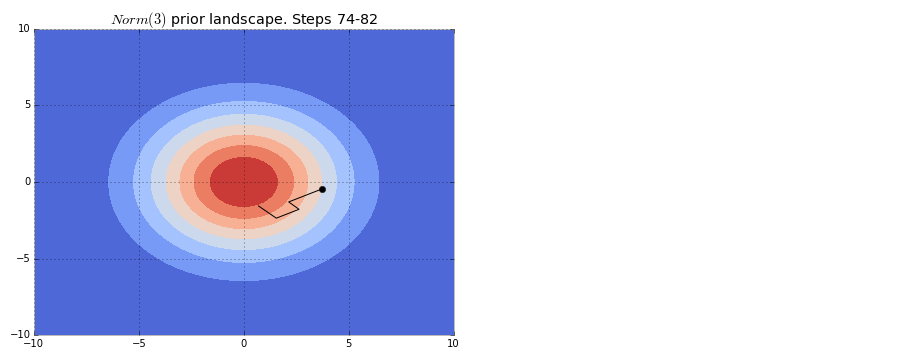
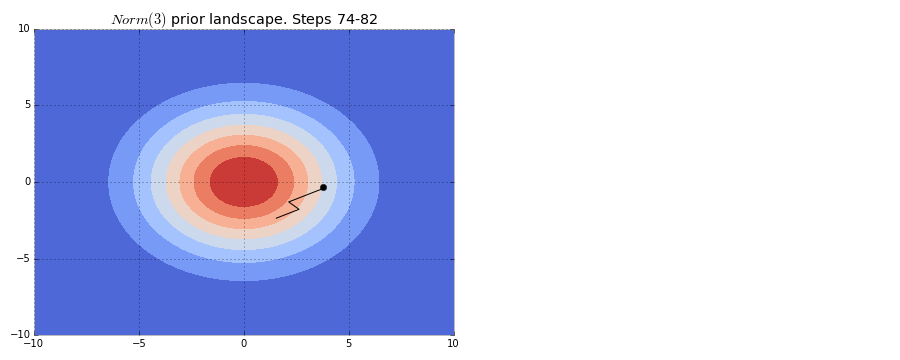
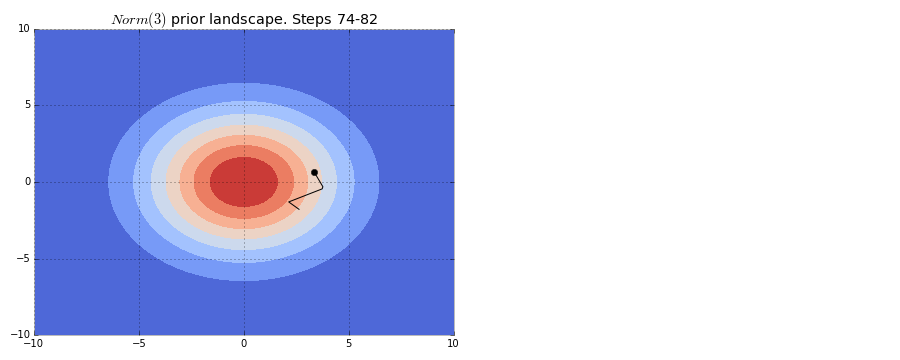
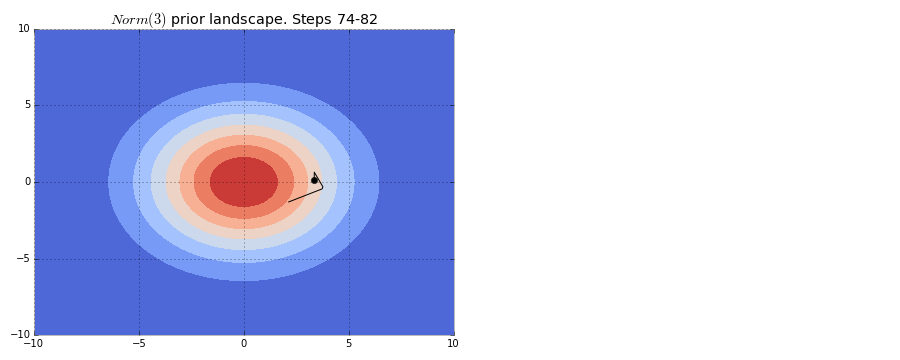
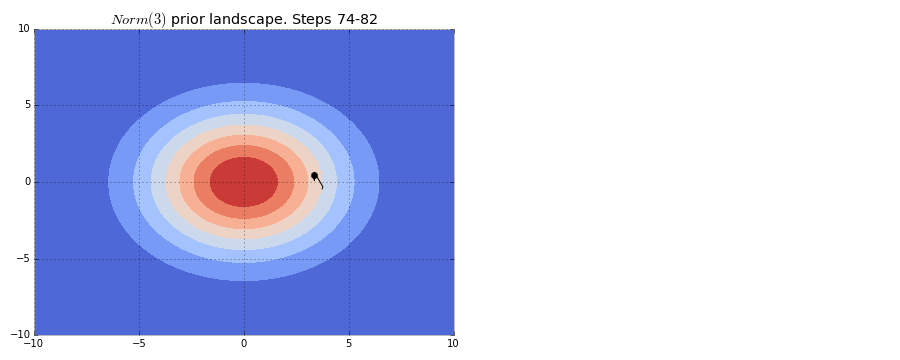
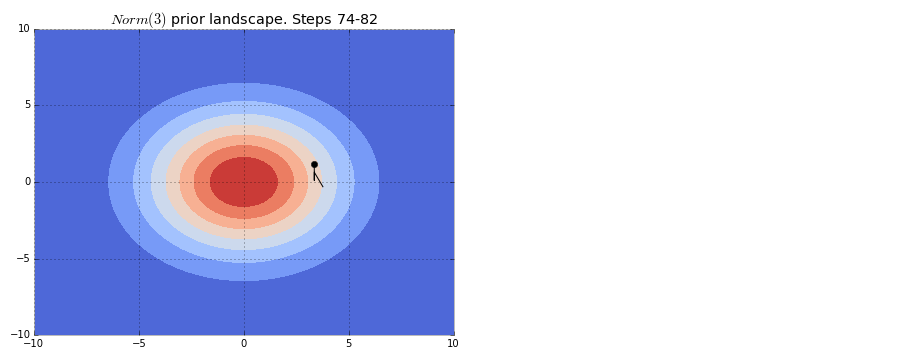
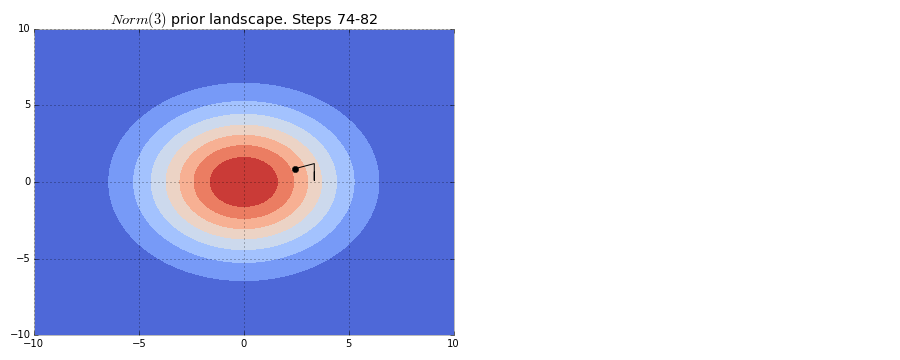
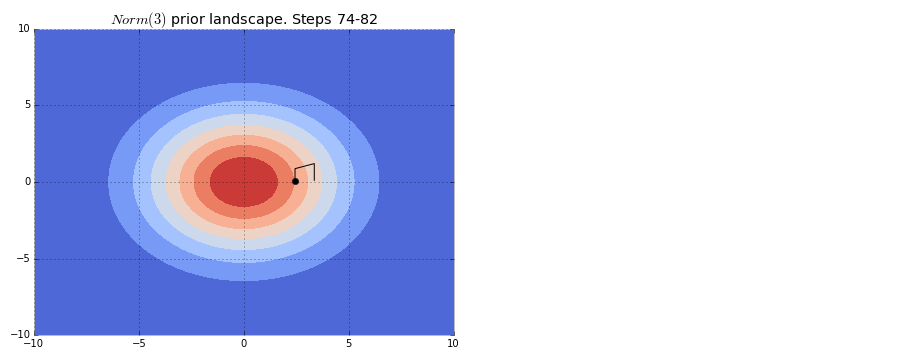
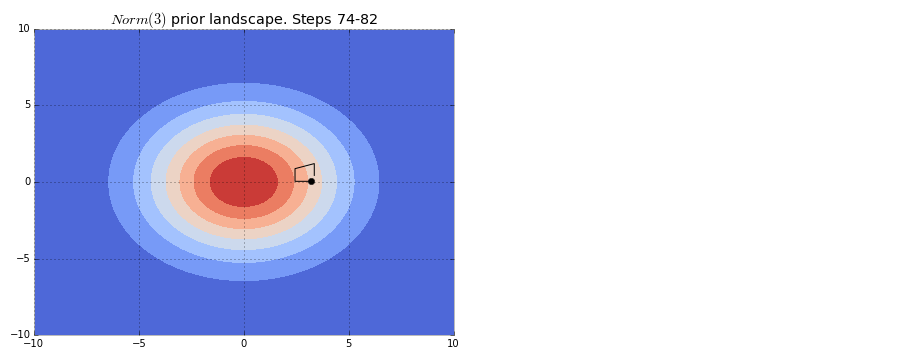
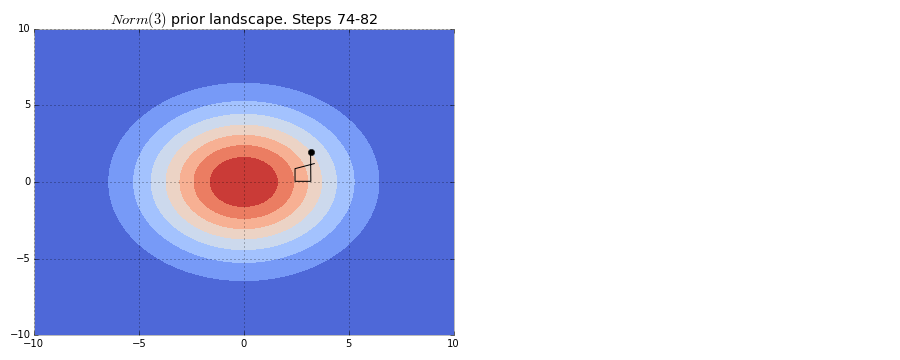
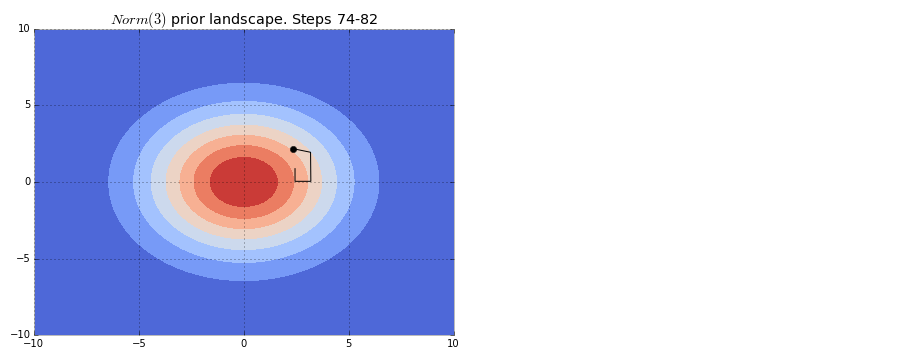
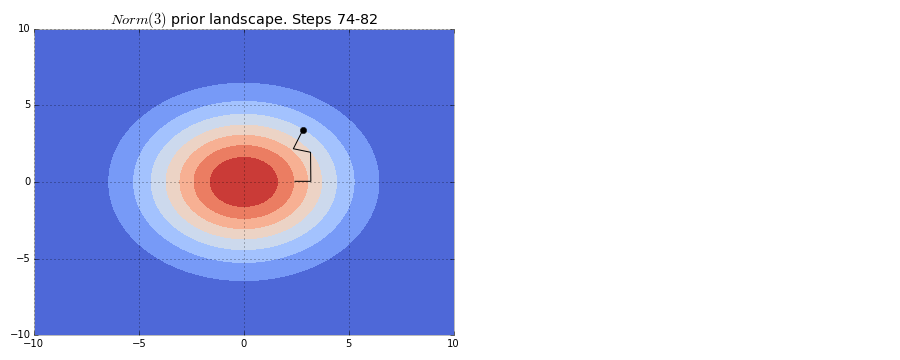
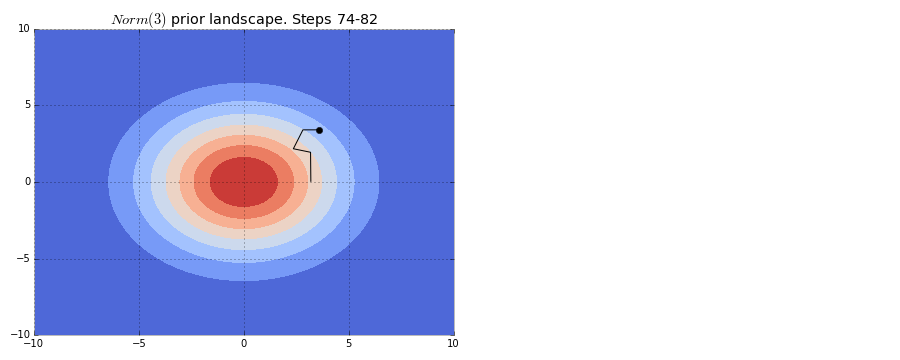
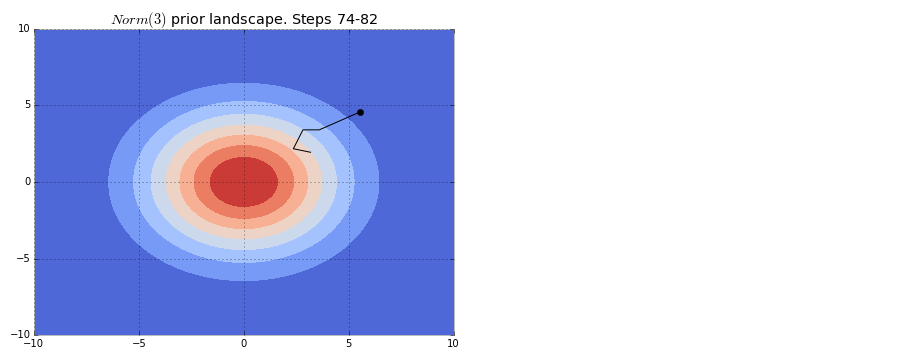
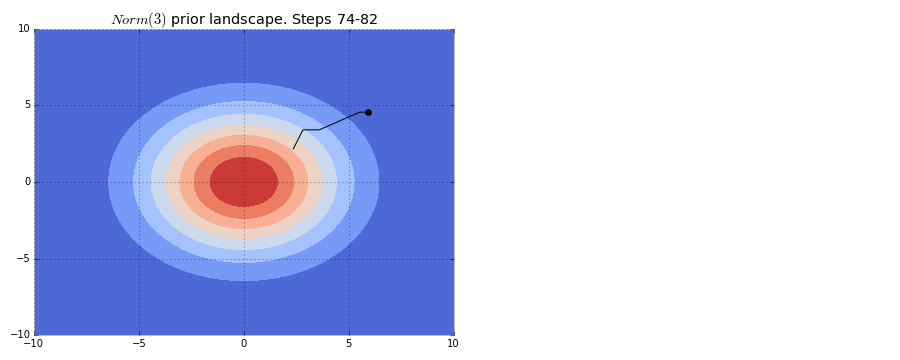
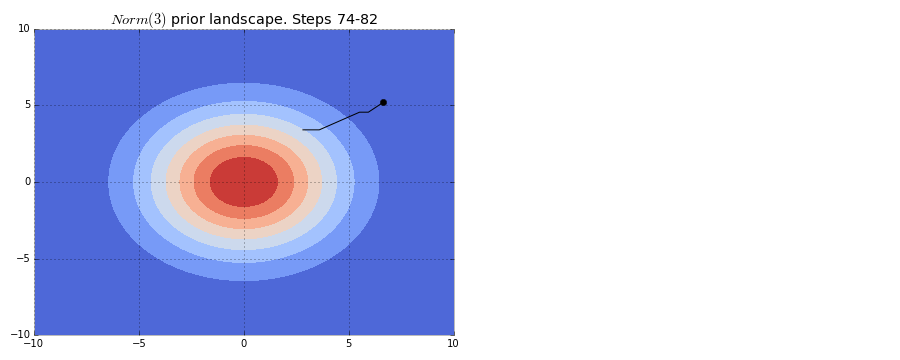
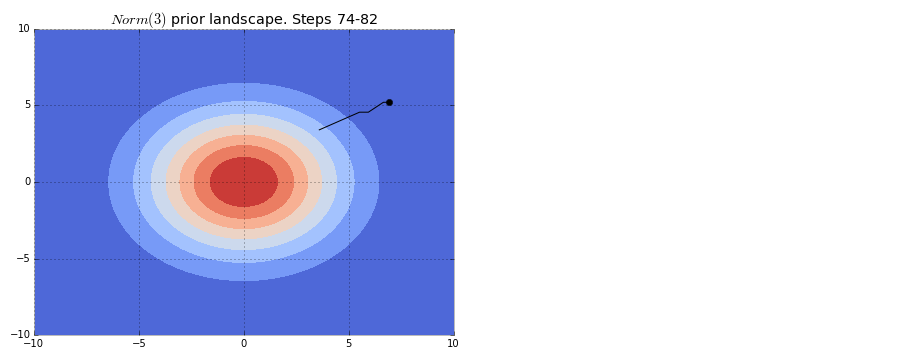
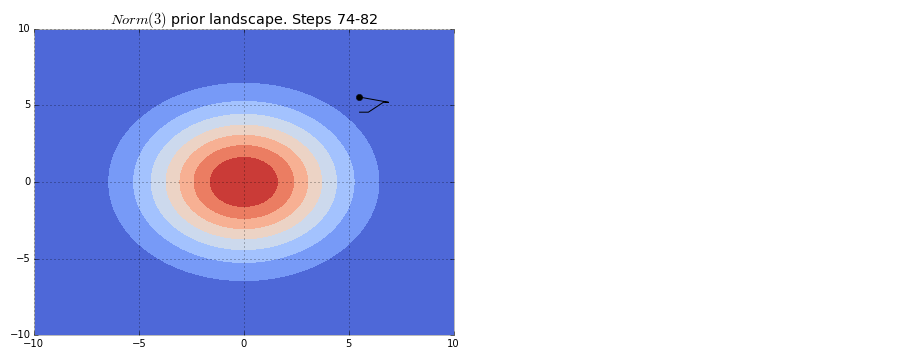
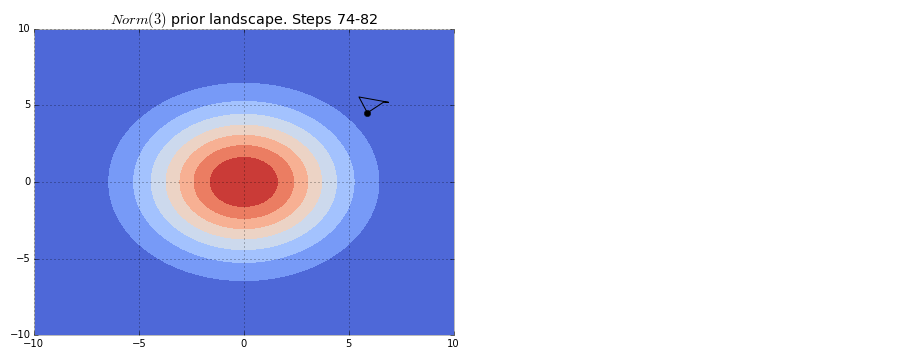
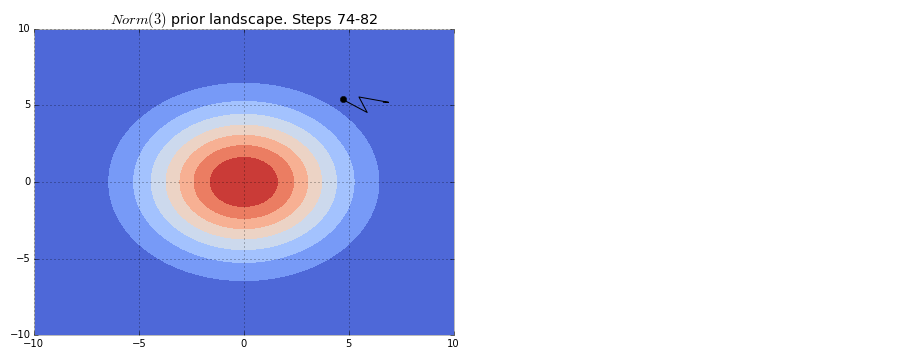
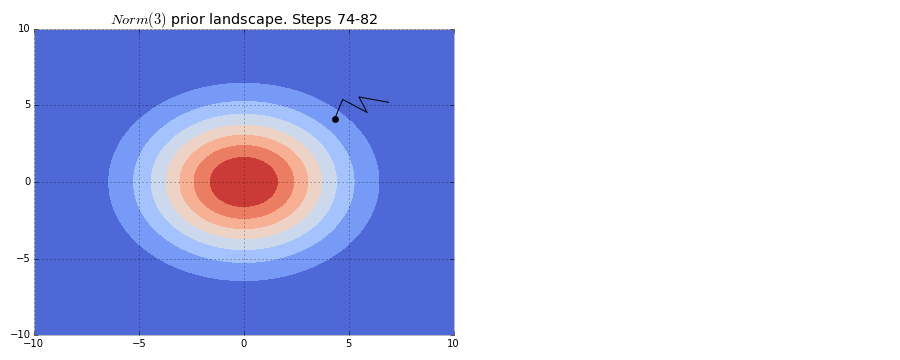
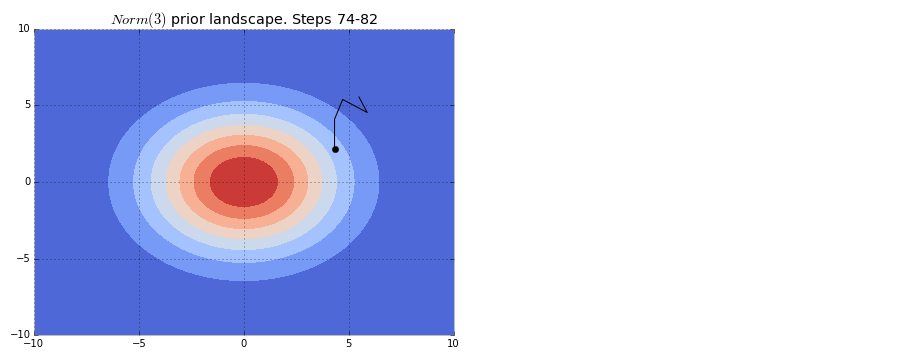
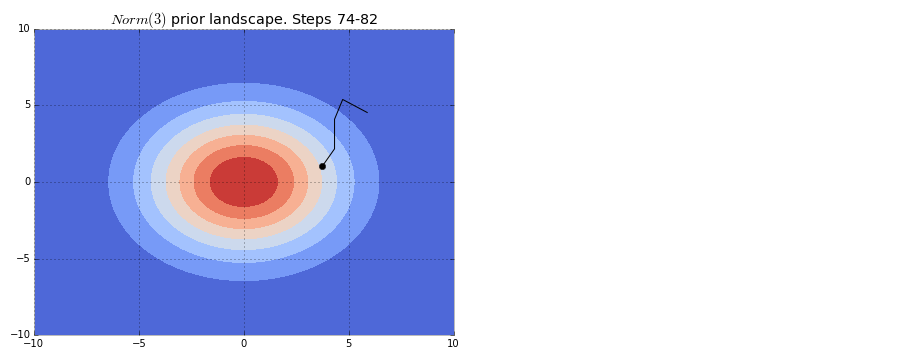
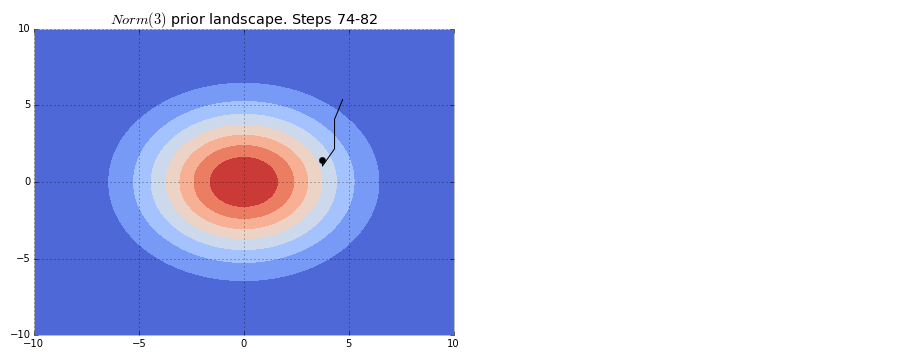
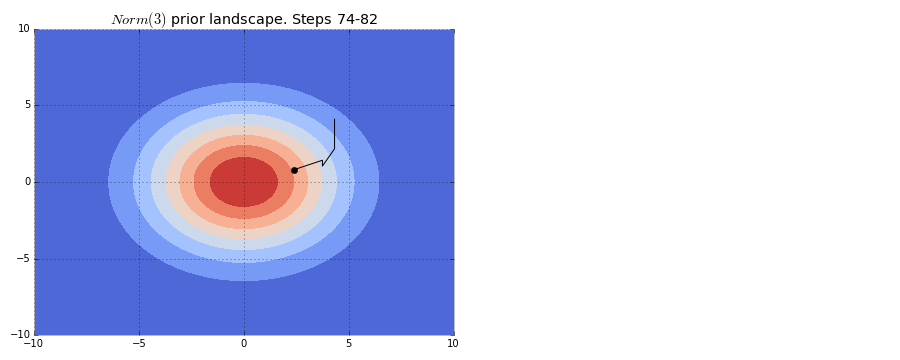
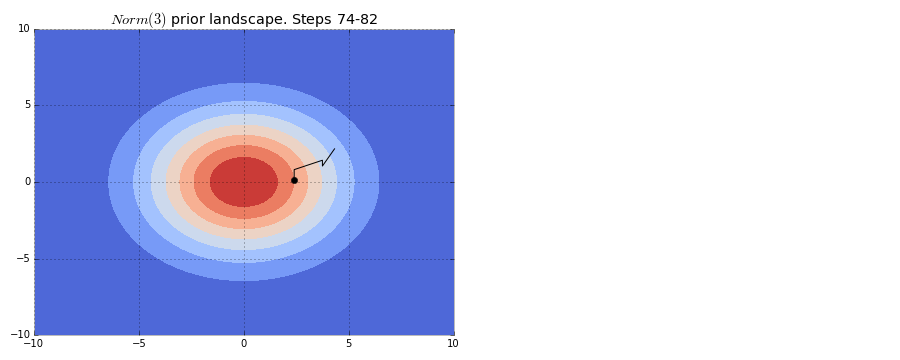
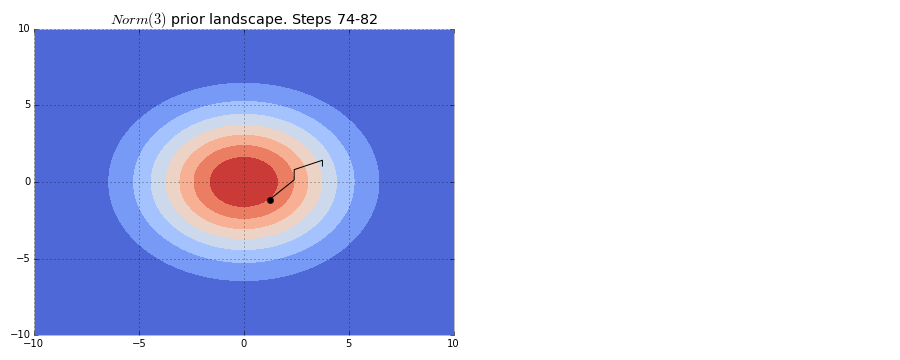
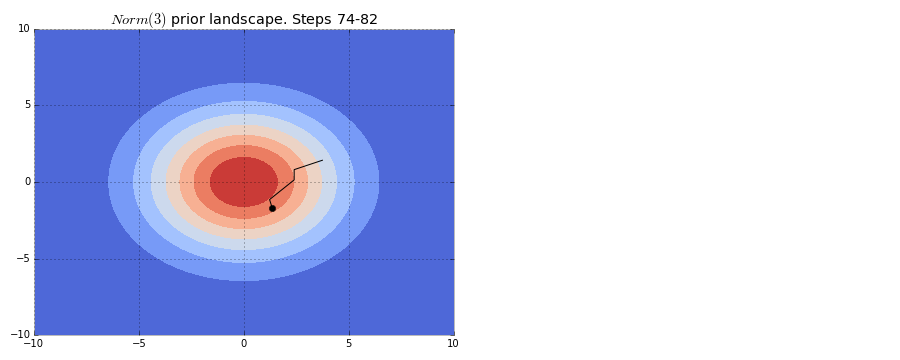
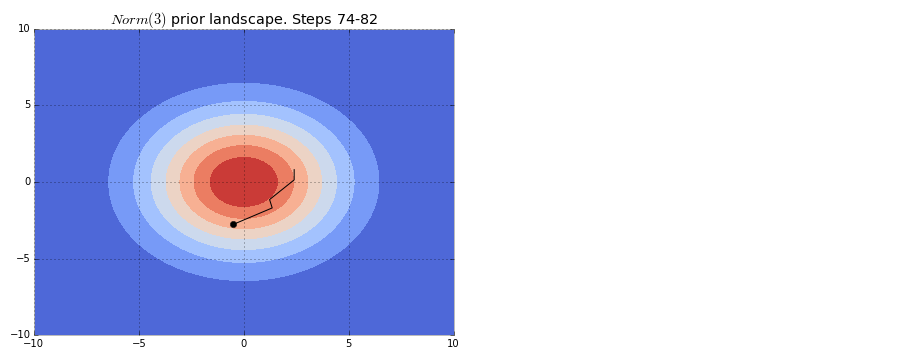
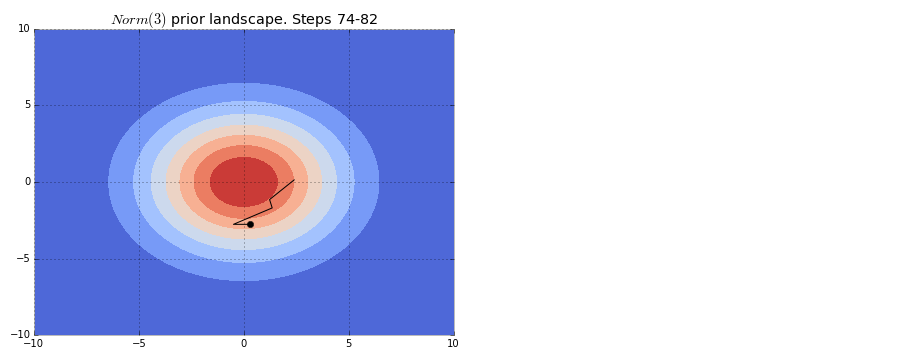
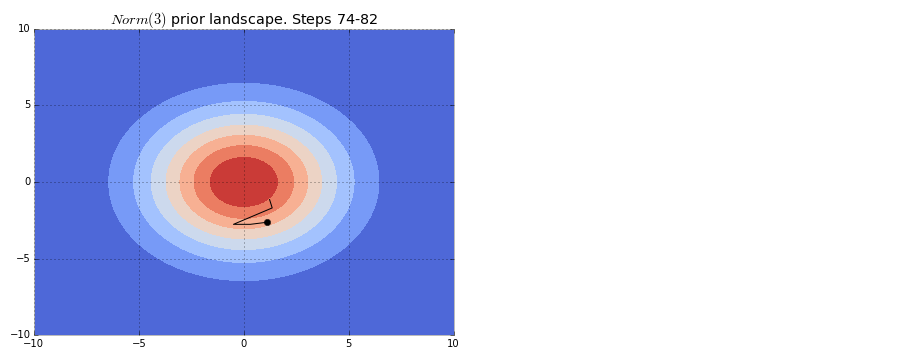
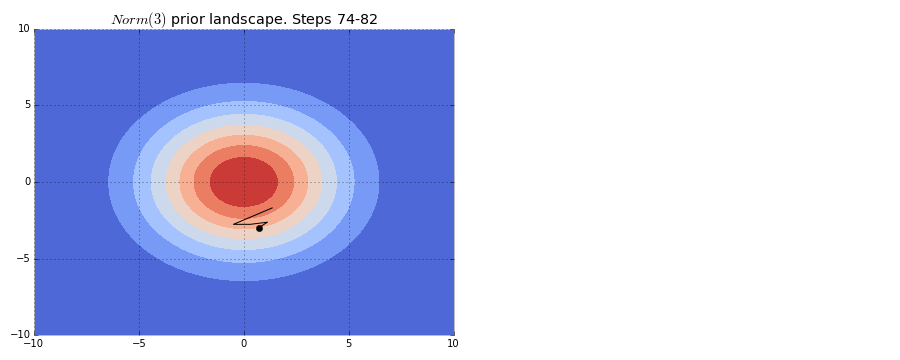
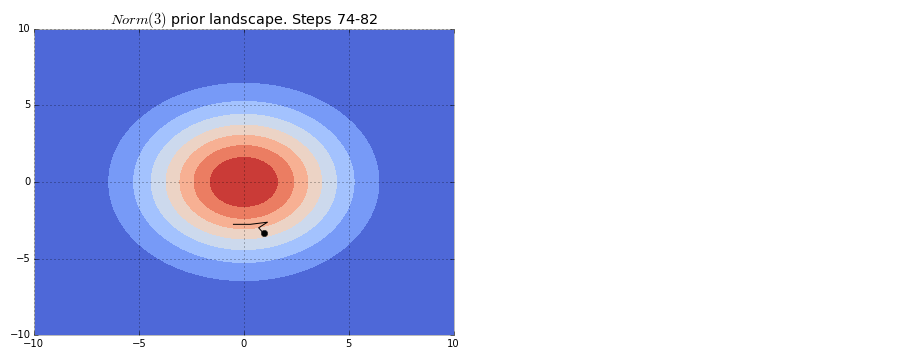
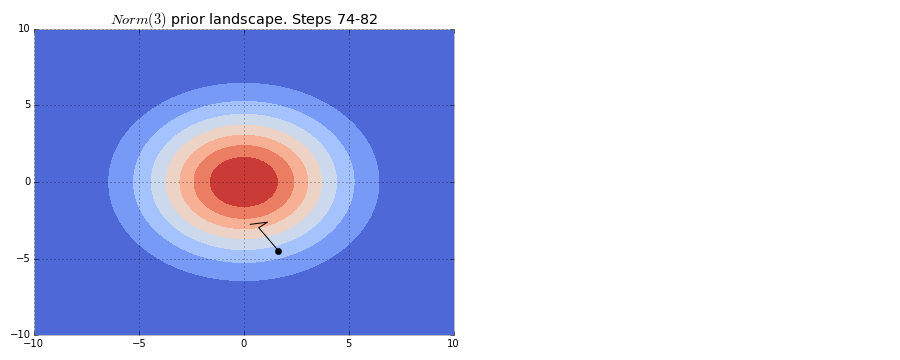
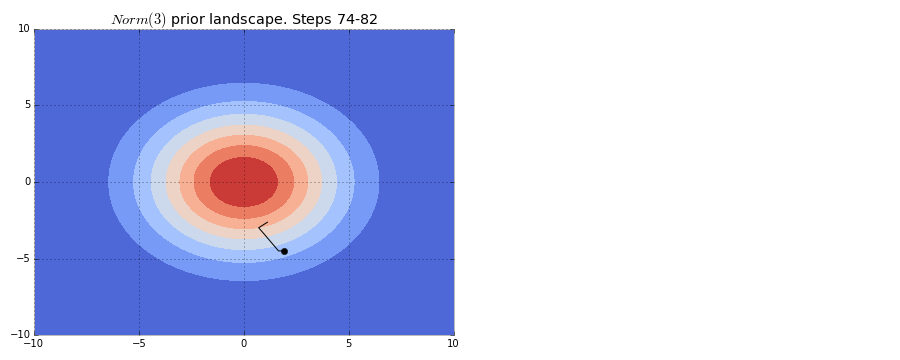
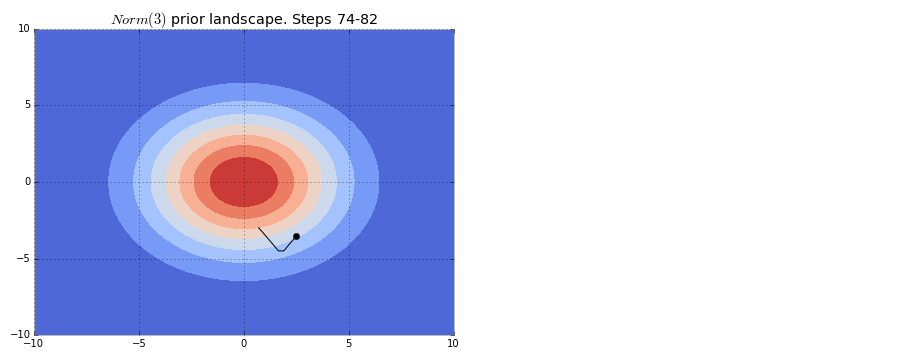
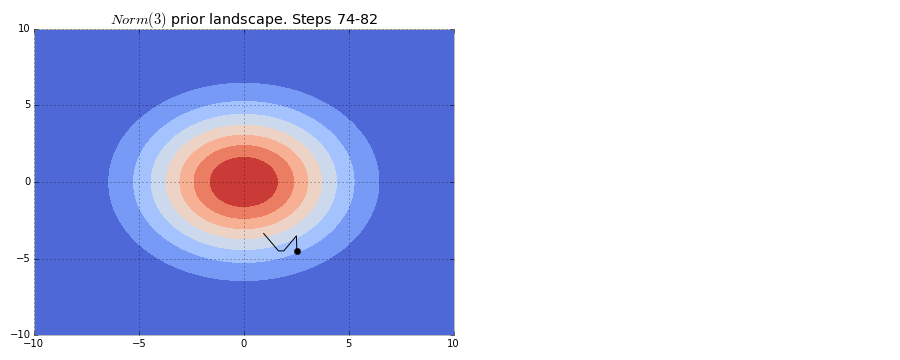
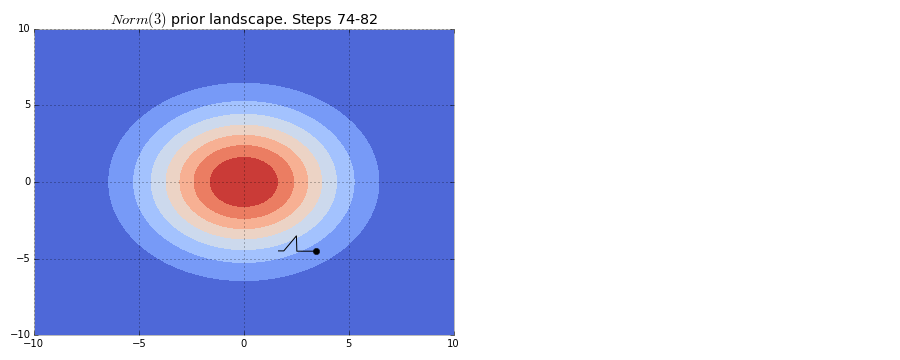
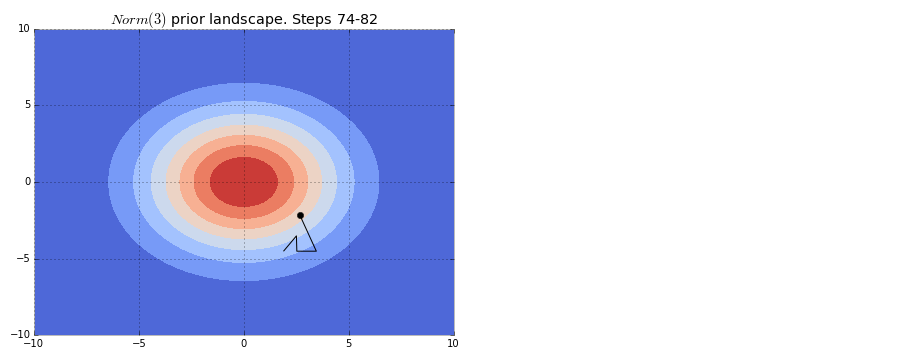
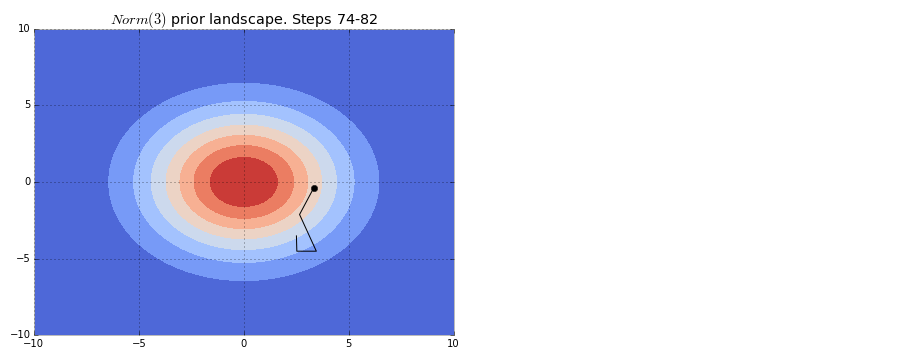
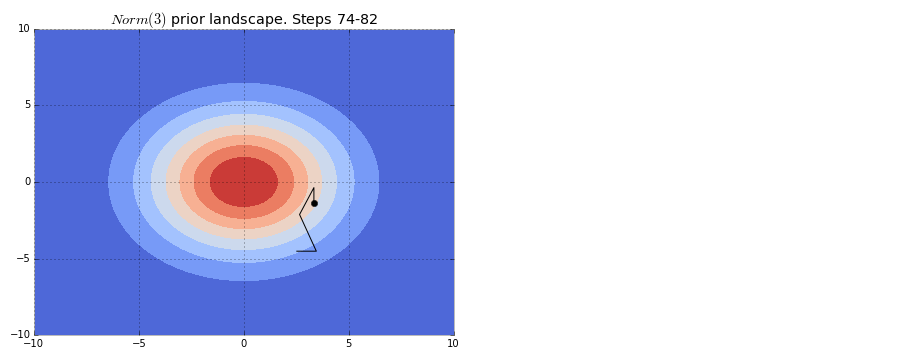
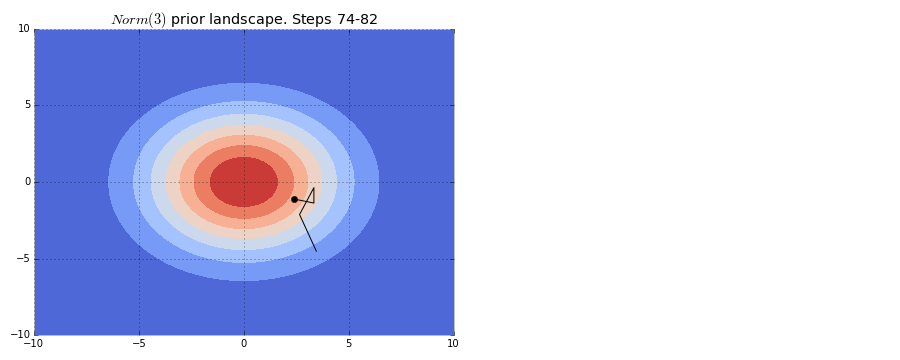
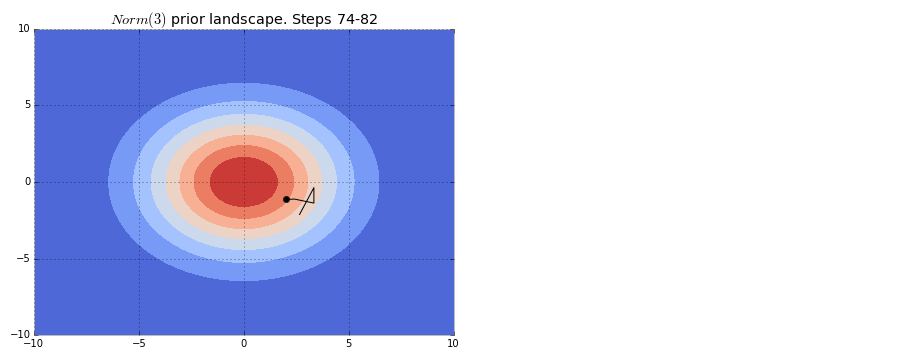
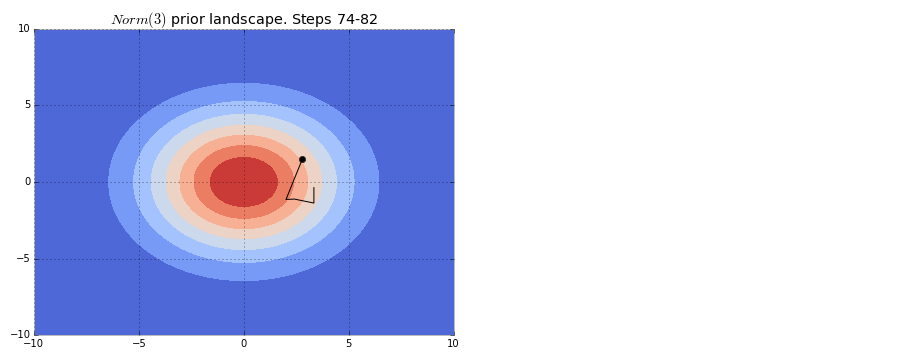
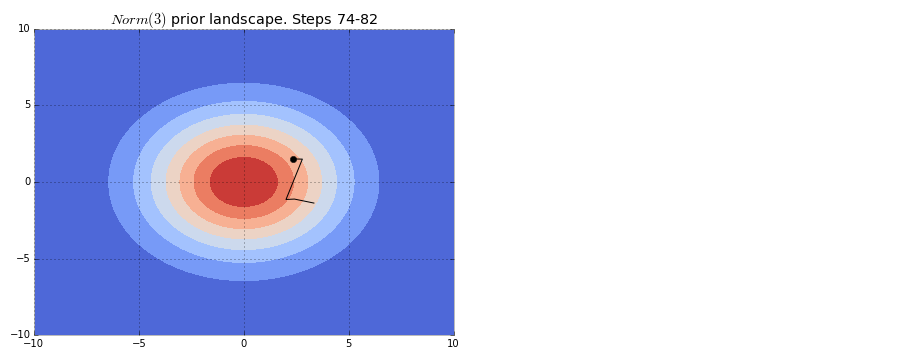
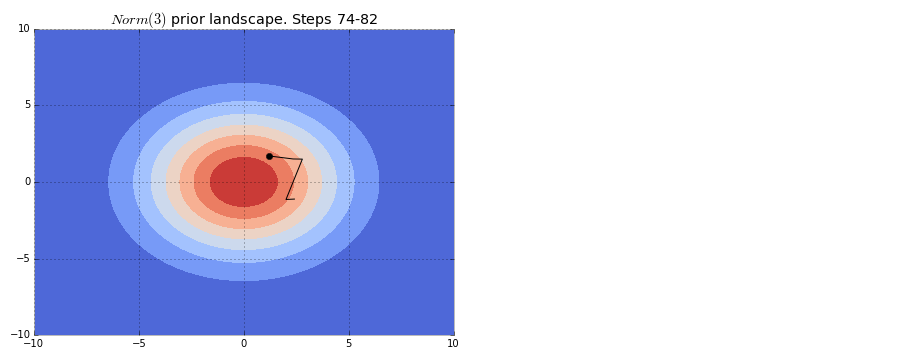
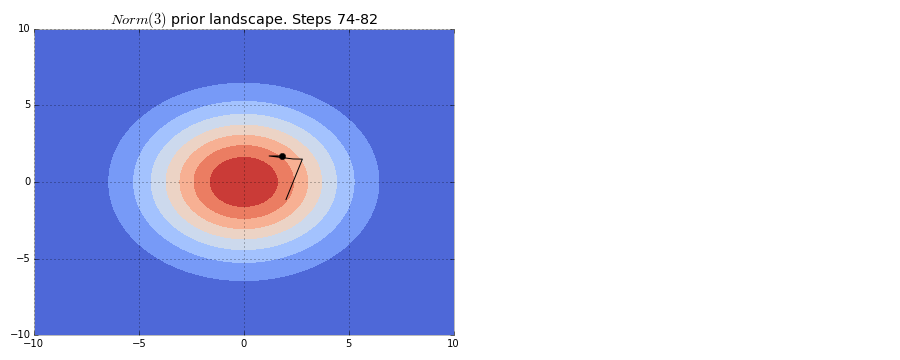
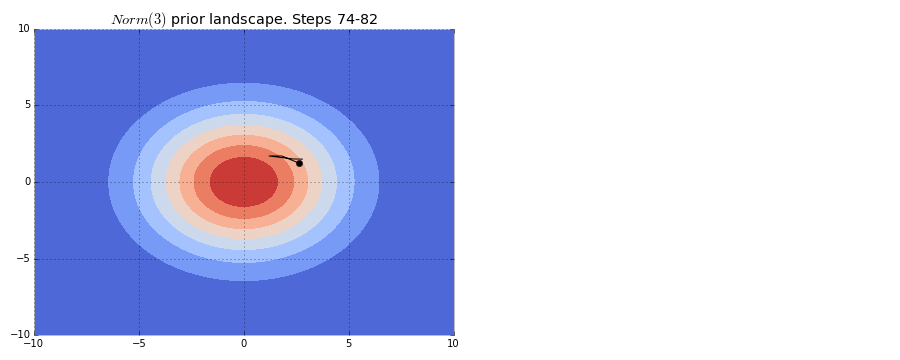
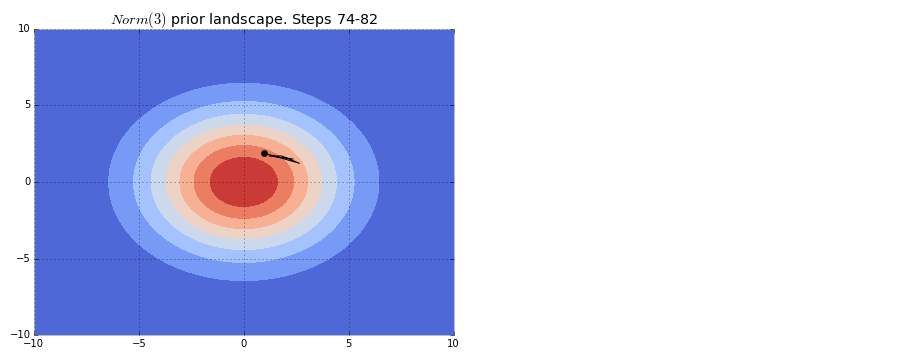
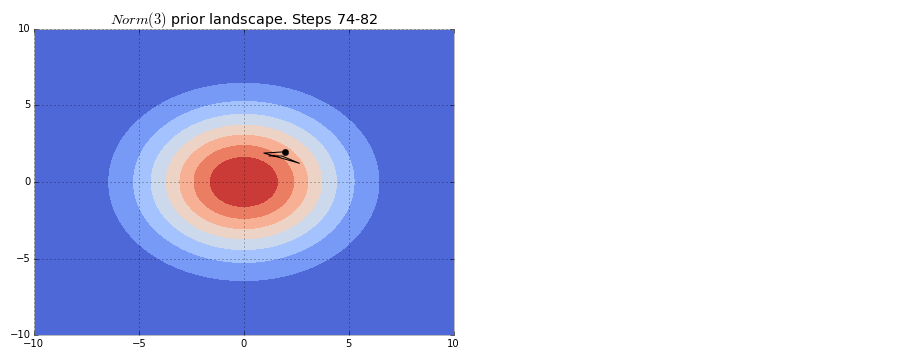
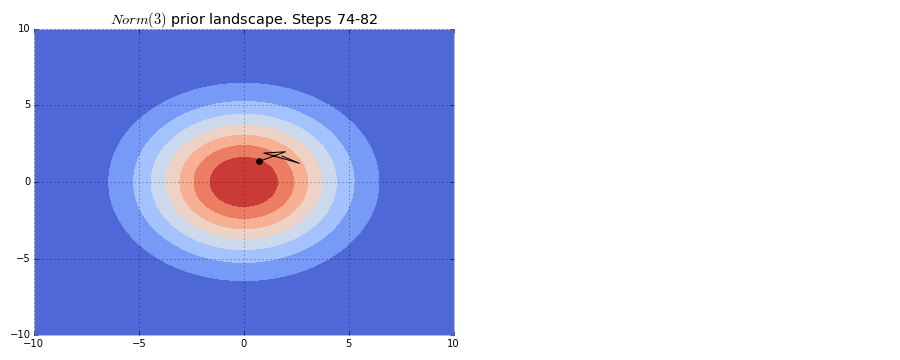
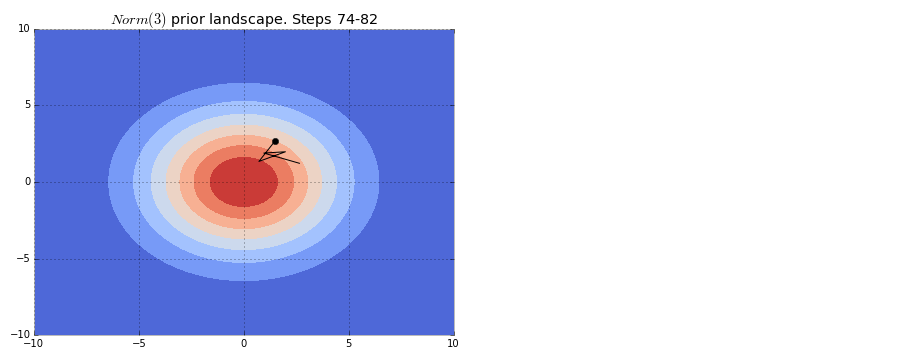
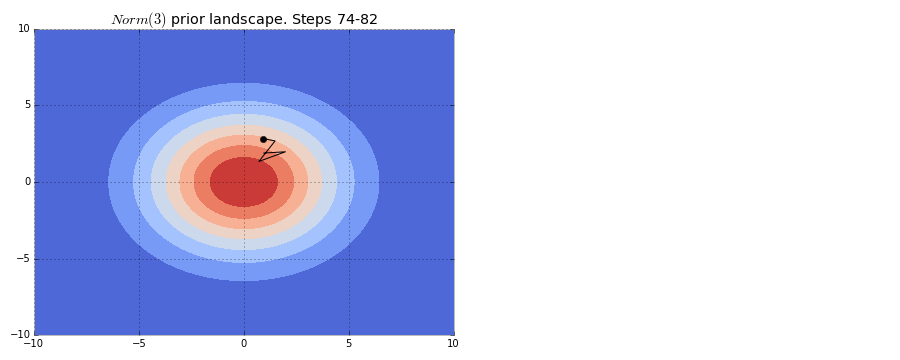
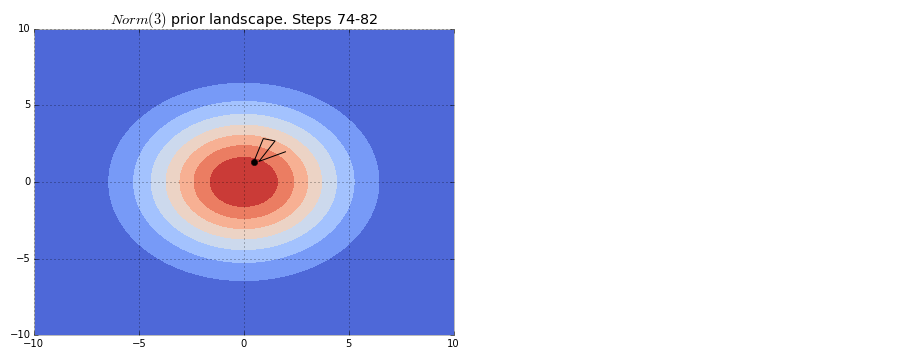
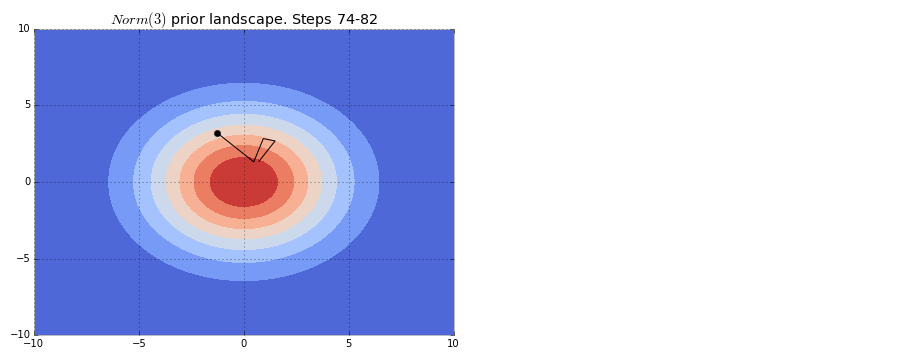
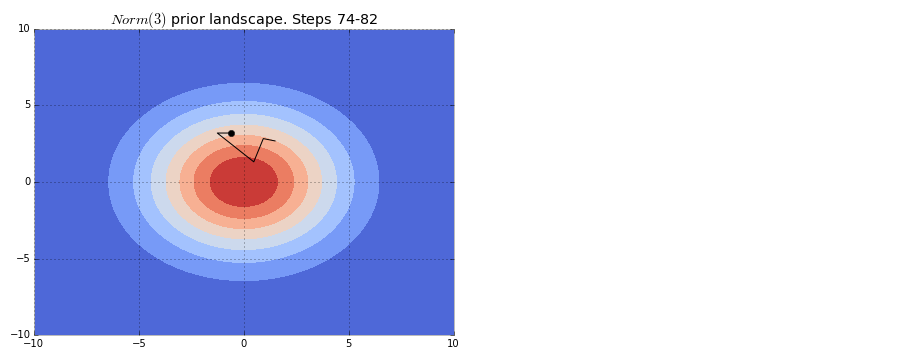
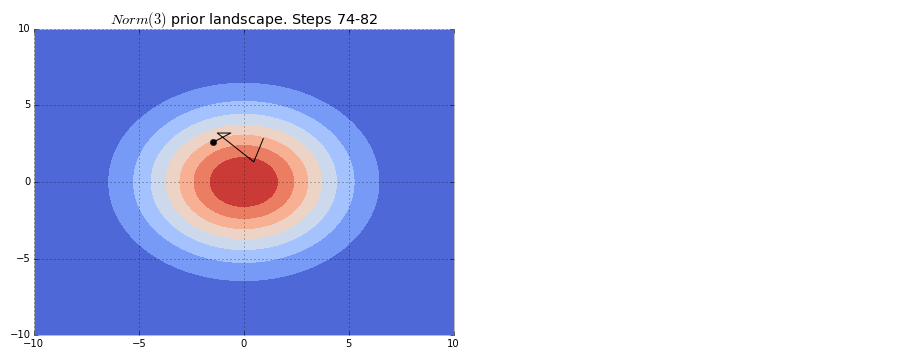
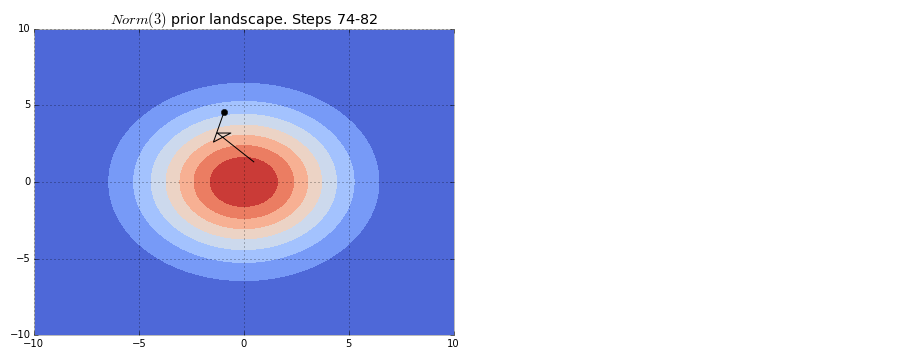
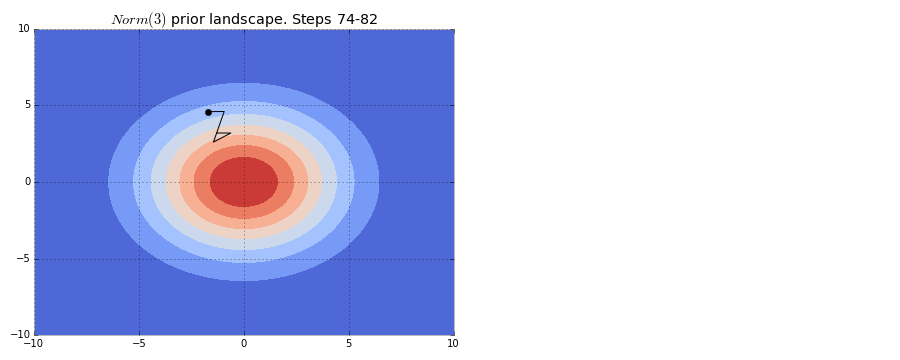
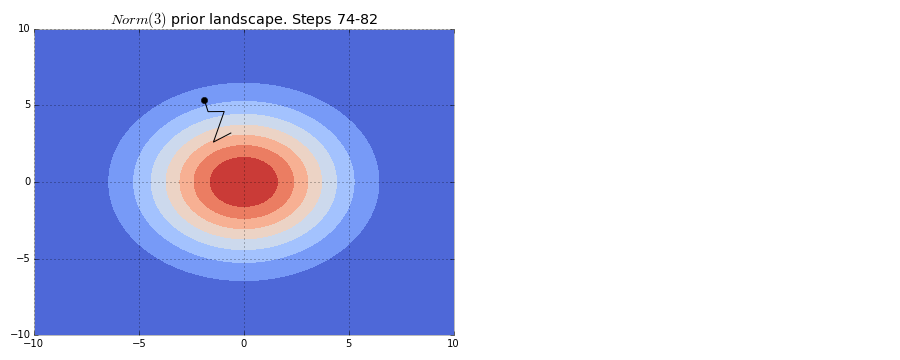
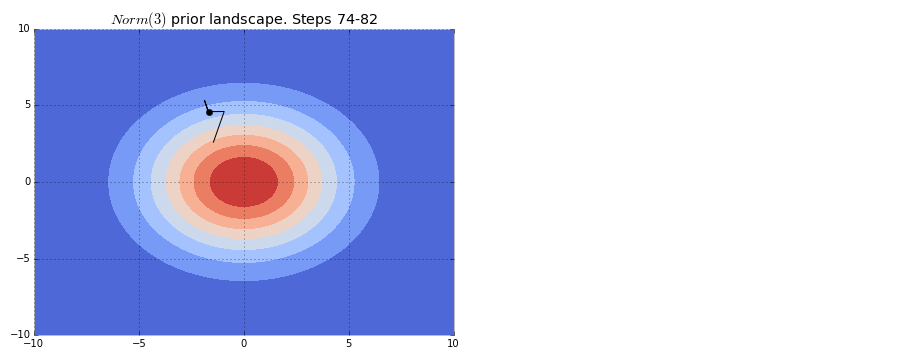
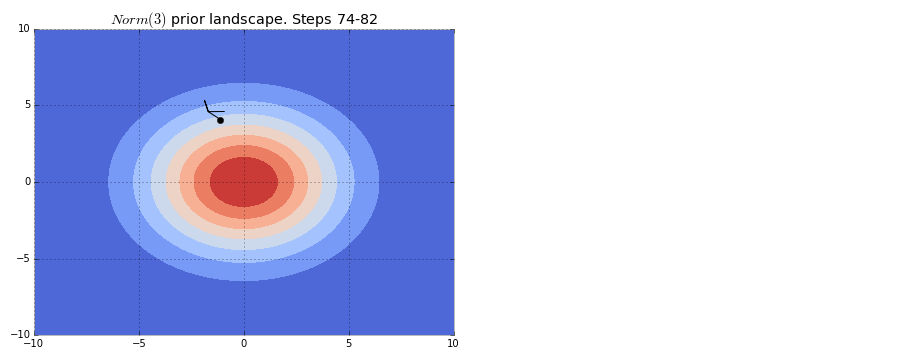
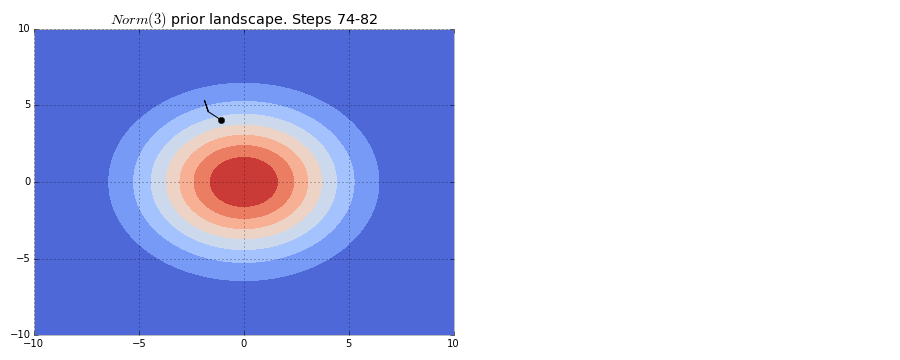
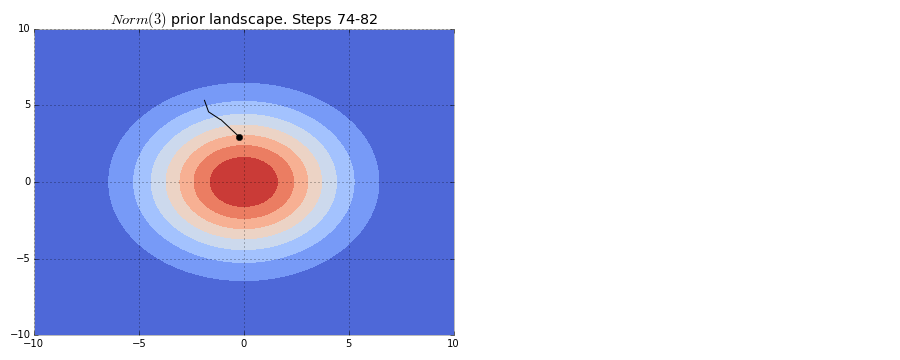
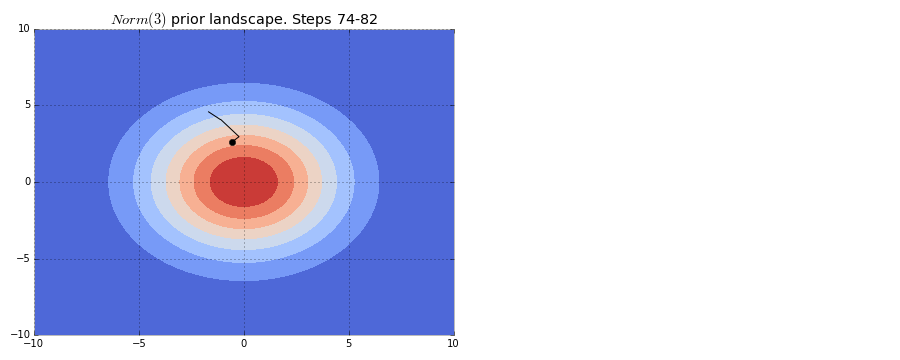
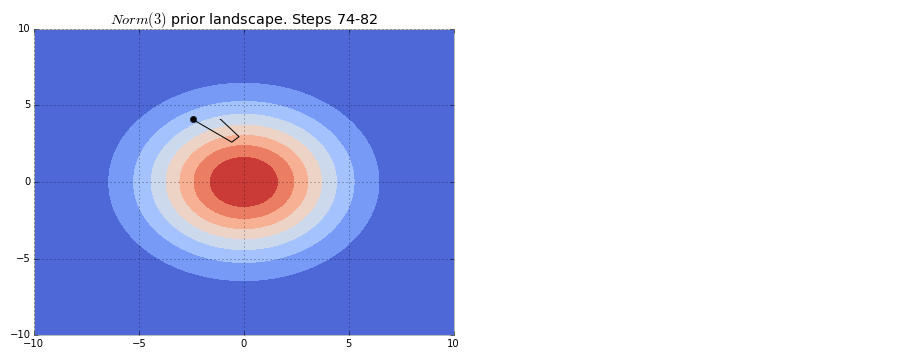
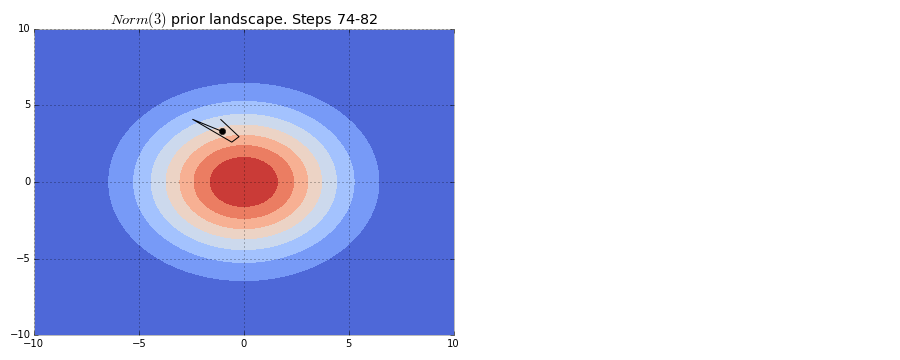
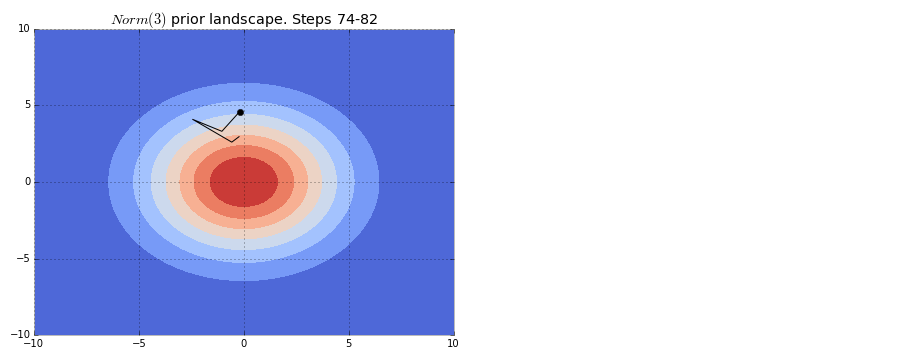
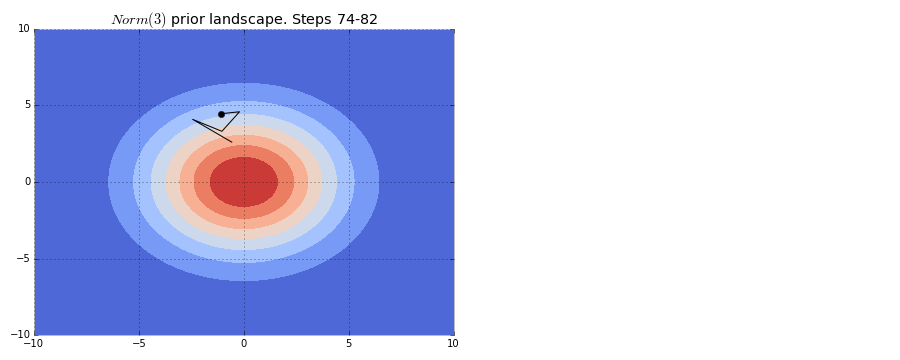
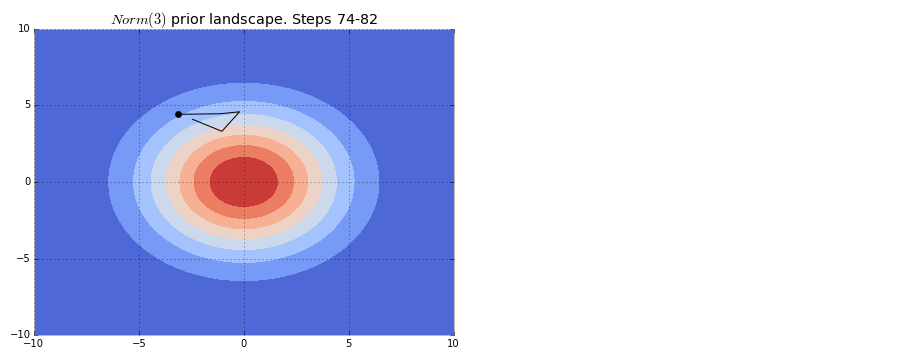
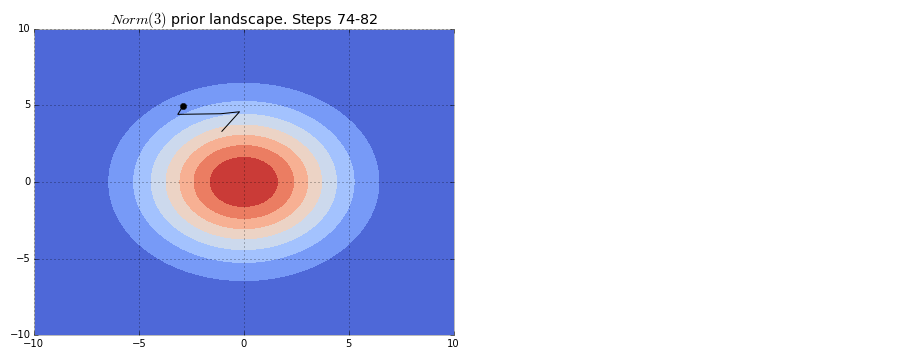
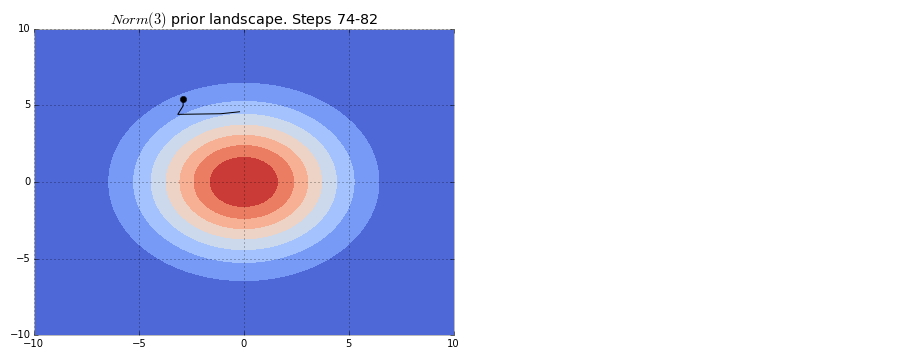
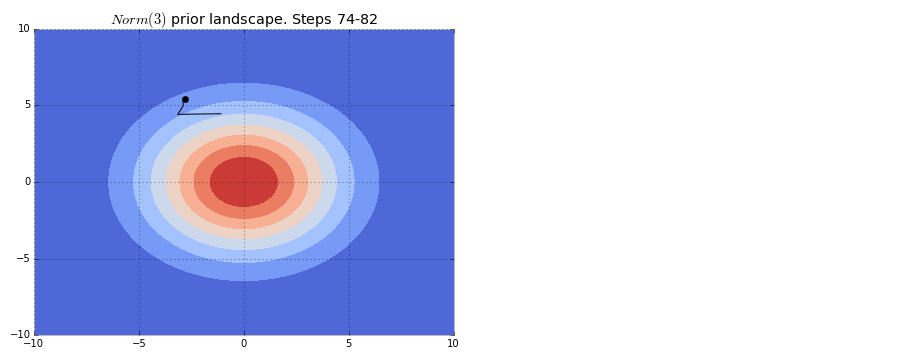
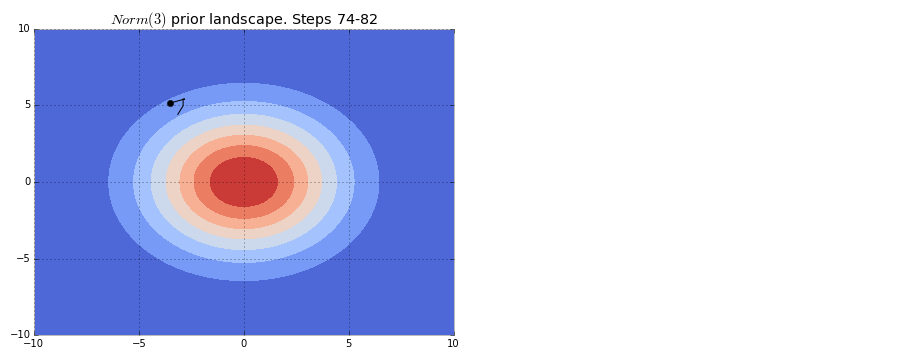
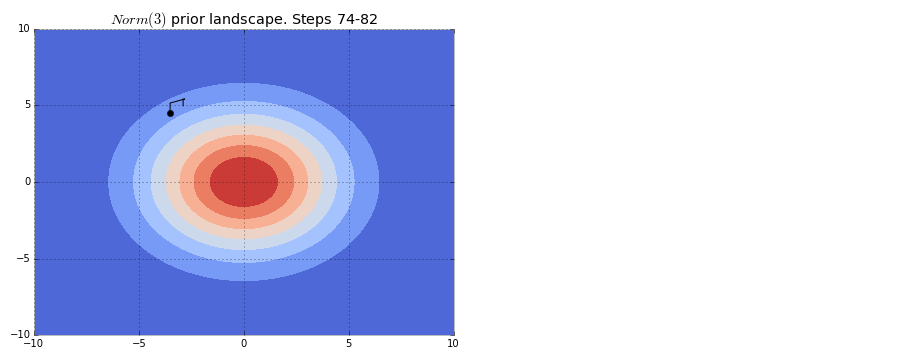
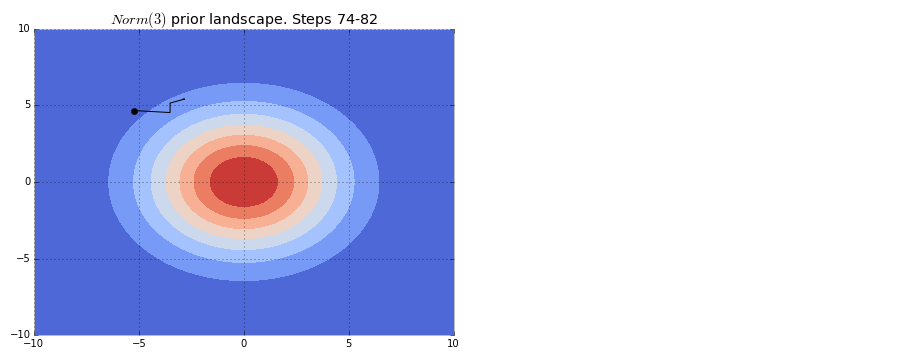
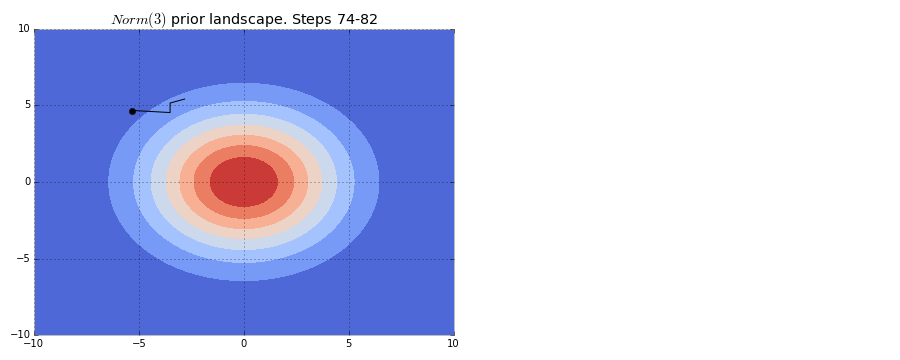
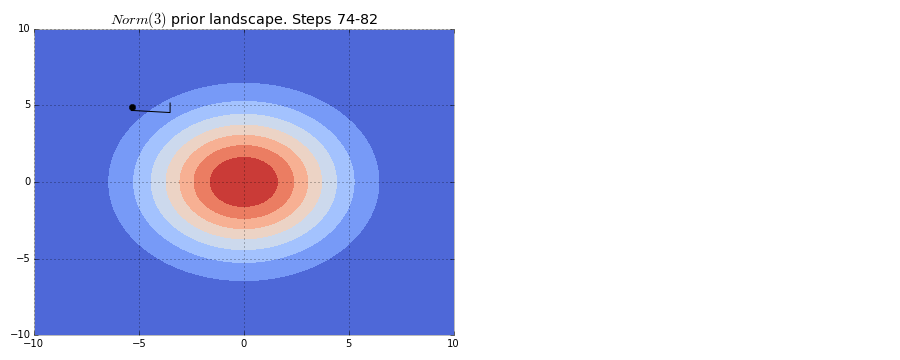
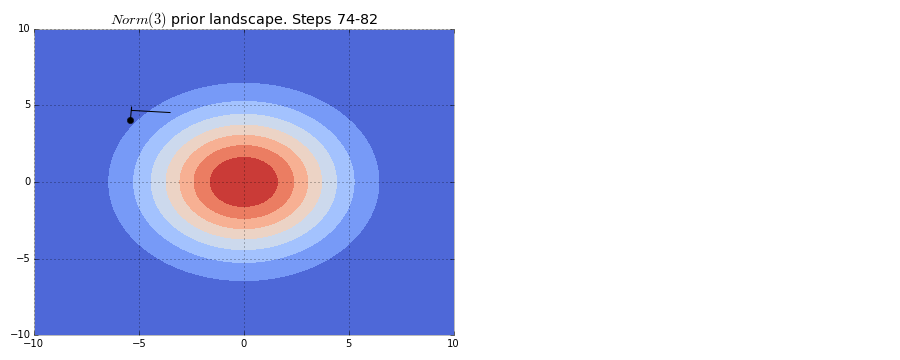
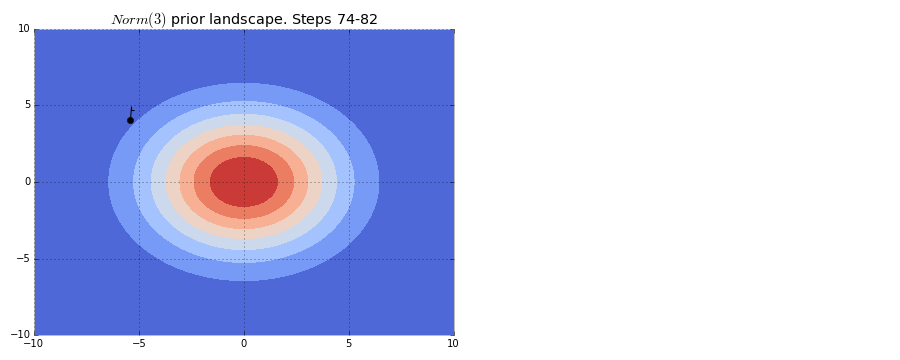
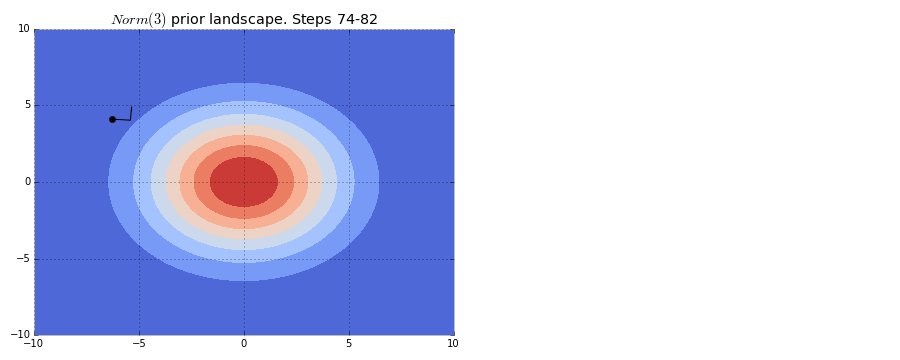
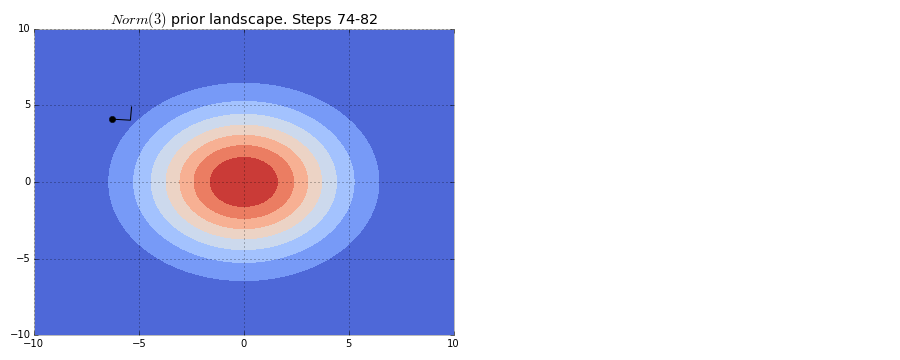
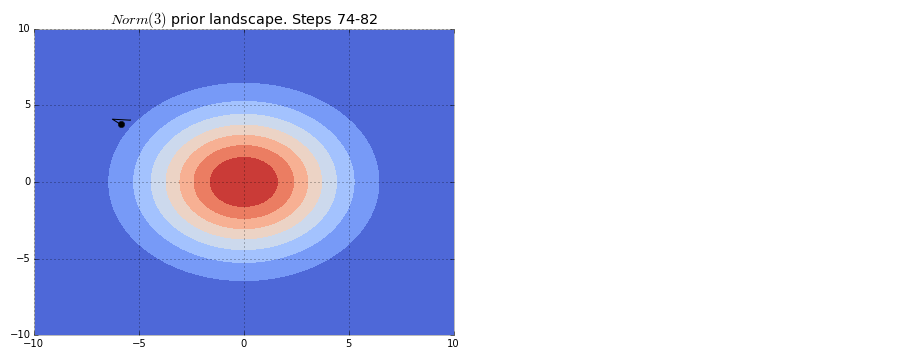
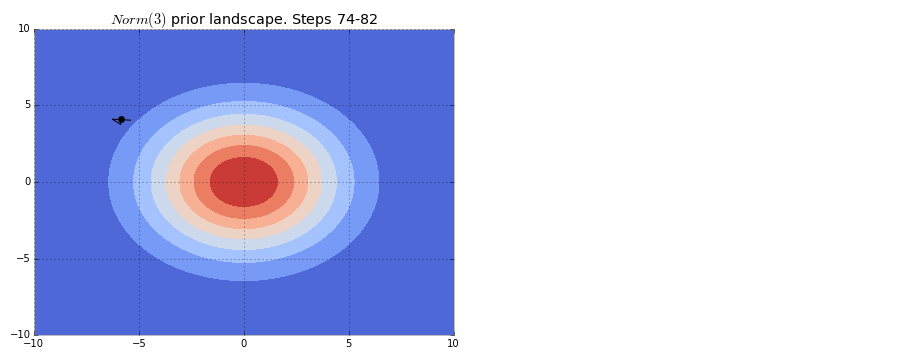
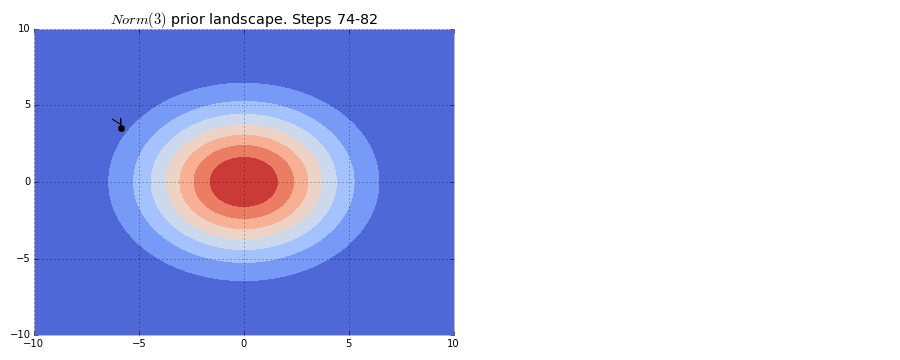
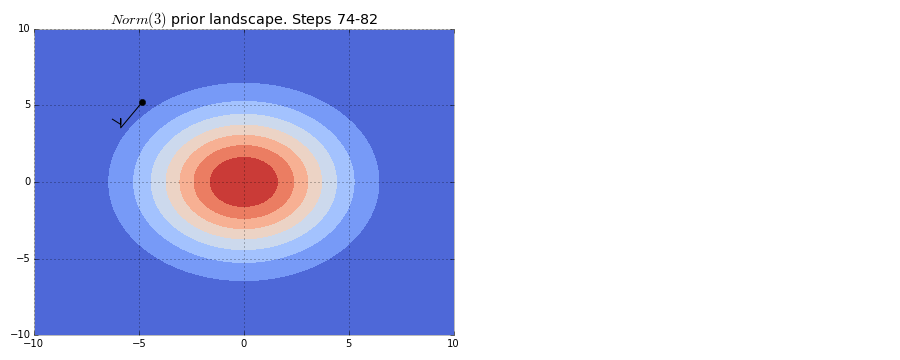

In [19]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from JSAnimation import IPython_display
from matplotlib import animation

figsize(12.5, 5)
fig = plt.figure()
ax = fig.add_subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)
exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])


ax.contourf(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
   

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("$Norm(3)$ prior landscape. Steps 74-82")


plt.tight_layout()



points, = ax.plot([], [], 'bo', ms=6, color = "k")
line, = ax.plot([], [], lw=1, color = "k")

def init():

    points.set_data([], [])
    line.set_data([], [])

    return points

def animate(i):

    points.set_data(trace["alpha"][i],trace["beta"][i])
    x = np.array([trace["alpha"][i], trace["alpha"][i-1], trace["alpha"][i-2], trace["alpha"][i-3],trace["alpha"][i-4]])
    y = np.array([trace["beta"][i], trace["beta"][i-1],trace["beta"][i-2], trace["beta"][i-3],trace["beta"][i-4]])
    
    line.set_data(x,y)

    return points, line


animation.FuncAnimation(fig, animate, init_func=init,
                        frames=100, interval=180, blit=True)
